# Treasure Hunt Game Notebook

## Read and Review Your Starter Code
The theme of this project is a popular treasure hunt game in which the player needs to find the treasure before the pirate does. While you will not be developing the entire game, you will write the part of the game that represents the intelligent agent, which is a pirate in this case. The pirate will try to find the optimal path to the treasure using deep Q-learning. 

You have been provided with two Python classes and this notebook to help you with this assignment. The first class, TreasureMaze.py, represents the environment, which includes a maze object defined as a matrix. The second class, GameExperience.py, stores the episodes – that is, all the states that come in between the initial state and the terminal state. This is later used by the agent for learning by experience, called "exploration". This notebook shows how to play a game. Your task is to complete the deep Q-learning implementation for which a skeleton implementation has been provided. The code blocs you will need to complete has #TODO as a header.

First, read and review the next few code and instruction blocks to understand the code that you have been given.

In [61]:
from __future__ import print_function
import os, sys, time, datetime, json, random
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD , Adam, RMSprop
from keras.layers.advanced_activations import PReLU
import matplotlib.pyplot as plt
from TreasureMaze import TreasureMaze
from GameExperience import GameExperience
%matplotlib inline

The following code block contains an 8x8 matrix that will be used as a maze object:

In [62]:
maze = np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.]
])

This helper function allows a visual representation of the maze object:

In [63]:
def show(qmaze):
    plt.grid('on')
    nrows, ncols = qmaze.maze.shape
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(qmaze.maze)
    for row,col in qmaze.visited:
        canvas[row,col] = 0.6
    pirate_row, pirate_col, _ = qmaze.state
    canvas[pirate_row, pirate_col] = 0.3   # pirate cell
    canvas[nrows-1, ncols-1] = 0.9 # treasure cell
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img

The pirate agent can move in four directions: left, right, up, and down. 

While the agent primarily learns by experience through exploitation, often, the agent can choose to explore the environment to find previously undiscovered paths. This is called "exploration" and is defined by epsilon. This value is typically a lower value such as 0.1, which means for every ten attempts, the agent will attempt to learn by experience nine times and will randomly explore a new path one time. You are encouraged to try various values for the exploration factor and see how the algorithm performs.

In [64]:
LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3


# Exploration factor
epsilon = 0.1

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = len(actions_dict)


The sample code block and output below show creating a maze object and performing one action (DOWN), which returns the reward. The resulting updated environment is visualized.

reward= -0.04


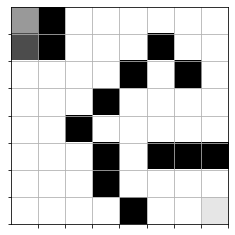

In [65]:
qmaze = TreasureMaze(maze)
canvas, reward, game_over = qmaze.act(DOWN)
print("reward=", reward)
show(qmaze)

This function simulates a full game based on the provided trained model. The other parameters include the TreasureMaze object and the starting position of the pirate.

In [66]:
def play_game(model, qmaze, pirate_cell):
    qmaze.reset(pirate_cell)
    envstate = qmaze.observe()
    while True:
        prev_envstate = envstate
        # get next action
        q = model.predict(prev_envstate)
        action = np.argmax(q[0])

        # apply action, get rewards and new state
        envstate, reward, game_status = qmaze.act(action)
        if game_status == 'win':
            return True
        elif game_status == 'lose':
            return False

This function helps you to determine whether the pirate can win any game at all. If your maze is not well designed, the pirate may not win any game at all. In this case, your training would not yield any result. The provided maze in this notebook ensures that there is a path to win and you can run this method to check.

In [67]:
def completion_check(model, qmaze):
    for cell in qmaze.free_cells:
        if not qmaze.valid_actions(cell):
            return False
        if not play_game(model, qmaze, cell):
            return False
    return True

The code you have been given in this block will build the neural network model. Review the code and note the number of layers, as well as the activation, optimizer, and loss functions that are used to train the model.

In [68]:
def build_model(maze):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(PReLU())
    model.add(Dense(maze.size))
    model.add(PReLU())
    model.add(Dense(num_actions))
    model.compile(optimizer='adam', loss='mse')
    return model

# #TODO: Complete the Q-Training Algorithm Code Block

This is your deep Q-learning implementation. The goal of your deep Q-learning implementation is to find the best possible navigation sequence that results in reaching the treasure cell while maximizing the reward. In your implementation, you need to determine the optimal number of epochs to achieve a 100% win rate.

You will need to complete the section starting with #pseudocode. The pseudocode has been included for you.

In [69]:
def qtrain(model, maze, **opt):

    # exploration factor
    global epsilon 

    # number of epochs
    n_epoch = opt.get('n_epoch', 15000)

    # maximum memory to store episodes
    max_memory = opt.get('max_memory', 1000)

    # maximum data size for training
    data_size = opt.get('data_size', 50)

    # start time
    start_time = datetime.datetime.now()

    # Construct environment/game from numpy array: maze (see above)
    qmaze = TreasureMaze(maze)

    # Initialize experience replay object
    experience = GameExperience(model, max_memory=max_memory)
    
    win_history = []   # history of win/lose game
    hsize = qmaze.maze.size//2   # history window size
    win_rate = 0.0
    
    
    # pseudocode:
    

    
    # For each epoch:
    for epoch in range(n_epoch):
        
        #Initialize values
        n_episodes = 0
        loss = 0      
        
        #Agent_cell = randomly select a free cell
        agent_cell = random.choice(qmaze.free_cells)
    
        #Reset the maze with agent set to above position  
        #Hint: Review the reset method in the TreasureMaze.py class.
        qmaze.reset(agent_cell)
        
        #envstate = Environment.current_state
        #Hint: Review the observe method in the TreasureMaze.py class.
        envstate = qmaze.observe()
        
        #While state is not game over:
        while qmaze.game_status() == 'not_over':
            n_episodes += 1
            
            #previous_envstate = envstate
            previous_envstate = envstate
        
            #Action = randomly choose action (left, right, up, down) either by exploration or by exploitation
            valid_actions = qmaze.valid_actions()
            if np.random.rand() < epsilon:            
                action = random.choice(valid_actions)
            else:
                action = np.argmax(experience.predict(envstate))
            
            #envstate, reward, game_status = qmaze.act(action)
            #Hint: Review the act method in the TreasureMaze.py class.
            envstate, reward, game_status = qmaze.act(action)
        
            #episode = [previous_envstate, action, reward, envstate, game_status]
            episode = [previous_envstate, action, reward, envstate, game_status]
        
            #Store episode in Experience replay object
            #Hint: Review the remember method in the GameExperience.py class.
            experience.remember(episode)
        
            #Train neural network model and evaluate loss
            #Hint: Call GameExperience.get_data to retrieve training data (input and target) and pass to model.fit method
            #to train the model. You can call model.evaluate to determine loss.
            inputs,targets = experience.get_data(data_size=data_size) 
            model.fit(inputs, targets, epochs=8, batch_size=24)
            loss = model.evaluate(inputs, targets)
    
        #If the win rate is above the threshold and your model passes the completion check, that would be your epoch.
        #If AI wins, appends 1 to history. Add 0 if lost.
        if episode [4] == 'win':
            win_history.append(1)
        elif episode [4] == 'lose':
            win_history.append(0)
            
        if len(win_history) > hsize:
            win_rate = float(sum(win_history[-hsize:])) / len(win_history[-hsize:])                   


    #Print the epoch, loss, episodes, win count, and win rate for each epoch
        dt = datetime.datetime.now() - start_time
        t = format_time(dt.total_seconds())
        template = "Epoch: {:03d}/{:d} | Loss: {:.4f} | Episodes: {:d} | Win count: {:d} | Win rate: {:.3f} | time: {}"
        print(template.format(epoch, n_epoch-1, loss, n_episodes, sum(win_history), win_rate, t))
        # We simply check if training has exhausted all free cells and if in all
        # cases the agent won.
        if win_rate > 0.9 : epsilon = 0.05
        if sum(win_history[-hsize:]) == hsize and completion_check(model, qmaze):
            print("Reached 100%% win rate at epoch: %d" % (epoch,))
            break
    
    
    # Determine the total time for training
    dt = datetime.datetime.now() - start_time
    seconds = dt.total_seconds()
    t = format_time(seconds)

    print("n_epoch: %d, max_mem: %d, data: %d, time: %s" % (epoch, max_memory, data_size, t))
    return seconds

# This is a small utility for printing readable time strings:
def format_time(seconds):
    if seconds < 400:
        s = float(seconds)
        return "%.1f seconds" % (s,)
    elif seconds < 4000:
        m = seconds / 60.0
        return "%.2f minutes" % (m,)
    else:
        h = seconds / 3600.0
        return "%.2f hours" % (h,)

## Test Your Model

Now we will start testing the deep Q-learning implementation. To begin, select **Cell**, then **Run All** from the menu bar. This will run your notebook. As it runs, you should see output begin to appear beneath the next few cells. The code below creates an instance of TreasureMaze.

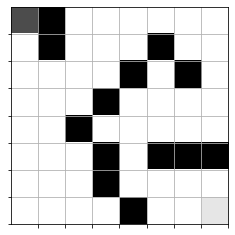

In [70]:
qmaze = TreasureMaze(maze)
show(qmaze)

In the next code block, you will build your model and train it using deep Q-learning. Note: This step takes several minutes to fully run.

In [71]:
model = build_model(maze)
qtrain(model, maze, epochs=1000, max_memory=8*maze.size, data_size=32)

Epoch 1/8
1/1 [==============================] - 1s 503ms/step - loss: 0.1483
Epoch 2/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 3/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 4/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 5/8
1/1 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 6/8
1/1 [==============================] - 0s 1ms/step - loss: 0.0374
Epoch 7/8
1/1 [==============================] - 0s 1ms/step - loss: 0.0433
Epoch 8/8
1/1 [==============================] - 0s 62ms/step
Epoch 1/8
2/2 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 2/8
2/2 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 3/8
2/2 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 4/8
2/2 [==============================] - 0s 792us/step - loss: 0.0212
Epoch 5/8
2/2 [==============================] - 0s 811us/step - loss: 0.0226
Epoch 6/8
2/2 [=====

12/12 [==============================] - 0s 88us/step
Epoch 1/8
13/13 [==============================] - 0s 205us/step - loss: 0.0023
Epoch 2/8
13/13 [==============================] - 0s 164us/step - loss: 0.0020
Epoch 3/8
13/13 [==============================] - 0s 121us/step - loss: 0.0020
Epoch 4/8
13/13 [==============================] - 0s 161us/step - loss: 0.0021
Epoch 5/8
13/13 [==============================] - 0s 121us/step - loss: 0.0021
Epoch 6/8
13/13 [==============================] - 0s 128us/step - loss: 0.0019
Epoch 7/8
13/13 [==============================] - 0s 127us/step - loss: 0.0019
Epoch 8/8
13/13 [==============================] - 0s 42us/step
Epoch 1/8
14/14 [==============================] - 0s 113us/step - loss: 0.0022
Epoch 2/8
14/14 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 3/8
14/14 [==============================] - 0s 115us/step - loss: 0.0020
Epoch 4/8
14/14 [==============================] - 0s 116us/step - loss: 0.0021
Ep

Epoch 7/8
24/24 [==============================] - 0s 66us/step - loss: 6.8153e-04
Epoch 8/8
24/24 [==============================] - 0s 46us/step
Epoch 1/8
25/25 [==============================] - 0s 169us/step - loss: 6.4895e-04
Epoch 2/8
25/25 [==============================] - 0s 193us/step - loss: 9.7702e-04
Epoch 3/8
25/25 [==============================] - 0s 172us/step - loss: 0.0053
Epoch 4/8
25/25 [==============================] - 0s 169us/step - loss: 0.0039
Epoch 5/8
25/25 [==============================] - 0s 148us/step - loss: 0.0021
Epoch 6/8
25/25 [==============================] - 0s 174us/step - loss: 0.0023
Epoch 7/8
25/25 [==============================] - 0s 148us/step - loss: 0.0036
Epoch 8/8
25/25 [==============================] - 0s 21us/step
Epoch 1/8
26/26 [==============================] - 0s 184us/step - loss: 0.0011
Epoch 2/8
26/26 [==============================] - 0s 186us/step - loss: 0.0016
Epoch 3/8
26/26 [==============================] - 0s 145us/s

32/32 [==============================] - 0s 166us/step - loss: 1.4449e-04
Epoch 2/8
32/32 [==============================] - 0s 190us/step - loss: 1.3637e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 1.5621e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 1.4669e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 1.3676e-04
Epoch 6/8
32/32 [==============================] - 0s 239us/step - loss: 1.3498e-04
Epoch 7/8
32/32 [==============================] - 0s 235us/step - loss: 1.3375e-04
Epoch 8/8
32/32 [==============================] - 0s 189us/step
Epoch 1/8
32/32 [==============================] - 0s 292us/step - loss: 2.2653e-04
Epoch 2/8
32/32 [==============================] - 0s 571us/step - loss: 2.1991e-04
Epoch 3/8
32/32 [==============================] - 0s 519us/step - loss: 2.2786e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 2.1469e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 548us/step - loss: 1.8382e-04
Epoch 4/8
32/32 [==============================] - 0s 255us/step - loss: 2.0300e-04
Epoch 5/8
32/32 [==============================] - 0s 271us/step - loss: 2.5548e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 2.3386e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 2.4680e-04
Epoch 8/8
32/32 [==============================] - 0s 78us/step
Epoch 1/8
32/32 [==============================] - 0s 443us/step - loss: 2.5660e-04
Epoch 2/8
32/32 [==============================] - 0s 668us/step - loss: 2.9114e-04
Epoch 3/8
32/32 [==============================] - 0s 609us/step - loss: 2.7973e-04
Epoch 4/8
32/32 [==============================] - 0s 720us/step - loss: 2.5630e-04
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 2.5935e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 2.3810e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 153us/step - loss: 8.2711e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 5.8570e-04
Epoch 7/8
32/32 [==============================] - 0s 237us/step - loss: 5.3421e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 5.7829e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 5.9389e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 5.9598e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 7.3934e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 6.5747e-04
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 8.3339e-04
Epoch 7/8
32/32 [==============================] - 0s 191us/step - loss: 7.9297e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [=========================

Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 0.0019
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 0.0018
Epoch 3/8
32/32 [==============================] - 0s 136us/step - loss: 0.0018
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0018
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 0.0018
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0019
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 257us/step - loss: 6.7159e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 6.7402e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 5.9778e-04
Epoch 4/8
32/32 [==============================] - 0s 258us/step - loss: 6.9854e-04
Epoch 5/8
32/32 [=======================

Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 6.7141e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 7.4490e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 7.1726e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 5.9444e-04
Epoch 2/8
32/32 [==============================] - 0s 253us/step - loss: 6.6206e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 5.7904e-04
Epoch 4/8
32/32 [==============================] - 0s 217us/step - loss: 5.4667e-04
Epoch 5/8
32/32 [==============================] - 0s 252us/step - loss: 8.0809e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 7.8413e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 7.5197e-04
Epoch 8/8
32/32 [==============================] - 0s 152us/step
Epoch 1/8
32/32 [==============

32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 427us/step - loss: 5.7153e-04
Epoch 2/8
32/32 [==============================] - 0s 464us/step - loss: 5.6218e-04
Epoch 3/8
32/32 [==============================] - 0s 518us/step - loss: 5.1597e-04
Epoch 4/8
32/32 [==============================] - 0s 447us/step - loss: 5.4693e-04
Epoch 5/8
32/32 [==============================] - 0s 445us/step - loss: 5.8170e-04
Epoch 6/8
32/32 [==============================] - 0s 291us/step - loss: 5.1333e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 5.9126e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 7.7085e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 7.8139e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 0.0010
Epoch 4/8
32/32 [=============================

32/32 [==============================] - 0s 207us/step - loss: 9.1215e-04
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 7.0766e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 7.9728e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 8.0992e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 8.8057e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 7.9733e-04
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 343us/step - loss: 5.0233e-04
Epoch 2/8
32/32 [==============================] - 0s 429us/step - loss: 5.5290e-04
Epoch 3/8
32/32 [==============================] - 0s 428us/step - loss: 6.0447e-04
Epoch 4/8
32/32 [==============================] - 0s 653us/step - loss: 5.6759e-04
Epoch 5/8
32/32 [==============================] - 0s 586us/step - loss: 6.2643e-04
Epoch 6/8
32/32 [====

Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 7.5504e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 8.9835e-04
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 8.2690e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 9.2321e-04
Epoch 2/8
32/32 [==============================] - 0s 202us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 9.7127e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 156us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 6.0277e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 7.0817e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 6.3354e-04
Epoch 4/8
32/32 [==============================] - 0s 219us/step - loss: 6.4565e-04
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 6.1359e-04
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 5.9622e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 7.4521e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 4.2520e-04
Epoch 2/8
32/32 [==============================] - 0s 202us/step - loss: 4.8399e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 4.5294e-04
Epoch 4/8
32/32 [=========================

Epoch 1/8
32/32 [==============================] - 0s 493us/step - loss: 6.4358e-04
Epoch 2/8
32/32 [==============================] - 0s 637us/step - loss: 8.1233e-04
Epoch 3/8
32/32 [==============================] - 0s 516us/step - loss: 8.3476e-04
Epoch 4/8
32/32 [==============================] - 0s 149us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 8.5018e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 6.9946e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 8.6303e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 568us/step - loss: 5.9206e-04
Epoch 2/8
32/32 [==============================] - 0s 288us/step - loss: 5.5099e-04
Epoch 3/8
32/32 [==============================] - 0s 735us/step - loss: 6.3462e-04
Epoch 4/8
32/32 [==============================] - 0s 872us/step - loss: 4.7983e-04
Epoch 5/8
32/32 

32/32 [==============================] - 0s 239us/step - loss: 7.6834e-04
Epoch 5/8
32/32 [==============================] - 0s 254us/step - loss: 7.4444e-04
Epoch 6/8
32/32 [==============================] - 0s 200us/step - loss: 7.0231e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 8.3022e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 7.2906e-04
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 7.3228e-04
Epoch 3/8
32/32 [==============================] - 0s 198us/step - loss: 7.6221e-04
Epoch 4/8
32/32 [==============================] - 0s 256us/step - loss: 7.1443e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 7.4924e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 7.7328e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 7.5388e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 286us/step - loss: 2.2538e-04
Epoch 7/8
32/32 [==============================] - 0s 320us/step - loss: 3.2664e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 4.0449e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 4.1981e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 3.8512e-04
Epoch 4/8
32/32 [==============================] - 0s 270us/step - loss: 3.9700e-04
Epoch 5/8
32/32 [==============================] - 0s 224us/step - loss: 4.3391e-04
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 4.1089e-04
Epoch 7/8
32/32 [==============================] - 0s 291us/step - loss: 3.9988e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 360us/step - loss: 0.0011
Epoch 2/8
32/32 [=============================

Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 5.0793e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 4.8732e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 7.1719e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 6.0876e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 6.3161e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 4.2539e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 4.5853e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 8.5176e-04
Epoch 2/8
32/32 [==============================] - 0s 583us/step - loss: 8.6057e-04
Epoch 3/8
32/32 [==============================] - 0s 549us/step - loss: 8.8755e-04
Epoch 4/8
32/32 [==============================] - 0s 904us/step - loss: 9.3267e-04
Epoch 5/8
3

32/32 [==============================] - 0s 187us/step - loss: 6.2105e-04
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 5.6952e-04
Epoch 6/8
32/32 [==============================] - 0s 219us/step - loss: 5.4146e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 5.8543e-04
Epoch 8/8
32/32 [==============================] - 0s 84us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 7.5811e-04
Epoch 2/8
32/32 [==============================] - 0s 135us/step - loss: 7.8185e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 9.1935e-04
Epoch 4/8
32/32 [==============================] - 0s 172us/step - loss: 9.7957e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 7.7154e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 9.3387e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 8/8
32/32 [=========

32/32 [==============================] - 0s 188us/step - loss: 9.5644e-04
Epoch 8/8
32/32 [==============================] - 0s 577us/step
Epoch 1/8
32/32 [==============================] - 0s 532us/step - loss: 9.7623e-04
Epoch 2/8
32/32 [==============================] - 0s 397us/step - loss: 9.5052e-04
Epoch 3/8
32/32 [==============================] - 0s 768us/step - loss: 9.9754e-04
Epoch 4/8
32/32 [==============================] - 0s 274us/step - loss: 9.3045e-04
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 9.0139e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 8.2399e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 9.1855e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 359us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 686us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] 

32/32 [==============================] - 0s 413us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 458us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 530us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 772us/step - loss: 0.0018
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 0.0018
Epoch 7/8
32/32 [==============================] - 0s 100us/step - loss: 0.0019
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 578us/step - loss: 7.3097e-04
Epoch 2/8
32/32 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 327us/step - loss: 9.7704e-04
Epoch 4/8
32/32 [==============================] - 0s 854us/step - loss: 8.5274e-04
Epoch 5/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 155us/step - loss: 9.5085e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 8.3470e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 8.7133e-04
Epoch 7/8
32/32 [==============================] - 0s 252us/step - loss: 8.2861e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 149us/step - loss: 9.8172e-04
Epoch 2/8
32/32 [==============================] - 0s 191us/step - loss: 9.0654e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 173us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 9.5040e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 9.5568e-04
Epoch 8/8
32/32 [=================

Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 323us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 4.6274e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 4.4552e-04
Epoch 3/8
32/32 [==============================] - 0s 156us/step - loss: 4.2249e-04
Epoch 4/8
32/32 [==============================] - 0s 155us

32/32 [==============================] - 0s 169us/step - loss: 7.8010e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 6.9342e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 7.9151e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 6.7181e-04
Epoch 7/8
32/32 [==============================] - 0s 256us/step - loss: 6.4808e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 604us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 480us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 256us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 215us/step - loss: 0.0013
Epoch 7/8
32/32 [=============================

32/32 [==============================] - 0s 203us/step - loss: 4.6957e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 150us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 223us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 799us/step - loss: 7.5352e-04
Epoch 2/8
32/32 [==============================] - 0s 304us/step - loss: 7.8917e-04
Epoch 3/8
32/32 [==============================] - 0s 291us/step - los

Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 9.3695e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 9.3953e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 9.6047e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 5.5742e-04
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 5.5489e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 5.4578e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 5.5630e-04
Epoch 5/8
32/32 [==============================] - 0s 165us/step - loss: 5.2499e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 5.2412e-04
Epoch 7/8
32/32 [===

32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 9.6603e-04
Epoch 2/8
32/32 [==============================] - 0s 255us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 255us/step - loss: 9.0939e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 9.8617e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 8.3492e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 8.1271e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 8.1823e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 4.9605e-04
Epoch 2/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 445us/step - loss: 4.6764e-04
Epoch 2/8
32/32 [==============================] - 0s 587us/step - loss: 4.6684e-04
Epoch 3/8
32/32 [==============================] - 0s 531us/step - loss: 4.8275e-04
Epoch 4/8
32/32 [==============================] - 0s 481us/step - loss: 4.4497e-04
Epoch 5/8
32/32 [==============================] - 0s 372us/step - loss: 4.5030e-04
Epoch 6/8
32/32 [==============================] - 0s 575us/step - loss: 4.5462e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.2979e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 290us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 787us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 750us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 240us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 237us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Ep

32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 6.6619e-04
Epoch 2/8
32/32 [==============================] - 0s 256us/step - loss: 6.6955e-04
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 6.5171e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 6.6182e-04
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 6.2304e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 6.2766e-04
Epoch 7/8
32/32 [==============================] - 0s 237us/step - loss: 6.0446e-04
Epoch 8/8
32/32 [==============================] - 0s 171us/step
Epoch 1/8
32/32 [==============================] - 0s 196us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 173us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 191us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s

Epoch 3/8
32/32 [==============================] - 0s 648us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 19us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 6.0709e-04
Epoch 2/8
32/32 [==============================] - 0s 493us/step - loss: 6.4973e-04
Epoch 3/8
32/32 [==============================] - 0s 272us/step - loss: 6.2737e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 6.0322e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 6.3168e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 6.0226e-04
Epoch 7/8
32/32 [===============

32/32 [==============================] - 0s 187us/step - loss: 8.9123e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 8.8062e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 287us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 549us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 275us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 324us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 576us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 307us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 307us/step - loss: 6.3134e-04
Epoch 2/8
32/32 [==============================] - 0s 497us/step - lo

Epoch 1/8
32/32 [==============================] - 0s 410us/step - loss: 5.9363e-04
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 6.7619e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 6.2933e-04
Epoch 4/8
32/32 [==============================] - 0s 578us/step - loss: 6.2330e-04
Epoch 5/8
32/32 [==============================] - 0s 480us/step - loss: 5.9782e-04
Epoch 6/8
32/32 [==============================] - 0s 631us/step - loss: 6.1667e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 5.7040e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 9.9607e-04
Epoch 2/8
32/32 [==============================] - 0s 681us/step - loss: 9.8621e-04
Epoch 3/8
32/32 [==============================] - 0s 517us/step - loss: 9.9214e-04
Epoch 4/8
32/32 [==============================] - 0s 859us/step - loss: 0.0010
Epoch 5/8
32/32 

32/32 [==============================] - 0s 206us/step - loss: 4.8649e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 4.9186e-04
Epoch 5/8
32/32 [==============================] - 0s 199us/step - loss: 5.0835e-04
Epoch 6/8
32/32 [==============================] - 0s 225us/step - loss: 4.8114e-04
Epoch 7/8
32/32 [==============================] - 0s 183us/step - loss: 5.2489e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 6.1019e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 5.9180e-04
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 6.8006e-04
Epoch 4/8
32/32 [==============================] - 0s 172us/step - loss: 6.4914e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 5.6833e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 5.3941e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 339us/step - loss: 8.0095e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 8.7205e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 207us/step - loss: 0.0016
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 136us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 5.7623e-04
Epoch 2/8
32/32 [==============================] - 0s 172us/step - lo

32/32 [==============================] - 0s 166us/step - loss: 7.2649e-04
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 7.1353e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 7.5321e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 6.8318e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 7.1694e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 6.6436e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 6.8799e-04
Epoch 8/8
32/32 [==============================] - 0s 189us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 7.0003e-04
Epoch 2/8
32/32 [==============================] - 0s 258us/step - loss: 7.4691e-04
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 7.2042e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 6.7511e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 205us/step - loss: 7.9537e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 6.4875e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 8.0750e-04
Epoch 7/8
32/32 [==============================] - 0s 223us/step - loss: 6.9831e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 9.4616e-04
Epoch 2/8
32/32 [==============================] - 0s 182us/step - loss: 9.6659e-04
Epoch 3/8
32/32 [==============================] - 0s 135us/step - loss: 8.9051e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 174us/step - loss: 9.2720e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 9.2157e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 9.1109e-04
Epoch 8/8
32/32 [=========

Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 5.5172e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 6.3579e-04
Epoch 2/8
32/32 [==============================] - 0s 224us/step - loss: 6.4394e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 6.4978e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 5.9840e-04
Epoch 5/8
32/32 [==============================] - 0s 222us/step - loss: 6.9872e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 6.4808e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 6.8389e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 183us/step - loss: 9.4983e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 9.6545e-04
Epoch 3/8
32/32 [==============

32/32 [==============================] - 0s 375us/step - loss: 4.3148e-04
Epoch 3/8
32/32 [==============================] - 0s 529us/step - loss: 4.2982e-04
Epoch 4/8
32/32 [==============================] - 0s 391us/step - loss: 4.1955e-04
Epoch 5/8
32/32 [==============================] - 0s 446us/step - loss: 3.2128e-04
Epoch 6/8
32/32 [==============================] - 0s 358us/step - loss: 3.9764e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 3.6645e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 425us/step - loss: 6.1283e-04
Epoch 2/8
32/32 [==============================] - 0s 449us/step - loss: 6.0360e-04
Epoch 3/8
32/32 [==============================] - 0s 513us/step - loss: 5.9064e-04
Epoch 4/8
32/32 [==============================] - 0s 499us/step - loss: 5.5823e-04
Epoch 5/8
32/32 [==============================] - 0s 566us/step - loss: 5.5464e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 407us/step - loss: 8.9176e-04
Epoch 4/8
32/32 [==============================] - 0s 544us/step - loss: 9.0900e-04
Epoch 5/8
32/32 [==============================] - 0s 512us/step - loss: 9.1394e-04
Epoch 6/8
32/32 [==============================] - 0s 440us/step - loss: 8.7652e-04
Epoch 7/8
32/32 [==============================] - 0s 322us/step - loss: 9.1655e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 425us/step - loss: 4.9686e-04
Epoch 2/8
32/32 [==============================] - 0s 533us/step - loss: 5.0931e-04
Epoch 3/8
32/32 [==============================] - 0s 430us/step - loss: 5.2083e-04
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 5.1986e-04
Epoch 5/8
32/32 [==============================] - 0s 467us/step - loss: 4.9838e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 4.9380e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 133us/step - loss: 8.9230e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 185us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 203us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 241us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 243us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 6.2986e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 6.3935e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - los

32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 265us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 429us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 740us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 670us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 410us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 118us/step -

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 9.8359e-04
Epoch 2/8
32/32 [==============================] - 0s 226us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 200us/step - loss: 9.4412e-04
Epoch 4/8
32/32 [==============================] - 0s 223us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 8.3935e-04
Epoch 6/8
32/32 [==============================] - 0s 240us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 9.0122e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 9.6097e-04
Epoch 2/8
32/32 [==============================] - 0s 272us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 9.2550e-04
Epoch 4/8
32/32 [==============================] - 0s 240u

Epoch 3/8
32/32 [==============================] - 0s 274us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 236us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 8.8688e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 9.3735e-04
Epoch 3/8
32/32 [==============================] - 0s 137us/step - loss: 9.3014e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 8.9998e-04
Epoch 5/8
32/32 [==============================] - 0s 241us/step - loss: 9.3194e-04
Epoch 6/8
32/32 [==============================] - 0s 219us/step - loss: 9.7417e-04
Epoch 7/8
32/32 [==============

32/32 [==============================] - 0s 150us/step - loss: 8.8659e-04
Epoch 8/8
32/32 [==============================] - 0s 84us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 8.9864e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 136us/step - loss: 9.0371e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 9.0161e-04
Epoch 5/8
32/32 [==============================] - 0s 203us/step - loss: 8.5159e-04
Epoch 6/8
32/32 [==============================] - 0s 236us/step - loss: 9.1539e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.5463e-04
Epoch 8/8
32/32 [==============================] - 0s 37us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 5.4134e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 5.7762e-04
Epoch 3/8
32/32 [=============================

32/32 [==============================] - 0s 169us/step - loss: 4.7797e-04
Epoch 4/8
32/32 [==============================] - 0s 241us/step - loss: 4.3193e-04
Epoch 5/8
32/32 [==============================] - 0s 276us/step - loss: 4.7007e-04
Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 4.1799e-04
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 4.1544e-04
Epoch 8/8
32/32 [==============================] - 0s 238us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 6.7278e-04
Epoch 2/8
32/32 [==============================] - 0s 150us/step - loss: 6.7440e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 6.8375e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 6.9212e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 6.6549e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 6.4708e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 288us/step - loss: 8.8398e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 9.9943e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 217us/step - loss: 8.9694e-04
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 8.8407e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 8.6370e-04
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 9.7442e-04
Epoch 5/8
32/32 [==============================] - 0s 237us/step - loss: 8.7309e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 8.8395e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 8.9489e-04
Epoch 8/8
32/32 [==============================] - 0s 138us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 9.7139e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 633us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 390us/step - loss: 9.8834e-04
Epoch 4/8
32/32 [==============================] - 0s 561us/step - loss: 9.8172e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 9.3019e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 8.7119e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 4.9490e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 4.8558e-04
Epoch 3/8
32/32 [==============================] - 0s 203us/step - loss: 4.5084e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 4.7613e-04
Epoch 5/8
32/32 [==============================] - 0s 156us/step - loss: 4.5416e-04
Epoch 6/8
32/32 [=============

32/32 [==============================] - 0s 222us/step - loss: 6.4688e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 6.4928e-04
Epoch 8/8
32/32 [==============================] - 0s 220us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 3.7176e-04
Epoch 2/8
32/32 [==============================] - 0s 225us/step - loss: 4.0534e-04
Epoch 3/8
32/32 [==============================] - 0s 234us/step - loss: 3.7488e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 3.7696e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 3.6647e-04
Epoch 6/8
32/32 [==============================] - 0s 199us/step - loss: 3.5995e-04
Epoch 7/8
32/32 [==============================] - 0s 192us/step - loss: 3.5663e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 8.2320e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 184us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 274us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 0.0017
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 0.0016
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 292us/step - loss: 8.5254e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 9.4125e-04
Epoch 3/8
32/32 [==============================] - 0s 308us/step - loss: 9.1805e-04
Epoch 4/8
32/32 [==============================] - 0s 408us/step - loss: 8.3613e-04
Epoch 5/8
32/32 [==============================] 

32/32 [==============================] - 0s 732us/step - loss: 4.0406e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 3.8019e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 3.7527e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 3.7274e-04
Epoch 8/8
32/32 [==============================] - 0s 106us/step
Epoch 1/8
32/32 [==============================] - 0s 305us/step - loss: 3.2295e-04
Epoch 2/8
32/32 [==============================] - 0s 718us/step - loss: 3.1773e-04
Epoch 3/8
32/32 [==============================] - 0s 580us/step - loss: 3.2416e-04
Epoch 4/8
32/32 [==============================] - 0s 513us/step - loss: 3.1420e-04
Epoch 5/8
32/32 [==============================] - 0s 570us/step - loss: 3.1707e-04
Epoch 6/8
32/32 [==============================] - 0s 119us/step - loss: 3.1301e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 3.0523e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 155us/step - loss: 9.8128e-04
Epoch 7/8
32/32 [==============================] - 0s 138us/step - loss: 9.3817e-04
Epoch 8/8
32/32 [==============================] - 0s 225us/step
Epoch: 003/14999 | Loss: 0.0009 | Episodes: 143 | Win count: 0 | Win rate: 0.000 | time: 93.0 seconds
Epoch 1/8
32/32 [==============================] - 0s 165us/step - loss: 4.7810e-04
Epoch 2/8
32/32 [==============================] - 0s 150us/step - loss: 4.4761e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 4.6930e-04
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 4.6170e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 4.4801e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 4.7003e-04
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 4.5306e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [======

Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 5.9207e-04
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 6.1233e-04
Epoch 3/8
32/32 [==============================] - 0s 239us/step - loss: 6.0583e-04
Epoch 4/8
32/32 [==============================] - 0s 173us/step - loss: 5.9380e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 5.9174e-04
Epoch 6/8
32/32 [==============================] - 0s 173us/step - loss: 5.9188e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 5.8174e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 6.1162e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 6.3011e-04
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 6.3446e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 6.0653e-04
Epoch 5/8
32

32/32 [==============================] - 0s 457us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 373us/step - loss: 9.7128e-04
Epoch 2/8
32/32 [==============================] - 0s 444us/step - loss: 9.9857e-04
Epoch 3/8
32/32 [==============================] - 0s 684us/step - loss: 9.7211e-04
Epoch 4/8
32/32 [==============================] - 0s 820us/step - loss: 9.9362e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 8.9673e-04
Epoch 6/8
32/32 [==============================] - 0s 116us/step - loss: 9.4819e-04
Epoch 7/8
32/32 [==============================] - 0s 115us/step - loss: 9.0459e-04
Epoch 8/8
32/32 [=====================

32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - ETA: 0s - loss: 7.2508e-0 - 0s 218us/step - loss: 8.8141e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 9.0855e-04
Epoch 3/8
32/32 [==============================] - 0s 184us/step - loss: 8.9540e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 8.4914e-04
Epoch 5/8
32/32 [==============================] - 0s 236us/step - loss: 8.8897e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 8.9953e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.2194e-04
Epoch 8/8
32/32 [==============================] - 0s 187us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 9.4618e-04
Epoch 2/8
32/32 [==============================] - 0s 223us/step - loss: 9.6832e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 9.1672e-04
Epoch 4/8
32/

32/32 [==============================] - 0s 368us/step - loss: 8.1688e-04
Epoch 3/8
32/32 [==============================] - 0s 613us/step - loss: 7.6290e-04
Epoch 4/8
32/32 [==============================] - 0s 441us/step - loss: 7.3987e-04
Epoch 5/8
32/32 [==============================] - 0s 732us/step - loss: 7.6339e-04
Epoch 6/8
32/32 [==============================] - 0s 164us/step - loss: 7.8187e-04
Epoch 7/8
32/32 [==============================] - 0s 131us/step - loss: 7.7077e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 234us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 0.0013
Epoch 6/8
32/32 [=========================

32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 9.7740e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 7.4411e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 7.4664e-04
Epoch 3/8
32/32 [==============================] - 0s 136us/step - loss: 7.4331e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 7.3557e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 7.2853e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 7.3597e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 7.1046e-04
Epoch 8/8
32/32 [==============================] - 0s 123us/step
Epoch 1/8
32/32 [==============================] 

32/32 [==============================] - 0s 152us/step - loss: 3.8688e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 3.9776e-04
Epoch 3/8
32/32 [==============================] - 0s 208us/step - loss: 3.6791e-04
Epoch 4/8
32/32 [==============================] - 0s 217us/step - loss: 4.1509e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 3.7146e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 3.9329e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 3.7452e-04
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 755us/step - loss: 4.1588e-04
Epoch 2/8
32/32 [==============================] - 0s 290us/step - loss: 4.5819e-04
Epoch 3/8
32/32 [==============================] - 0s 496us/step - loss: 4.6141e-04
Epoch 4/8
32/32 [==============================] - 0s 919us/step - loss: 4.2075e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 866us/step - loss: 9.3018e-04
Epoch 5/8
32/32 [==============================] - 0s 202us/step - loss: 9.6537e-04
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 9.1645e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 9.3143e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 222us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 633us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 725us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 615us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 202us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] -

Epoch 1/8
32/32 [==============================] - 0s 258us/step - loss: 6.8198e-04
Epoch 2/8
32/32 [==============================] - 0s 253us/step - loss: 7.6362e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 6.8396e-04
Epoch 4/8
32/32 [==============================] - 0s 152us/step - loss: 7.3215e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 7.1168e-04
Epoch 6/8
32/32 [==============================] - 0s 184us/step - loss: 6.9449e-04
Epoch 7/8
32/32 [==============================] - 0s 259us/step - loss: 6.9216e-04
Epoch 8/8
32/32 [==============================] - 0s 429us/step
Epoch 1/8
32/32 [==============================] - 0s 164us/step - loss: 9.8205e-04
Epoch 2/8
32/32 [==============================] - 0s 155us/step - loss: 9.3361e-04
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 0.0010
Epoch 5/8
32/32 [==

32/32 [==============================] - 0s 204us/step - loss: 7.0889e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 6.9752e-04
Epoch 7/8
32/32 [==============================] - 0s 240us/step - loss: 7.0676e-04
Epoch 8/8
32/32 [==============================] - 0s 186us/step
Epoch 1/8
32/32 [==============================] - 0s 397us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 358us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 464us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 979us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 154us/step
Epoch 1/8
32/32 [==============================] - 0s 236us/step - l

Epoch 1/8
32/32 [==============================] - 0s 601us/step - loss: 0.0023
Epoch 2/8
32/32 [==============================] - 0s 685us/step - loss: 0.0022
Epoch 3/8
32/32 [==============================] - 0s 476us/step - loss: 0.0022
Epoch 4/8
32/32 [==============================] - 0s 687us/step - loss: 0.0023
Epoch 5/8
32/32 [==============================] - 0s 592us/step - loss: 0.0022
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 0.0023
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 0.0023
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 9.3545e-04
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 9.4622e-04
Epoch 3/8
32/32 [==============================] - 0s 218us/step - loss: 8.6328e-04
Epoch 4/8
32/32 [==============================] - 0s 255us/step - loss: 9.0794e-04
Epoch 5/8
32/32 [=======================

32/32 [==============================] - 0s 216us/step - loss: 4.5306e-04
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 4.5551e-04
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 4.5367e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.6314e-04
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 513us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 890us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 540us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 531us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] 

32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 293us/step - loss: 7.6302e-04
Epoch 2/8
32/32 [==============================] - 0s 549us/step - loss: 7.5508e-04
Epoch 3/8
32/32 [==============================] - 0s 580us/step - loss: 7.6310e-04
Epoch 4/8
32/32 [==============================] - 0s 253us/step - loss: 7.8487e-04
Epoch 5/8
32/32 [==============================] - 0s 342us/step - loss: 7.7269e-04
Epoch 6/8
32/32 [==============================] - 0s 271us/step - loss: 7.5266e-04
Epoch 7/8
32/32 [==============================] - 0s 148us/step - loss: 7.8764e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 6.9422e-04
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 6.8950e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 7.0623e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 409us/step - loss: 8.2059e-04
Epoch 4/8
32/32 [==============================] - 0s 869us/step - loss: 7.9017e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 7.8990e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 7.8846e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 8.0675e-04
Epoch 8/8
32/32 [==============================] - 0s 37us/step
Epoch 1/8
32/32 [==============================] - 0s 461us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 703us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 474us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 562us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 306us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 0.0012
Epoch 7/8
32/32 [=============================

32/32 [==============================] - 0s 238us/step - loss: 9.9443e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 357us/step - loss: 9.1914e-04
Epoch 2/8
32/32 [==============================] - 0s 409us/step - loss: 9.7321e-04
Epoch 3/8
32/32 [==============================] - 0s 853us/step - loss: 9.1088e-04
Epoch 4/8
32/32 [==============================] - 0s 561us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 9.3384e-04
Epoch 6/8
32/32 [==============================] - 0s 115us/step - loss: 8.9872e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 273us/step
Epoch 1/8
32/32 [==============================] - 0s 376us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 58

32/32 [==============================] - 0s 167us/step - loss: 7.1026e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 6.9587e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 7.2664e-04
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 7.3290e-04
Epoch 5/8
32/32 [==============================] - 0s 236us/step - loss: 6.9747e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 7.3307e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 7.1891e-04
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 396us/step - loss: 6.4899e-04
Epoch 2/8
32/32 [==============================] - 0s 392us/step - loss: 6.2897e-04
Epoch 3/8
32/32 [==============================] - 0s 483us/step - loss: 6.5487e-04
Epoch 4/8
32/32 [==============================] - 0s 328us/step - loss: 6.5150e-04
Epoch 5/8
32/32 [=====

Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 72us/step
Epoch 1/8
32/32 [==============================] - 0s 357us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 360us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 476us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 378us/step - loss: 0.0111
Epoch 2/8
32/32 [==============================] - 0s 470us/step - loss: 0

32/32 [==============================] - 0s 387us/step - loss: 8.2336e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 8.0825e-04
Epoch 3/8
32/32 [==============================] - 0s 527us/step - loss: 8.2023e-04
Epoch 4/8
32/32 [==============================] - 0s 512us/step - loss: 7.9941e-04
Epoch 5/8
32/32 [==============================] - 0s 622us/step - loss: 8.0395e-04
Epoch 6/8
32/32 [==============================] - 0s 364us/step - loss: 7.8138e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 8.3046e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 426us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 544us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 854us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 692us/step - loss: 0.0016
Epoch 5/8
32/32 [=====================

32/32 [==============================] - 0s 155us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 219us/step - loss: 0.0016
Epoch 5/8
32/32 [==============================] - 0s 138us/step - loss: 0.0016
Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 0.0016
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 0.0012
E

32/32 [==============================] - 0s 217us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 258us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 199us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 9.4645e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 9.4767e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 9.3340e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 9.3026e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 9.5145e-04
Epoch 6/8
32/32 [=============================

32/32 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 9.3435e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 9.7341e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 6.0597e-04
Epoch 2/8
32/32 [==============================] - 0s 156us/step - loss: 7.7332e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 7.3100e-04
Epoch 4/8
32/32 [==============================] - 0s 207us/step - loss: 7.0502e-04
Epoch 5/8
32/32 [==============================] - 0s 183us/step - loss: 6.2308e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 6.3043e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 6.6185e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [=============================

Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 8.7876e-04
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 8.4230e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 7.8659e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 8.0275e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 7.2319e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 8.2260e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 188us/step - loss: 7.6883e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 7.5112e-04
Epoch 3/8
32/32 [==============================] - 0s 138us/step - loss: 7.5054e-04
Epoch 4/8
32/32 [==============================] - 0s 138us/step - loss: 7.8478e-04
Epoch 5/8
32/32 

Epoch 5/8
32/32 [==============================] - 0s 134us/step - loss: 9.7321e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 9.6023e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 9.9134e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 289us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 408us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 634us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 804us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 427us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 800us/

32/32 [==============================] - 0s 438us/step
Epoch 1/8
32/32 [==============================] - 0s 410us/step - loss: 7.4550e-04
Epoch 2/8
32/32 [==============================] - 0s 564us/step - loss: 7.6240e-04
Epoch 3/8
32/32 [==============================] - 0s 705us/step - loss: 7.7284e-04
Epoch 4/8
32/32 [==============================] - 0s 735us/step - loss: 7.3587e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 7.6353e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 7.2129e-04
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 7.1596e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 182us/step - loss: 5.0430e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 5.1775e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 5.0139e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 224us/step - loss: 0.0091
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 0.0084
Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 0.0081
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 0.0083
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0037
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 0.0031
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 0.0037
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 0.0032
Epoch 5/8
32/32 [==============================] - 0s 203us/step - loss: 0.0030
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 0.0035
Epoch 7/8
32/32 [==============================] - 0s 241us/step - loss: 0.0027
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Ep

32/32 [==============================] - 0s 100us/step
Epoch 1/8
32/32 [==============================] - 0s 149us/step - loss: 3.7594e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 3.9956e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 4.0497e-04
Epoch 4/8
32/32 [==============================] - 0s 256us/step - loss: 3.7000e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 3.8576e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 3.6364e-04
Epoch 7/8
32/32 [==============================] - 0s 190us/step - loss: 3.7228e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 582us/step - loss: 6.8793e-04
Epoch 2/8
32/32 [==============================] - 0s 514us/step - loss: 6.6773e-04
Epoch 3/8
32/32 [==============================] - 0s 512us/step - loss: 6.4554e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 155us/step - loss: 2.5497e-04
Epoch 4/8
32/32 [==============================] - 0s 173us/step - loss: 2.5361e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 2.4917e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 2.5300e-04
Epoch 7/8
32/32 [==============================] - 0s 209us/step - loss: 2.4719e-04
Epoch 8/8
32/32 [==============================] - 0s 565us/step
Epoch 1/8
32/32 [==============================] - 0s 498us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 631us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0012
Epoch 7/8
32/32 [============================

32/32 [==============================] - 0s 135us/step - loss: 9.9528e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 4.0078e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 3.9750e-04
Epoch 3/8
32/32 [==============================] - 0s 306us/step - loss: 3.9519e-04
Epoch 4/8
32/32 [==============================] - 0s 183us/step - loss: 3.7937e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 3.6846e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 3.7821e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 3.8837e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 8.9789e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 9.0483e-04
Epoch 3/8
32/32 [=========================

32/32 [==============================] - 0s 359us/step - loss: 6.1937e-04
Epoch 3/8
32/32 [==============================] - 0s 271us/step - loss: 6.7482e-04
Epoch 4/8
32/32 [==============================] - 0s 174us/step - loss: 6.9923e-04
Epoch 5/8
32/32 [==============================] - 0s 374us/step - loss: 6.5309e-04
Epoch 6/8
32/32 [==============================] - 0s 529us/step - loss: 7.6267e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 7.7333e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 7.0930e-04
Epoch 2/8
32/32 [==============================] - 0s 136us/step - loss: 7.0495e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 6.8725e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 7.1719e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 9.9282e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 169us/step - loss: 4.5991e-04
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 4.7227e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 4.4252e-04
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 121us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 9.5972e-04
Epoch 5/8
32/32 [==============================] - 0s 222us/step - loss: 9.7389e-04
Epoch 6/8
32/32 [==============================] - 0s 217us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 155us/step
Epoch 1/8
32/32 [==============================] - 0s 270us/s

32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 5.5945e-04
Epoch 2/8
32/32 [==============================] - 0s 185us/step - loss: 6.0332e-04
Epoch 3/8
32/32 [==============================] - 0s 203us/step - loss: 6.0251e-04
Epoch 4/8
32/32 [==============================] - 0s 221us/step - loss: 5.6241e-04
Epoch 5/8
32/32 [==============================] - 0s 173us/step - loss: 6.2672e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 5.6431e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 5.7944e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 5.0308e-04
Epoch 2/8
32/32 [==============================] - 0s 1ms/step - loss: 4.8785e-04
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 5.3354e-04
Epoch 4/8
32/32 [=============================

32/32 [==============================] - 0s 947us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 9.7943e-04
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 134us/step - loss: 9.7848e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 9.6657e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 179us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 208us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 258us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 138us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 168us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 172us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 218us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 9.5765e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 9.71

32/32 [==============================] - 0s 246us/step - loss: 6.2025e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 6.7236e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 6.6576e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 6.7177e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 6.6642e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 6.4521e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 6.0379e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 328us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 577us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 484us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 698us/step - loss: 0.0011
Epoch 5/8
32/32 [=====================

32/32 [==============================] - 0s 450us/step - loss: 6.6589e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 6.5144e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 6.2294e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 358us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 684us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 360us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 770us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 271us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 218us/step - los

Epoch 1/8
32/32 [==============================] - 0s 721us/step - loss: 5.2288e-04
Epoch 2/8
32/32 [==============================] - 0s 531us/step - loss: 5.0674e-04
Epoch 3/8
32/32 [==============================] - 0s 854us/step - loss: 4.8053e-04
Epoch 4/8
32/32 [==============================] - 0s 218us/step - loss: 4.8877e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 4.8416e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 4.6851e-04
Epoch 7/8
32/32 [==============================] - 0s 115us/step - loss: 4.5352e-04
Epoch 8/8
32/32 [==============================] - 0s 157us/step
Epoch 1/8
32/32 [==============================] - 0s 360us/step - loss: 6.9371e-04
Epoch 2/8
32/32 [==============================] - 0s 476us/step - loss: 6.5955e-04
Epoch 3/8
32/32 [==============================] - 0s 545us/step - loss: 6.8232e-04
Epoch 4/8
32/32 [==============================] - 0s 537us/step - loss: 6.6981e-04
Epoch 5/8
3

32/32 [==============================] - 0s 190us/step - loss: 9.9537e-04
Epoch 4/8
32/32 [==============================] - 0s 306us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 9.7652e-04
Epoch 7/8
32/32 [==============================] - 0s 288us/step - loss: 9.5914e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 394us/step - loss: 8.6600e-04
Epoch 2/8
32/32 [==============================] - 0s 1ms/step - loss: 8.5694e-04
Epoch 3/8
32/32 [==============================] - 0s 517us/step - loss: 8.5904e-04
Epoch 4/8
32/32 [==============================] - 0s 392us/step - loss: 8.3075e-04
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 8.4034e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 8.3393e-04
Epoch 7/8
32/32 [===============

32/32 [==============================] - 0s 186us/step - loss: 9.0232e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 6.3768e-04
Epoch 2/8
32/32 [==============================] - 0s 258us/step - loss: 6.5030e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 6.2426e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 5.8492e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 5.7597e-04
Epoch 6/8
32/32 [==============================] - 0s 243us/step - loss: 5.9098e-04
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 5.3452e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 210us/step - loss: 7.9854e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 8.1394e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 291us/step - loss: 5.7121e-04
Epoch 2/8
32/32 [==============================] - 0s 431us/step - loss: 5.4244e-04
Epoch 3/8
32/32 [==============================] - 0s 339us/step - loss: 5.6991e-04
Epoch 4/8
32/32 [==============================] - 0s 498us/step - loss: 5.6324e-04
Epoch 5/8
32/32 [==============================] - 0s 719us/step - loss: 5.4147e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 5.1962e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 5.3799e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 425us/step - loss: 5.5944e-04
Epoch 2/8
32/32 [==============================] - 0s 546us/step - loss: 5.8425e-04
Epoch 3/8
32/32 [==============================] - 0s 478us/step - loss: 5.4676e-04
Epoch 4/8
32/32 [==============================] - 0s 256us/step - loss: 5.3871e-04
Epoch 5/8
32

32/32 [==============================] - 0s 530us/step - loss: 5.9759e-04
Epoch 5/8
32/32 [==============================] - 0s 585us/step - loss: 6.0056e-04
Epoch 6/8
32/32 [==============================] - 0s 389us/step - loss: 5.9584e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 5.5015e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 284us/step - loss: 7.3281e-04
Epoch 2/8
32/32 [==============================] - 0s 358us/step - loss: 6.9062e-04
Epoch 3/8
32/32 [==============================] - 0s 597us/step - loss: 7.2072e-04
Epoch 4/8
32/32 [==============================] - 0s 677us/step - loss: 7.2433e-04
Epoch 5/8
32/32 [==============================] - 0s 443us/step - loss: 6.6242e-04
Epoch 6/8
32/32 [==============================] - 0s 395us/step - loss: 7.1944e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 6.7496e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 171us/step - loss: 9.0031e-04
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 8.5740e-04
Epoch 8/8
32/32 [==============================] - 0s 243us/step
Epoch 1/8
32/32 [==============================] - 0s 518us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 513us/step - loss: 9.6794e-04
Epoch 3/8
32/32 [==============================] - 0s 257us/step - loss: 8.0070e-04
Epoch 4/8
32/32 [==============================] - 0s 428us/step - loss: 6.3289e-04
Epoch 5/8
32/32 [==============================] - 0s 467us/step - loss: 9.2330e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 8.2791e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 8.9014e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 692us/step - loss: 7.0411e-04
Epoch 2/8
32/32 [============================

Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 1.1291e-04
Epoch 2/8
32/32 [==============================] - 0s 219us/step - loss: 1.4130e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 1.0207e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 1.1907e-04
Epoch 5/8
32/32 [==============================] - 0s 197us/step - loss: 1.1240e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 9.7016e-05
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 1.0584e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 309us/step - loss: 5.6552e-04
Epoch 2/8
32/32 [==============================] - 0s 458us/step - loss: 5.4113e-04
Epoch 3/8
32/32 [==============================] - 0s 578us/step - loss: 5.4737e-04
Epoch 4/8
32/32 [==============

32/32 [==============================] - 0s 187us/step - loss: 5.7056e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 6.4205e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 5.6103e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 6.1847e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 5.2471e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.1403e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 302us/step - loss: 8.3628e-04
Epoch 2/8
32/32 [==============================] - 0s 441us/step - loss: 9.2751e-04
Epoch 3/8
32/32 [==============================] - 0s 443us/step - loss: 8.8281e-04
Epoch 4/8
32/32 [==============================] - 0s 550us/step - loss: 9.2696e-04
Epoch 5/8
32/32 [==============================] - 0s 497us/step - loss: 8.2158e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 204us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 9.5832e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 9.0648e-04
Epoch 8/8
32/32 [==============================] - 0s 203us/step
Epoch 1/8
32/32 [==============================] - 0s 183us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss:

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 7.8738e-04
Epoch 2/8
32/32 [==============================] - 0s 277us/step - loss: 7.3549e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 7.9320e-04
Epoch 4/8
32/32 [==============================] - 0s 241us/step - loss: 6.7321e-04
Epoch 5/8
32/32 [==============================] - 0s 201us/step - loss: 8.0181e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 7.4151e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 7.0791e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 5.4423e-04
Epoch 2/8
32/32 [==============================] - 0s 167us/step - loss: 6.3378e-04
Epoch 3/8
32/32 [==============================] - 0s 225us/step - loss: 5.2610e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 355us/step - loss: 8.7861e-04
Epoch 3/8
32/32 [==============================] - 0s 737us/step - loss: 7.3627e-04
Epoch 4/8
32/32 [==============================] - 0s 349us/step - loss: 8.1219e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 7.2563e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 7.2505e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 7.0672e-04
Epoch 8/8
32/32 [==============================] - 0s 393us/step
Epoch 1/8
32/32 [==============================] - 0s 463us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 562us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 408us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 461us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 513us/step - loss: 0.0011
Epoch 6/8
32/32 [========================

32/32 [==============================] - 0s 253us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 225us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 202us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0017
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 472us/step
Epoch 1/8
32/32 [==============================] - 0s 236us/step - loss: 0.0012
E

Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 3.1152e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 3.4231e-04
Epoch 3/8
32/32 [==============================] - 0s 223us/step - loss: 3.0930e-04
Epoch 4/8
32/32 [==============================] - 0s 238us/step - loss: 3.1168e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 3.0814e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 3.0895e-04
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 3.2025e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 269us/step - loss: 7.2325e-04
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 7.0943e-04
Epoch 3/8
32/32 [==============================] - 0s 599us/step - loss: 7.2533e-04
Epoch 4/8
32/32 [==============================] - 0s 581us/step - loss: 6.8218e-04
Epoch 5/8
32

32/32 [==============================] - 0s 374us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 399us/step - loss: 9.7764e-04
Epoch 6/8
32/32 [==============================] - 0s 459us/step - loss: 9.7468e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 9.6971e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 478us/step - loss: 4.9163e-04
Epoch 2/8
32/32 [==============================] - 0s 787us/step - loss: 4.9842e-04
Epoch 3/8
32/32 [==============================] - 0s 476us/step - loss: 4.8224e-04
Epoch 4/8
32/32 [==============================] - 0s 225us/step - loss: 4.7563e-04
Epoch 5/8
32/32 [==============================] - 0s 477us/step - loss: 4.6492e-04
Epoch 6/8
32/32 [==============================] - 0s 184us/step - loss: 4.7810e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.6415e-04
Epoch 8/8
32/32 [=========

32/32 [==============================] - 0s 188us/step - loss: 4.0714e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 3.5317e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 4.7679e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 4.6735e-04
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 4.5283e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 4.6168e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 4.5975e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 4.1003e-04
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 4.5493e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 3.0829e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 754us/step - loss: 4.1926e-04
Epoch 2/8
32/32 [==============================] - 0s 615us/step - loss: 4.1723e-04
Epoch 3/8
32/32 [==============================] - 0s 979us/step - loss: 4.3183e-04
Epoch 4/8
32/32 [==============================] - 0s 308us/step - loss: 4.1392e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 3.9755e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 4.4219e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 4.2596e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 430us/step - loss: 8.0738e-04
Epoch 2/8
32/32 [==============================] - 0s 551us/step - loss: 8.0256e-04
Epoch 3/8
32/32 [==============================] - 0s 900us/step - loss: 8.1464e-04
Epoch 4/8
32/32 [==============================] - 0s 577us/step - loss: 8.0783e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 169us/step - loss: 2.8147e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 2.8488e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 2.6946e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 3.0193e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 3.0538e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 155us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0014
Epoch 7/8
32/32 [=============================

32/32 [==============================] - 0s 427us/step - loss: 2.5742e-05
Epoch 7/8
32/32 [==============================] - 0s 543us/step - loss: 1.9685e-05
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 340us/step - loss: 8.8496e-04
Epoch 2/8
32/32 [==============================] - 0s 475us/step - loss: 8.7562e-04
Epoch 3/8
32/32 [==============================] - 0s 634us/step - loss: 8.6646e-04
Epoch 4/8
32/32 [==============================] - 0s 494us/step - loss: 8.7033e-04
Epoch 5/8
32/32 [==============================] - 0s 408us/step - loss: 8.5486e-04
Epoch 6/8
32/32 [==============================] - 0s 183us/step - loss: 8.5175e-04
Epoch 7/8
32/32 [==============================] - 0s 137us/step - loss: 8.4535e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 513us/step - loss: 3.7977e-05
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 170us/step - loss: 6.8498e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 7.7331e-04
Epoch 2/8
32/32 [==============================] - 0s 237us/step - loss: 8.1497e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 8.5914e-04
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 7.6624e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 7.1461e-04
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 6.8795e-04
Epoch 7/8
32/32 [==============================] - 0s 208us/step - loss: 7.3305e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 390us/step - loss: 6.4976e-04
Epoch 2/8
32/32 [==============================] - 0s 424us/step - loss: 6.1241e-04
Epoch 3/8
32/32 [=========================

Epoch 1/8
32/32 [==============================] - 0s 408us/step - loss: 6.3332e-04
Epoch 2/8
32/32 [==============================] - 0s 545us/step - loss: 6.2748e-04
Epoch 3/8
32/32 [==============================] - 0s 546us/step - loss: 6.2839e-04
Epoch 4/8
32/32 [==============================] - 0s 822us/step - loss: 6.1807e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 5.8847e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 5.9772e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 6.1325e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 445us/step - loss: 7.5934e-04
Epoch 2/8
32/32 [==============================] - 0s 563us/step - loss: 9.6415e-04
Epoch 3/8
32/32 [==============================] - 0s 531us/step - loss: 7.7679e-04
Epoch 4/8
32/32 [==============================] - 0s 1ms/step - loss: 9.0624e-04
Epoch 5/8
32/3

32/32 [==============================] - 0s 201us/step - loss: 6.4966e-04
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 6.4786e-04
Epoch 4/8
32/32 [==============================] - 0s 290us/step - loss: 7.0244e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 6.5104e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 6.1727e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 5.9568e-04
Epoch 8/8
32/32 [==============================] - 0s 156us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 6/8
32/32 [========================

32/32 [==============================] - 0s 190us/step - loss: 7.0184e-04
Epoch 5/8
32/32 [==============================] - 0s 165us/step - loss: 6.5487e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 6.4940e-04
Epoch 7/8
32/32 [==============================] - 0s 258us/step - loss: 6.4314e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 1.5909e-04
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 1.5158e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 1.4319e-04
Epoch 4/8
32/32 [==============================] - 0s 251us/step - loss: 1.5175e-04
Epoch 5/8
32/32 [==============================] - 0s 208us/step - loss: 1.5464e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 1.3120e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 1.5326e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 203us/step - loss: 5.8859e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 6.3231e-04
Epoch 7/8
32/32 [==============================] - 0s 155us/step - loss: 6.1246e-04
Epoch 8/8
32/32 [==============================] - 0s 118us/step
Epoch 1/8
32/32 [==============================] - 0s 235us/step - loss: 9.2372e-04
Epoch 2/8
32/32 [==============================] - 0s 178us/step - loss: 9.5477e-04
Epoch 3/8
32/32 [==============================] - 0s 442us/step - loss: 9.7218e-04
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 9.0327e-04
Epoch 5/8
32/32 [==============================] - 0s 564us/step - loss: 9.3784e-04
Epoch 6/8
32/32 [==============================] - 0s 483us/step - loss: 9.1028e-04
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 8.9255e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [=======================

32/32 [==============================] - 0s 118us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 1.1437e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 1.1193e-04
Epoch 3/8
32/32 [==============================] - 0s 223us/step - loss: 1.1233e-04
Epoch 4/8
32/32 [==============================] - 0s 184us/step - loss: 1.0036e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 1.0197e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 9.8856e-05
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 1.0038e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 5.9873e-04
Epoch 2/8
32/32 [==============================] - 0s 181us/step - loss: 6.0090e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 6.1380e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 457us/step - loss: 4.8202e-04
Epoch 3/8
32/32 [==============================] - 0s 728us/step - loss: 3.8532e-04
Epoch 4/8
32/32 [==============================] - 0s 341us/step - loss: 3.6840e-04
Epoch 5/8
32/32 [==============================] - 0s 250us/step - loss: 3.5399e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 3.7085e-04
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 3.5406e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 426us/step - loss: 6.6839e-04
Epoch 2/8
32/32 [==============================] - 0s 511us/step - loss: 6.4621e-04
Epoch 3/8
32/32 [==============================] - 0s 358us/step - loss: 7.0188e-04
Epoch 4/8
32/32 [==============================] - 0s 528us/step - loss: 6.2579e-04
Epoch 5/8
32/32 [==============================] - 0s 633us/step - loss: 6.4906e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 171us/step - loss: 8.0549e-04
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 8.1931e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 7.9862e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 7.6923e-04
Epoch 8/8
32/32 [==============================] - 0s 188us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 5.7666e-04
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 6.9497e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 5.4523e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 6.5130e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 5.2857e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 5.9224e-04
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 5.1419e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 293us/step - loss: 7.0136e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 6.7303e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 0.0019
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 0.0020
Epoch 3/8
32/32 [==============================] - 0s 191us/step - loss: 0.0018
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 223us/step - loss: 0.0019
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 0.0016
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 8.3729e-04
Epoch 2/8
32/32 [==============================] - 0s 224us/step - los

32/32 [==============================] - 0s 154us/step - loss: 7.8449e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 7.7497e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 7.5060e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 7.6103e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 7.3657e-04
Epoch 7/8
32/32 [==============================] - 0s 235us/step - loss: 7.1854e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 9.8374e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 9.7411e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 9.7101e-04
Epoch 6/8
32/32 [============

32/32 [==============================] - 0s 172us/step - loss: 8.5682e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 7.6300e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 7.8522e-04
Epoch 2/8
32/32 [==============================] - 0s 425us/step - loss: 7.2544e-04
Epoch 3/8
32/32 [==============================] - 0s 611us/step - loss: 7.5402e-04
Epoch 4/8
32/32 [==============================] - 0s 411us/step - loss: 7.6136e-04
Epoch 5/8
32/32 [==============================] - 0s 612us/step - loss: 7.0578e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 6.7456e-04
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 6.7628e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 457us/step - loss: 9.0279e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 374us/step - loss: 5.2056e-04
Epoch 2/8
32/32 [==============================] - 0s 376us/step - loss: 6.5023e-04
Epoch 3/8
32/32 [==============================] - 0s 614us/step - loss: 5.4620e-04
Epoch 4/8
32/32 [==============================] - 0s 823us/step - loss: 5.9989e-04
Epoch 5/8
32/32 [==============================] - 0s 792us/step - loss: 6.2111e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 4.9777e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 6.6808e-04
Epoch 8/8
32/32 [==============================] - 0s 118us/step
Epoch 1/8
32/32 [==============================] - 0s 495us/step - loss: 9.9802e-04
Epoch 2/8
32/32 [==============================] - 0s 528us/step - loss: 9.6270e-04
Epoch 3/8
32/32 [==============================] - 0s 612us/step - loss: 9.3457e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 258us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 238us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 323us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 1ms/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 6.5493e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 6.2430e-04
Epoch 3/8
32/32 [==============================] - 0s 217us/step - loss: 5.9599e-04
Epoch 4/8
32/32 [==============================] - 0s 198us/step - loss: 5.7685e-04
Epoch 5/8
32/32 [==============================] - 0s 165us/step - loss: 5.6979e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 5.6069e-04
Epoch 7/8
32/32 [==========================

32/32 [==============================] - 0s 254us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0014


Epoch 4/8
32/32 [==============================] - 0s 273us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 272us/step - loss: 8.5087e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 8.7502e-04
Epoch 7/8
32/32 [==============================] - 0s 240us/step - loss: 8.3561e-04
Epoch 8/8
32/32 [==============================] - 0s 749us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 9.4382e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 9.4575e-04
Epoch 3/8
32/32 [==============================] - 0s 223us/step - loss: 8.8015e-04
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 8.7776e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 8.7006e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 8.6278e-04
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 9.0373e-04
Epoch 8/8
32/32

32/32 [==============================] - 0s 153us/step - loss: 7.5034e-04
Epoch 8/8
32/32 [==============================] - 0s 208us/step
Epoch 1/8
32/32 [==============================] - 0s 356us/step - loss: 8.6585e-04
Epoch 2/8
32/32 [==============================] - 0s 492us/step - loss: 7.8777e-04
Epoch 3/8
32/32 [==============================] - 0s 477us/step - loss: 7.7886e-04
Epoch 4/8
32/32 [==============================] - 0s 852us/step - loss: 7.2099e-04
Epoch 5/8
32/32 [==============================] - 0s 431us/step - loss: 6.9883e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 6.8331e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 6.8443e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 355us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] 

32/32 [==============================] - 0s 372us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s 562us/step - loss: 0.0021
Epoch 4/8
32/32 [==============================] - 0s 477us/step - loss: 0.0031
Epoch 5/8
32/32 [==============================] - 0s 443us/step - loss: 0.0034
Epoch 6/8
32/32 [==============================] - 0s 303us/step - loss: 0.0024
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 531us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 495us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 616us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 730us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 236us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 135us/step -

32/32 [==============================] - 0s 150us/step - loss: 7.3984e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 7.4834e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 255us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 324us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 443us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 579us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 595us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 425us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 167us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 320us/step - loss: 9.2113e-04
Epoch 2/8
32/32 [==============================] - 0s 423us/step - los

32/32 [==============================] - 0s 285us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 954us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 149us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 9.8126e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 190us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 185us/st

32/32 [==============================] - 0s 154us/step - loss: 7.1931e-04
Epoch 8/8
32/32 [==============================] - 0s 100us/step
Epoch 1/8
32/32 [==============================] - 0s 236us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 207us/step - loss: 9.0920e-04
Epoch 4/8
32/32 [==============================] - 0s 199us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 235us/step - loss: 8.4870e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 9.5701e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 7.2965e-04
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 481us/step - loss: 6.5618e-04
Epoch 2/8
32/32 [==============================] - 0s 355us/step - loss: 9.3292e-04
Epoch 3/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 241us/step - loss: 6.7796e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 7.1017e-04
Epoch 5/8
32/32 [==============================] - 0s 155us/step - loss: 6.6168e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 6.8864e-04
Epoch 7/8
32/32 [==============================] - 0s 192us/step - loss: 6.1816e-04
Epoch 8/8
32/32 [==============================] - 0s 118us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 8.1307e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 8.4944e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 7.9174e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 8.3975e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 7.7939e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 7.7722e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 293us/step - loss: 6.5338e-04
Epoch 2/8
32/32 [==============================] - 0s 288us/step - loss: 6.4659e-04
Epoch 3/8
32/32 [==============================] - 0s 512us/step - loss: 6.5249e-04
Epoch 4/8
32/32 [==============================] - 0s 598us/step - loss: 6.0511e-04
Epoch 5/8
32/32 [==============================] - 0s 423us/step - loss: 6.4145e-04
Epoch 6/8
32/32 [==============================] - 0s 165us/step - loss: 5.6916e-04
Epoch 7/8
32/32 [==============================] - 0s 166us/step - loss: 5.9268e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 355us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 702us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch: 015/14999 | Loss: 0.0012 | Episodes: 10 | Win count: 8 | Win rate: 0.000 | time: 238.9 seconds
Epoch 1/8
32/32 [==============================] - 0s 150us/step - loss: 7.2811e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 7.1817e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 7.2739e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 6.4443e-04
Epoch 5/8
32/32 [==============================] - 0s 174us/step - loss: 6.6388e-04
Epoch 6/8
32/32 [=======

32/32 [==============================] - 0s 399us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 601us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 444us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 545us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 500us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 856us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 481us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 395us/step - loss: 0.0012
E

Epoch 1/8
32/32 [==============================] - 0s 393us/step - loss: 7.0643e-04
Epoch 2/8
32/32 [==============================] - 0s 375us/step - loss: 6.5523e-04
Epoch 3/8
32/32 [==============================] - 0s 511us/step - loss: 6.6783e-04
Epoch 4/8
32/32 [==============================] - 0s 393us/step - loss: 6.5697e-04
Epoch 5/8
32/32 [==============================] - 0s 571us/step - loss: 6.2954e-04
Epoch 6/8
32/32 [==============================] - 0s 424us/step - loss: 6.2901e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 6.4179e-04
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 408us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 464us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 425us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 399us/step - loss: 0.0013
Epoch 5/8
32/32 [===========

32/32 [==============================] - 0s 290us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 291us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 447us/step - loss: 8.4874e-04
Epoch 2/8
32/32 [==============================] - 0s 395us/step - loss: 9.0175e-04
Epoch 3/8
32/32 [==============================] - 0s 432us/step - loss: 7.4589e-04
Epoch 4/8
32/32 [==============================] - 0s 345us/step - loss: 7.6408e-04
Epoch 5/8
32/32 [==============================] - 0s 293us/step - loss: 6.7281e-04
Epoch 6/8
32/32 [==============================] - 0s 239us/step - loss: 7.1799e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 7.0973e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 447us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 474us/step - loss: 0.0017
Epoch 2/8
32/32 [==============================] - 0s 406us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 0.0020
Epoch 4/8
32/32 [==============================] - 0s 241us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 734us/step - loss: 0.0018
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 152us/step 

32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 445us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 561us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 378us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 463us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 443us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 395us/step - loss: 6.9707e-04
Epoch 2/8
32/32 [==============================] - 0s 457us/step - loss: 6.8090e-04
Epoch 3/8
32/32 [==============================] - 0s 475us/step - loss: 6.8948e-04
Epoch 4/8
32/32 [==============================] - 0s 561us/step - lo

32/32 [==============================] - 0s 391us/step - loss: 7.4656e-04
Epoch 5/8
32/32 [==============================] - 0s 664us/step - loss: 7.5405e-04
Epoch 6/8
32/32 [==============================] - 0s 165us/step - loss: 7.4064e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 7.1345e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 643us/step - loss: 9.4420e-04
Epoch 2/8
32/32 [==============================] - 0s 440us/step - loss: 9.2014e-04
Epoch 3/8
32/32 [==============================] - 0s 577us/step - loss: 9.5240e-04
Epoch 4/8
32/32 [==============================] - 0s 409us/step - loss: 8.2604e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 8.4453e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 7.8491e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 7.6271e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 241us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 8.7356e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 9.0844e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 9.5791e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 9.0924e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 9.6787e-04
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 8.7013e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.0155e-04
Epoch 8/8
32/32 [==============================] - 0s 122us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 8.0629e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 8.0285e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 7.5644e-04
Epoch 4/8
32/32 [=======================

32/32 [==============================] - 0s 237us/step - loss: 0.0019
Epoch 5/8
32/32 [==============================] - 0s 148us/step - loss: 0.0019
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 0.0022
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 0.0018
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 166us/step - loss: 7.2262e-04
Epoch 2/8
32/32 [==============================] - 0s 242us/step - loss: 8.2877e-04
Epoch 3/8
32/32 [==============================] - 0s 272us/step - loss: 7.2167e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 6.3628e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 6.1575e-04
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 5.7396e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.9466e-04
Epoch 8/8
32/32 [====================

32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 6.0000e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 6.5810e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 6.0127e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 6.5210e-04
Epoch 5/8
32/32 [==============================] - 0s 224us/step - loss: 5.9875e-04
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 6.0730e-04
Epoch 7/8
32/32 [==============================] - 0s 207us/step - loss: 6.1975e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 371us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 389us/step - loss: 9.6605e-04
Epoch 3/8
32/32 [==============================] - 0s 683us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] -

32/32 [==============================] - 0s 148us/step - loss: 6.3136e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 5.8145e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 5.9008e-04
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 5.8807e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 5.3488e-04
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 288us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 135us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 7/8
32/32 [=============================

32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 395us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 459us/step - loss: 9.9524e-04
Epoch 3/8
32/32 [==============================] - 0s 529us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 217us/step - loss: 9.2276e-04
Epoch 5/8
32/32 [==============================] - 0s 475us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 166us/step - loss: 9.6351e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 9.8711e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 580us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 512us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 516us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 360us/step -

32/32 [==============================] - 0s 205us/step - loss: 9.5508e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 237us/step - loss: 9.7082e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 475us/step
Epoch 1/8
32/32 [==============================] - 0s 199us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 216us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 53u

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 479us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 457us/step - loss: 0.0021
Epoch 3/8
32/32 [==============================] - 0s 644us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 254us/step - loss: 0.0019
Epoch 5/8
32/32 [==============================] - 0s 222us/step - loss: 0.0025
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0021
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0022
Epoch 8/8
32/32 [==============================] - 0s 219us/step
Epoch 1/8
32/32 [==============================] - 0s 394us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 354us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 803us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 611us/step - loss: 0.0010
E

32/32 [==============================] - 0s 951us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 424us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 9.8656e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 37us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 166us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 182us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 188us/st

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 7.6034e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 7.6071e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.2466e-04
Epoch 4/8
32/32 [==============================] - 0s 221us/step - loss: 7.7018e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 7.5098e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 7.9514e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 7.4023e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 197us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 9.7449e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 9.6207e-04
Epoch 4/8
32/32 [============================

32/32 [==============================] - 0s 171us/step - loss: 7.1020e-04
Epoch 3/8
32/32 [==============================] - 0s 241us/step - loss: 7.3013e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 7.3712e-04
Epoch 5/8
32/32 [==============================] - 0s 223us/step - loss: 7.5116e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 6.7208e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 7.5234e-04
Epoch 8/8
32/32 [==============================] - 0s 205us/step
Epoch 1/8
32/32 [==============================] - 0s 153us/step - loss: 5.2810e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 5.4269e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 5.4526e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 5.3156e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 5.1570e-04
Epoch 6/8
32/32 [====

32/32 [==============================] - 0s 409us/step - loss: 5.5473e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 6.2911e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 5.5026e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 163us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 9.7859e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 9.6075e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 9.5187e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 9.9205e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 398us/step - loss: 9.4720e-04
Epoch 2/8
32/32 [==============================] - 0s 319us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 360us/step - loss: 8.5872e-04
Epoch 4/8
32/32 [==============================] - 0s 372us/step - loss: 7.6557e-04
Epoch 5/8
32/32 [==============================] - 0s 459us/step - loss: 6.8386e-04
Epoch 6/8
32/32 [==============================] - 0s 312us/step - loss: 6.6354e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 6.9753e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 529us/step - loss: 0.0021
Epoch 2/8
32/32 [==============================] - 0s 510us/step - loss: 0.0020
Epoch 3/8
32/32 [==============================] - 0s 547us/step - loss: 0.0021
Epoch 4/8
32/32 [==============================] - 0s 598us/step - loss: 0.0020
Epoch 5/8
32/32 [========================

32/32 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 461us/step - loss: 0.0018
Epoch 2/8
32/32 [==============================] - 0s 578us/step - loss: 0.0020
Epoch 3/8
32/32 [==============================] - 0s 785us/step - loss: 0.0020
Epoch 4/8
32/32 [==============================] - 0s 494us/step - loss: 0.0018
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 0.0021
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 0.0018
Epoch 7/8
32/32 [==============================] - 0s 167us/step - loss: 0.0020
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 0.0012
Ep

32/32 [==============================] - 0s 463us/step - loss: 7.4581e-04
Epoch 2/8
32/32 [==============================] - 0s 507us/step - loss: 7.6863e-04
Epoch 3/8
32/32 [==============================] - 0s 528us/step - loss: 7.6391e-04
Epoch 4/8
32/32 [==============================] - 0s 493us/step - loss: 7.2695e-04
Epoch 5/8
32/32 [==============================] - 0s 474us/step - loss: 7.7386e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 7.4055e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 7.1100e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 394us/step - loss: 7.5335e-04
Epoch 2/8
32/32 [==============================] - 0s 697us/step - loss: 7.7427e-04
Epoch 3/8
32/32 [==============================] - 0s 564us/step - loss: 7.6379e-04
Epoch 4/8
32/32 [==============================] - 0s 545us/step - loss: 7.6488e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 542us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 287us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 123us/step
Epoch 1/8
32/32 [==============================] - 0s 496us/step - loss: 6.9212e-04
Epoch 2/8
32/32 [==============================] - 0s 605us/step - loss: 8.1666e-04
Epoch 3/8
32/32 [==============================] - 0s 411us/step - loss: 6.7798e-04
Epoch 4/8
32/32 [==============================] - 0s 410us/step - loss: 7.2090e-04
Epoch 5/8
32/32 [==============================] - 0s 442us/step - loss: 7.1416e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 7.8471e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 6.9241e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 219us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 220us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 173us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 205us/step -

Epoch 6/8
32/32 [==============================] - 0s 242us/step - loss: 9.9732e-04
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 9.7911e-04
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 271us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 475us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 914us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 780us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 203us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 9.9527e-04
Epoch 8/8
32/32 [==============================] - 0s 1ms/step
Epoch 1/8
32/32 [==============================] - 0s 463us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 459us/

32/32 [==============================] - 0s 150us/step - loss: 7.6360e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 7.1069e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 6.8537e-04
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 6.9692e-04
Epoch 5/8
32/32 [==============================] - 0s 274us/step - loss: 7.0423e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 7.0265e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 6.7641e-04
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 340us/step - loss: 9.9946e-04
Epoch 4/8
32/32 [==============================] - 0s 308us/step - loss: 9.8705e-04
Epoch 5/8
32/32 [=============

32/32 [==============================] - 0s 152us/step - loss: 7.6427e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 6.8356e-04
Epoch 7/8
32/32 [==============================] - 0s 115us/step - loss: 6.8297e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 355us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 390us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 432us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 419us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 315us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 443us/step - los

32/32 [==============================] - 0s 205us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 292us/step - loss: 0.0023
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 0.0018
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 0.0019
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 0.0016
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 0.0018
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 423us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 611us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 497us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 407us/step -

32/32 [==============================] - 0s 206us/step - loss: 7.4095e-04
Epoch 7/8
32/32 [==============================] - 0s 240us/step - loss: 7.4031e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 344us/step - loss: 6.7429e-04
Epoch 2/8
32/32 [==============================] - 0s 616us/step - loss: 6.7310e-04
Epoch 3/8
32/32 [==============================] - 0s 547us/step - loss: 7.0065e-04
Epoch 4/8
32/32 [==============================] - 0s 849us/step - loss: 7.4464e-04
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 6.0270e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 5.9696e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 5.8988e-04
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 2/8
32/32 [============================

32/32 [==============================] - 0s 320us/step - loss: 8.8882e-04
Epoch 2/8
32/32 [==============================] - 0s 526us/step - loss: 8.2447e-04
Epoch 3/8
32/32 [==============================] - 0s 517us/step - loss: 9.0668e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 8.5579e-04
Epoch 5/8
32/32 [==============================] - 0s 718us/step - loss: 7.3256e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 8.9550e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 6.7142e-04
Epoch 8/8
32/32 [==============================] - 0s 307us/step
Epoch 1/8
32/32 [==============================] - 0s 375us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 562us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 462us/step - loss: 0.0014
Epoch 5/8
32/32 [====================

32/32 [==============================] - 0s 595us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 183us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s 219us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 235us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 0.0016
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 0.0018
Epoch 7/8
32/32 [==============================] - 0s 223us/step - loss: 0.0016
Epoch 8/8
32/32 [==============================] - 0s 69us/step
E

32/32 [==============================] - 0s 405us/step - loss: 7.8359e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 8.4148e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 7.1423e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 688us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 476us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 681us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 411us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 378us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 425us/step - los

32/32 [==============================] - 0s 206us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 292us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 184us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 9.9178e-04
Epoch 7/8
32/32 [==============================] - 0s 254us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 388us/step - loss: 9.2628e-04
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 544us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 740us/step - loss: 9.5867e-04
Epoch 5/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 190us/step - loss: 9.3126e-04
Epoch 8/8
32/32 [==============================] - 0s 134us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 190us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 226us/step - loss: 9.9017e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 9.3418e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 138us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 6.7114e-04
Epoch 2/8
32/32 [==============================] - 0s 190us/step

32/32 [==============================] - 0s 189us/step - loss: 5.0494e-04
Epoch 8/8
32/32 [==============================] - 0s 471us/step
Epoch: 028/14999 | Loss: 0.0005 | Episodes: 9 | Win count: 21 | Win rate: 0.000 | time: 304.3 seconds
Epoch 1/8
32/32 [==============================] - 0s 153us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 9.7666e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 8.8530e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 9.6095e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 8.8394e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 8.9660e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 7.7736e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 8.7596e-04
Epoch 2/8
32/32 [==========

32/32 [==============================] - 0s 204us/step - loss: 0.0069
Epoch 3/8
32/32 [==============================] - 0s 255us/step - loss: 0.0063
Epoch 4/8
32/32 [==============================] - 0s 287us/step - loss: 0.0084
Epoch 5/8
32/32 [==============================] - 0s 291us/step - loss: 0.0063
Epoch 6/8
32/32 [==============================] - 0s 273us/step - loss: 0.0074
Epoch 7/8
32/32 [==============================] - 0s 240us/step - loss: 0.0076
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 426us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 540us/step - loss: 0.0034
Epoch 3/8
32/32 [==============================] - 0s 337us/step - loss: 0.0022
Epoch 4/8
32/32 [==============================] - 0s 710us/step - loss: 0.0016
Epoch 5/8
32/32 [==============================] - 0s 258us/step - loss: 0.0017
Epoch 6/8
32/32 [==============================] - 0s 135us/step -

32/32 [==============================] - 0s 356us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 446us/step - loss: 4.1368e-04
Epoch 2/8
32/32 [==============================] - 0s 596us/step - loss: 6.0944e-04
Epoch 3/8
32/32 [==============================] - 0s 442us/step - loss: 4.5449e-04
Epoch 4/8
32/32 [==============================] - 0s 322us/step - loss: 5.1906e-04
Epoch 5/8
32/32 [==============================] - 0s 257us/step - loss: 4.1124e-04
Epoch 6/8
32/32 [==============================] - 0s 304us/step - loss: 4.5098e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 4.1547e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 444us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 167us/step - loss: 9.7828e-04
Epoch 3/8
32/32 [==============================] - 0s 135us/step - loss: 9.7605e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 9.7173e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 9.2705e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 8.9203e-04
Epoch 7/8
32/32 [==============================] - 0s 223us/step - loss: 8.0941e-04
Epoch 8/8
32/32 [==============================] - 0s 322us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 172us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 0.0014
Epoch 6/8
32/32 [========================

32/32 [==============================] - 0s 190us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 510us/step - loss: 0.0056
Epoch 2/8
32/32 [==============================] - 0s 390us/step - loss: 0.0056
Epoch 3/8
32/32 [==============================] - 0s 518us/step - loss: 0.0058
Epoch 4/8
32/32 [==============================] - 0s 799us/step - loss: 0.0053
Epoch 5/8
32/32 [==============================] - 0s 337us/step - loss: 0.0061
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 0.0050
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0052
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 3.6208e-04
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 4.2259e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 3

32/32 [==============================] - 0s 273us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 219us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 182us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 223us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 5.0271e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 5.1258e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 4.7448e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 4.6560e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 4.8229e-04
Epoch 6/8
32/32 [============================

32/32 [==============================] - 0s 272us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 224us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 239us/step - loss: 8.6785e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.8569e-04
Epoch 8/8
32/32 [==============================] - 0s 170us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 0.0018
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 0.0017
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 120

32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 308us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 235us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 518us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 415us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 7.9830e-04
Epoch 2/8
32/32 [==============================] - 0s 388us/step - loss: 9.5413e-04
Epoch 3/8
32/32 [==============================] - 0s 595us/step - loss: 8.6754e-04
Epoch 4/8
32/32 [==============================] - 0s 567us/step - los

32/32 [==============================] - 0s 492us/step - loss: 7.4489e-04
Epoch 3/8
32/32 [==============================] - 0s 546us/step - loss: 7.5570e-04
Epoch 4/8
32/32 [==============================] - 0s 255us/step - loss: 6.2319e-04
Epoch 5/8
32/32 [==============================] - 0s 257us/step - loss: 6.9722e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 7.0048e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 5.6689e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 215us/step - loss: 3.6275e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 5.4160e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 4.0305e-04
Epoch 4/8
32/32 [==============================] - 0s 225us/step - loss: 4.0747e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 3.7624e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 631us/step - loss: 9.2332e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 9.7702e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 8.8473e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 497us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 757us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 496us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 9.6858e-04
Epoch 8/8
32/32 [==============================] - 0s 156us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step 

32/32 [==============================] - 0s 592us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 949us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 217us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 343us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 359us/step - loss: 0.0020
Epoch 2/8
32/32 [==============================] - 0s 286us/step - loss: 0.0020
Epoch 3/8
32/32 [==============================] - 0s 519us/step - loss: 0.0020
Epoch 4/8
32/32 [==============================] - 0s 440us/step - loss: 0.0020
Epoch 5/8
32/32 [==============================] - 0s 874us/step - loss: 0.0018
Epoch 6/8
32/32 [==============================] - 0s 132us/step -

32/32 [==============================] - 0s 616us/step - loss: 8.2078e-04
Epoch 4/8
32/32 [==============================] - 0s 562us/step - loss: 7.2572e-04
Epoch 5/8
32/32 [==============================] - 0s 525us/step - loss: 7.5690e-04
Epoch 6/8
32/32 [==============================] - 0s 233us/step - loss: 7.4190e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.2528e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 9.9846e-04
Epoch 7/8
32/32 [=========================

32/32 [==============================] - 0s 240us/step - loss: 0.0018
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 7.1266e-04
Epoch 2/8
32/32 [==============================] - 0s 290us/step - loss: 7.2108e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 6.8797e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 6.9992e-04
Epoch 5/8
32/32 [==============================] - 0s 291us/step - loss: 7.0462e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 6.9187e-04
Epoch 7/8
32/32 [==============================] - 0s 200us/step - loss: 6.5818e-04
Epoch 8/8
32/32 [==============================] - 0s 83us/step
Epoch 1/8
32/32 [==============================] - 0s 217us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s

Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 8.7453e-04
Epoch 2/8
32/32 [==============================] - 0s 155us/step - loss: 9.2364e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 9.2909e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 7.6391e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 8.2197e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 7.9635e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 7.5995e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 3.5596e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 4.6991e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 3.8665e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 3.3701e-04
Epoch 5/8
32

32/32 [==============================] - 0s 404us/step - loss: 5.3934e-04
Epoch 5/8
32/32 [==============================] - 0s 517us/step - loss: 7.2886e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 6.1096e-04
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 5.8262e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 165us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 224us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 9.8138e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 9.7431e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 9.5327e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 9.0199e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 9.2380e-04
Epoch 8/8
32/32 [=============

32/32 [==============================] - 0s 202us/step - loss: 4.0876e-04
Epoch 7/8
32/32 [==============================] - 0s 390us/step - loss: 3.0601e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 5.9619e-04
Epoch 2/8
32/32 [==============================] - 0s 239us/step - loss: 7.0883e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.2212e-04
Epoch 4/8
32/32 [==============================] - 0s 276us/step - loss: 6.1338e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 6.3888e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 6.1318e-04
Epoch 7/8
32/32 [==============================] - 0s 239us/step - loss: 5.8657e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 206us/step - loss: 0.0017
Epoch 2/8
32/32 [=============================

32/32 [==============================] - 0s 237us/step - loss: 7.1823e-04
Epoch 2/8
32/32 [==============================] - 0s 219us/step - loss: 7.1236e-04
Epoch 3/8
32/32 [==============================] - 0s 388us/step - loss: 7.1251e-04
Epoch 4/8
32/32 [==============================] - 0s 512us/step - loss: 6.7124e-04
Epoch 5/8
32/32 [==============================] - 0s 582us/step - loss: 6.6403e-04
Epoch 6/8
32/32 [==============================] - 0s 388us/step - loss: 6.9924e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 6.4999e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 288us/step - loss: 8.8947e-04
Epoch 2/8
32/32 [==============================] - 0s 392us/step - loss: 9.2049e-04
Epoch 3/8
32/32 [==============================] - 0s 429us/step - loss: 9.0548e-04
Epoch 4/8
32/32 [==============================] - 0s 800us/step - loss: 8.4749e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 424us/step - loss: 3.8534e-04
Epoch 5/8
32/32 [==============================] - 0s 336us/step - loss: 3.6558e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 3.0917e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 3.4423e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 410us/step - loss: 6.1243e-04
Epoch 2/8
32/32 [==============================] - 0s 477us/step - loss: 6.4943e-04
Epoch 3/8
32/32 [==============================] - 0s 411us/step - loss: 5.8683e-04
Epoch 4/8
32/32 [==============================] - 0s 628us/step - loss: 5.8794e-04
Epoch 5/8
32/32 [==============================] - 0s 513us/step - loss: 6.0125e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 5.1021e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.9195e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 202us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 8.0786e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 7.6919e-04
Epoch 3/8
32/32 [==============================] - 0s 135us/step - loss: 8.2842e-04
Epoch 4/8
32/32 [==============================] - 0s 198us/step - loss: 7.1326e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 8.4394e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 9.5173e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 6.3732e-04
Epoch 8/8
32/32 [==============================] - 0s 514us/step
Epoch 1/8
32/32 [==============================] - 0s 179us/step - loss: 8.8254e-04
Epoch 2/8
32/32 [==============================]

32/32 [==============================] - 0s 478us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 543us/step - loss: 0.0018
Epoch 4/8
32/32 [==============================] - 0s 750us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 450us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 9.8632e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 9.6592e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 410us/step - loss: 7.4167e-04
Epoch 2/8
32/32 [==============================] - 0s 389us/step - loss: 7.6904e-04
Epoch 3/8
32/32 [==============================] - 0s 513us/step - loss: 5.8363e-04
Epoch 4/8
32/32 [==============================] - 0s 676us/step - loss: 7.5266e-04
Epoch 5/8
32/32 [=========================

32/32 [==============================] - 0s 227us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 9.4285e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 9.3024e-04
Epoch 4/8
32/32 [==============================] - 0s 209us/step - loss: 8.7806e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 7.8576e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 7.2306e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 7.3118e-04
Epoch 8/8
32/32 [========================

32/32 [==============================] - 0s 132us/step - loss: 8.4606e-04
Epoch 8/8
32/32 [==============================] - 0s 339us/step
Epoch 1/8
32/32 [==============================] - 0s 461us/step - loss: 5.4217e-04
Epoch 2/8
32/32 [==============================] - 0s 235us/step - loss: 5.1115e-04
Epoch 3/8
32/32 [==============================] - 0s 258us/step - loss: 5.1290e-04
Epoch 4/8
32/32 [==============================] - 0s 461us/step - loss: 5.0205e-04
Epoch 5/8
32/32 [==============================] - 0s 781us/step - loss: 4.7541e-04
Epoch 6/8
32/32 [==============================] - 0s 166us/step - loss: 4.2568e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 4.1137e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 183us/step - loss: 3.9500e-04
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 3.9439e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 9.4046e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 343us/step
Epoch 1/8
32/32 [==============================] - 0s 183us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 183us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 9.6650e-04
Epoch 5/8
32/32 [==============================

32/32 [==============================] - 0s 235us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 9.5170e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 9.8476e-04
Epoch 8/8
32/32 [==============================] - 0s 170us/step
Epoch: 038/14999 | Loss: 0.0009 | Episodes: 21 | Win count: 31 | Win rate: 0.938 | time: 349.7 seconds
Epoch 1/8
32/32 [==============================] - 0s 2ms/step - loss: 6.6251e-04
Epoch 2/8
32/32 [==============================] - 0s 553us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 6.9025e-04
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 9.3696e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 6.2057e-04
Epoch 7/8
32/32 [===

32/32 [==============================] - 0s 150us/step - loss: 7.4340e-04
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 6.4932e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 6.9449e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 8.4236e-04
Epoch 2/8
32/32 [==============================] - 0s 151us/step - loss: 8.1229e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 9.3077e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 9.0442e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 7.8057e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 7.7729e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 8.1679e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [===========================

32/32 [==============================] - 0s 409us/step
Epoch 1/8
32/32 [==============================] - 0s 289us/step - loss: 2.9321e-04
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 3.2534e-04
Epoch 3/8
32/32 [==============================] - 0s 291us/step - loss: 2.9819e-04
Epoch 4/8
32/32 [==============================] - 0s 270us/step - loss: 2.9016e-04
Epoch 5/8
32/32 [==============================] - 0s 290us/step - loss: 3.0048e-04
Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 2.3223e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 3.1705e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 7.7441e-04
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 7.5644e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.2009e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 187us/step - loss: 7.5894e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 7.5846e-04
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 6.5804e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 6.7420e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 7.0300e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 6.1863e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 293us/step - loss: 6.6694e-04
Epoch 2/8
32/32 [==============================] - 0s 355us/step - loss: 7.0870e-04
Epoch 3/8
32/32 [==============================] - 0s 546us/step - loss: 5.4981e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 7.0751e-04
Epoch 5/8
32/32 [==============================] - 0s 564us/step - loss: 5.6107e-04
Epoch 6/8
32/32 [====

32/32 [==============================] - 0s 236us/step - loss: 6.1664e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 6.8743e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 6.0283e-04
Epoch 8/8
32/32 [==============================] - 0s 203us/step
Epoch: 041/14999 | Loss: 0.0005 | Episodes: 29 | Win count: 34 | Win rate: 1.000 | time: 358.1 seconds
Epoch 1/8
32/32 [==============================] - 0s 132us/step - loss: 8.2581e-04
Epoch 2/8
32/32 [==============================] - 0s 118us/step - loss: 7.9979e-04
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 8.1614e-04
Epoch 4/8
32/32 [==============================] - 0s 135us/step - loss: 8.7739e-04
Epoch 5/8
32/32 [==============================] - 0s 137us/step - loss: 7.0438e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 8.5554e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.1321e-04
Ep

32/32 [==============================] - 0s 207us/step - loss: 9.2442e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 328us/step - loss: 5.6806e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 6.5407e-04
Epoch 3/8
32/32 [==============================] - 0s 272us/step - loss: 5.7046e-04
Epoch 4/8
32/32 [==============================] - 0s 274us/step - loss: 7.1581e-04
Epoch 5/8
32/32 [==============================] - 0s 291us/step - loss: 5.7410e-04
Epoch 6/8
32/32 [==============================] - 0s 270us/step - loss: 6.9723e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 5.6444e-04
Epoch 8/8
32/32 [==============================] - 0s 117us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 9.7386e-04
Epoch 2/8
32/32 [==============================] - 0s 420us/step - loss: 0.0010
Epoch 3/8
32/32 [===========================

32/32 [==============================] - 0s 204us/step - loss: 8.8024e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 8.0148e-04
Epoch 4/8
32/32 [==============================] - 0s 255us/step - loss: 8.3570e-04
Epoch 5/8
32/32 [==============================] - 0s 292us/step - loss: 8.5380e-04
Epoch 6/8
32/32 [==============================] - 0s 275us/step - loss: 7.8874e-04
Epoch 7/8
32/32 [==============================] - 0s 290us/step - loss: 8.0859e-04
Epoch 8/8
32/32 [==============================] - 0s 207us/step
Epoch 1/8
32/32 [==============================] - 0s 256us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 224us/step - loss: 9.5040e-04
Epoch 4/8
32/32 [==============================] - 0s 221us/step - loss: 9.9588e-04
Epoch 5/8
32/32 [==============================] - 0s 218us/step - loss: 9.2975e-04
Epoch 6/8
32/32 [============

32/32 [==============================] - 0s 134us/step - loss: 8.2443e-04
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 6.2588e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 6.3182e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 4.9543e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 9.3989e-04
Epoch 3/8
32/32 [==============================] - 0s 547us/step - loss: 6.4258e-04
Epoch 4/8
32/32 [==============================] - 0s 354us/step - loss: 5.0616e-04
Epoch 5/8
32/32 [==============================] - 0s 223us/step - loss: 5.2110e-04
Epoch 6/8
32/32 [==============================] - 0s 540us/step - loss: 4.4991e-04
Epoch 7/8
32/32 [==============================] - 0s 268us/step - loss: 4.1144e-04
Epoch 8/8
32/32 [=========

32/32 [==============================] - 0s 188us/step - loss: 8.7520e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 258us/step - loss: 6.7753e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 7.1253e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 6.5983e-04
Epoch 4/8
32/32 [==============================] - 0s 137us/step - loss: 6.5231e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 6.2300e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 5.8956e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 6.3299e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 8.1282e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 8.8002e-04
Epoch 3/8
32/32 [=========================

32/32 [==============================] - 0s 186us/step - loss: 9.0819e-04
Epoch 2/8
32/32 [==============================] - 0s 216us/step - loss: 7.6911e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 7.1475e-04
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 8.3191e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 7.3295e-04
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 6.9715e-04
Epoch 7/8
32/32 [==============================] - 0s 239us/step - loss: 7.9668e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 8.6086e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 8.2455e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 8.5193e-04
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 8.1901e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 446us/step - loss: 3.8290e-04
Epoch 3/8
32/32 [==============================] - 0s 612us/step - loss: 3.9700e-04
Epoch 4/8
32/32 [==============================] - 0s 326us/step - loss: 4.0084e-04
Epoch 5/8
32/32 [==============================] - 0s 406us/step - loss: 3.8424e-04
Epoch 6/8
32/32 [==============================] - 0s 671us/step - loss: 3.3268e-04
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 3.9011e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 309us/step - loss: 7.0900e-04
Epoch 2/8
32/32 [==============================] - 0s 975us/step - loss: 6.8430e-04
Epoch 3/8
32/32 [==============================] - 0s 586us/step - loss: 6.8516e-04
Epoch 4/8
32/32 [==============================] - 0s 744us/step - loss: 6.4343e-04
Epoch 5/8
32/32 [==============================] - 0s 148us/step - loss: 6.7665e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 767us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 514us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 488us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 298us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 8.6557e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 599us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 564us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 530us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 522us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 334us/step - loss: 9.7995e-04
Epoch 6/8
32/32 [==============================] - 0s 168u

32/32 [==============================] - 0s 187us/step - loss: 6.5153e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 6.6340e-04
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 320us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 404us/step - loss: 9.8087e-04
Epoch 3/8
32/32 [==============================] - 0s 559us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 483us/step - loss: 8.9013e-04
Epoch 5/8
32/32 [==============================] - 0s 440us/step - loss: 9.6414e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 9.2582e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 408us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 372

Epoch 1/8
32/32 [==============================] - 0s 392us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 578us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 698us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 443us/step - loss: 7.0669e-04
Epoch 2/8
32/32 [==============================] - 0s 576us/step - loss: 8.4477e-04
Epoch 3/8
32/32 [==============================] - 0s 527us/step - loss: 8.3923e-04
Epoch 4/8
32/32 [==============================] - 0s 372us/step - loss: 9.2771e-04
Epoch 5/8
32/32 [=======================

32/32 [==============================] - 0s 172us/step - loss: 5.7444e-04
Epoch 4/8
32/32 [==============================] - 0s 240us/step - loss: 4.6662e-04
Epoch 5/8
32/32 [==============================] - 0s 241us/step - loss: 4.6904e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 4.2318e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.3077e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 321us/step - loss: 7.3109e-04
Epoch 2/8
32/32 [==============================] - 0s 440us/step - loss: 7.0565e-04
Epoch 3/8
32/32 [==============================] - 0s 612us/step - loss: 7.1950e-04
Epoch 4/8
32/32 [==============================] - 0s 721us/step - loss: 8.1866e-04
Epoch 5/8
32/32 [==============================] - 0s 575us/step - loss: 6.7729e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 6.6001e-04
Epoch 7/8
32/32 [=====

Epoch 6/8
32/32 [==============================] - 0s 183us/step - loss: 4.3469e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.2878e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 494us/step - loss: 5.6591e-04
Epoch 2/8
32/32 [==============================] - 0s 492us/step - loss: 5.2129e-04
Epoch 3/8
32/32 [==============================] - 0s 372us/step - loss: 5.2173e-04
Epoch 4/8
32/32 [==============================] - 0s 405us/step - loss: 4.5235e-04
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 4.5778e-04
Epoch 6/8
32/32 [==============================] - 0s 173us/step - loss: 4.3145e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 4.3098e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 609us/step - loss: 0.0025
Epoch 2/8
32/32 [===================

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 686us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 952us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 252us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 150us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 451us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 558us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 408us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 696us/step - loss: 0.0013
E

32/32 [==============================] - 0s 188us/step - loss: 9.3541e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 9.7232e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 9.1043e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 9.2000e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 8.8791e-04
Epoch 6/8
32/32 [==============================] - 0s 208us/step - loss: 8.7962e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 8.3978e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.5259e-04
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 3.6696e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 6.5896e-04
Epoch 4/8
32/32 [==============================] - 0s 238us/step - loss: 4.5917e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 202us/step - loss: 3.3744e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 3.5169e-04
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 3.2436e-04
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 3.4848e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 3.1669e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 3.1300e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 237us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 138us/step - loss: 0.0013
Epoch 6/8
32/32 [=========================

Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 9.4301e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 9.8267e-04
Epoch 2/8
32/32 [==============================] - 0s 137us/step - loss: 9.1504e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 9.2100e-04
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 8.9523e-04
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 9.4327e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 9.0107e-04
Epoch 7/8
32/32 [==============================] - 0s 253us/step - loss: 7.9221e-04
Epoch 8/8
32/32 [==============================] - 0s 274us/step
Epoch 1/8
32/32 [==============================] - 0s 325us/step - loss: 9.2381e-04
Epoch 2/8
32/32 [=================

32/32 [==============================] - 0s 102us/step - loss: 7.8472e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch: 051/14999 | Loss: 0.0007 | Episodes: 1 | Win count: 44 | Win rate: 1.000 | time: 391.1 seconds
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 6.1901e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 8.2747e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 6.4043e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 6.3283e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 6.4603e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 6.4022e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 6.3986e-04
Epoch 8/8
32/32 [==============================] - 0s 140us/step
Epoch 1/8
32/32 [==============================] - 0s 269us/step - loss: 0.0010
Epoch 2/8
32/32 [==========

32/32 [==============================] - 0s 87us/step
Epoch: 052/14999 | Loss: 0.0007 | Episodes: 11 | Win count: 45 | Win rate: 1.000 | time: 393.0 seconds
Epoch 1/8
32/32 [==============================] - 0s 216us/step - loss: 2.9440e-04
Epoch 2/8
32/32 [==============================] - 0s 133us/step - loss: 2.4064e-04
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 3.3380e-04
Epoch 4/8
32/32 [==============================] - 0s 133us/step - loss: 2.2691e-04
Epoch 5/8
32/32 [==============================] - 0s 120us/step - loss: 2.6112e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 2.1694e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 1.6175e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 3.8067e-04
Epoch 2/8
32/32 [==============================] - 0s 236us/step - loss: 3.9781e-04
Epoch 3/8
32/32 [======

32/32 [==============================] - 0s 151us/step - loss: 8.0666e-04
Epoch 2/8
32/32 [==============================] - 0s 214us/step - loss: 8.8589e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 8.5769e-04
Epoch 4/8
32/32 [==============================] - 0s 207us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 7.7989e-04
Epoch 7/8
32/32 [==============================] - 0s 273us/step - loss: 7.7910e-04
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 3.0490e-04
Epoch 2/8
32/32 [==============================] - 0s 497us/step - loss: 3.3439e-04
Epoch 3/8
32/32 [==============================] - 0s 217us/step - loss: 3.8462e-04
Epoch 4/8
32/32 [==============================] - 0s 385us/step - loss: 3.4191e-04
Epoch 5/8
32/32 [============

32/32 [==============================] - 0s 204us/step - loss: 1.5864e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 1.6999e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 1.3983e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 1.3521e-04
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 247us/step - loss: 8.2979e-04
Epoch 2/8
32/32 [==============================] - 0s 208us/step - loss: 8.0986e-04
Epoch 3/8
32/32 [==============================] - 0s 257us/step - loss: 7.9341e-04
Epoch 4/8
32/32 [==============================] - 0s 274us/step - loss: 7.9849e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 8.6796e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 7.9931e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 8.2711e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 182us/step - loss: 6.9181e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 343us/step - loss: 7.2792e-04
Epoch 2/8
32/32 [==============================] - 0s 480us/step - loss: 7.3102e-04
Epoch 3/8
32/32 [==============================] - 0s 388us/step - loss: 6.7715e-04
Epoch 4/8
32/32 [==============================] - 0s 449us/step - loss: 6.4360e-04
Epoch 5/8
32/32 [==============================] - 0s 578us/step - loss: 6.9462e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 6.5256e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 6.7812e-04
Epoch 8/8
32/32 [==============================] - 0s 321us/step
Epoch 1/8
32/32 [==============================] - 0s 370us/step - loss: 7.2719e-04
Epoch 2/8
32/32 [==============================] - 0s 374us/step - loss: 6.9345e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 473us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 357us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 429us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 424us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 427us/step - loss: 5.1720e-04
Epoch 2/8
32/32 [==============================] - 0s 427us/step - loss: 4.9831e-04
Epoch 3/8
32/32 [==============================] - 0s 597us/step - loss: 4.1163e-04
Epoch 4/8
32/32 [==============================] - 0s 429us/step - loss: 3.9332e-04
Epoch 5/8
32/32 [=========================

Epoch 4/8
32/32 [==============================] - 0s 340us/step - loss: 8.5671e-04
Epoch 5/8
32/32 [==============================] - 0s 475us/step - loss: 8.4746e-04
Epoch 6/8
32/32 [==============================] - 0s 476us/step - loss: 8.0175e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 7.9222e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 633us/step - loss: 2.0604e-04
Epoch 2/8
32/32 [==============================] - 0s 370us/step - loss: 2.2069e-04
Epoch 3/8
32/32 [==============================] - 0s 530us/step - loss: 2.0917e-04
Epoch 4/8
32/32 [==============================] - 0s 563us/step - loss: 1.9260e-04
Epoch 5/8
32/32 [==============================] - 0s 253us/step - loss: 1.7744e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 1.7546e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 1.7318e-04
Epoch 8/8
32

32/32 [==============================] - 0s 205us/step - loss: 4.2438e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch: 054/14999 | Loss: 0.0004 | Episodes: 31 | Win count: 47 | Win rate: 1.000 | time: 6.75 minutes
Epoch 1/8
32/32 [==============================] - 0s 148us/step - loss: 6.8583e-04
Epoch 2/8
32/32 [==============================] - 0s 133us/step - loss: 6.8951e-04
Epoch 3/8
32/32 [==============================] - 0s 117us/step - loss: 6.3523e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 6.0874e-04
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 6.2304e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 6.1162e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 5.9454e-04
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 268us/step - loss: 2.4236e-04
Epoch 2/8
32/32 [======

32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 549us/step - loss: 2.1935e-04
Epoch 2/8
32/32 [==============================] - 0s 388us/step - loss: 2.6117e-04
Epoch 3/8
32/32 [==============================] - 0s 667us/step - loss: 2.3975e-04
Epoch 4/8
32/32 [==============================] - 0s 405us/step - loss: 2.4858e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 2.2100e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 2.9645e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 2.7795e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 341us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 462us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 204us/step - loss: 2.6801e-04
Epoch 3/8
32/32 [==============================] - 0s 237us/step - loss: 2.2739e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 2.1483e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 2.3590e-04
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 1.5830e-04
Epoch 7/8
32/32 [==============================] - 0s 237us/step - loss: 2.6064e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 134us/step - loss: 6.2473e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 6.2607e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 5.9235e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 5.8095e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 5.4090e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 152us/step - loss: 4.5401e-04
Epoch 4/8
32/32 [==============================] - 0s 173us/step - loss: 4.2329e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 3.9536e-04
Epoch 6/8
32/32 [==============================] - 0s 241us/step - loss: 4.4869e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 3.5951e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 5.8531e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 5.3638e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 5.5026e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 6.4794e-04
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 5.5284e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 5.9020e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 475us/step - loss: 4.3414e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 4.2884e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 3.9800e-04
Epoch 8/8
32/32 [==============================] - 0s 271us/step
Epoch: 057/14999 | Loss: 0.0004 | Episodes: 21 | Win count: 50 | Win rate: 1.000 | time: 6.88 minutes
Epoch 1/8
32/32 [==============================] - 0s 132us/step - loss: 5.5506e-04
Epoch 2/8
32/32 [==============================] - 0s 116us/step - loss: 5.4113e-04
Epoch 3/8
32/32 [==============================] - 0s 116us/step - loss: 5.3260e-04
Epoch 4/8
32/32 [==============================] - 0s 117us/step - loss: 5.4996e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 5.2827e-04
Epoch 6/8
32/32 [==============================] - 0s 116us/step - loss: 5.4849e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 5.2743e-04
Epo

32/32 [==============================] - 0s 204us/step - loss: 0.0032
Epoch 8/8
32/32 [==============================] - 0s 67us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 0.0030
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 0.0028
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 0.0029
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0022
Epoch 5/8
32/32 [==============================] - 0s 236us/step - loss: 0.0021
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 0.0023
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 0.0020
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 0.0075
Epoch 2/8
32/32 [==============================] - 0s 183us/step - loss: 0.0059
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 0.0041
Ep

32/32 [==============================] - 0s 154us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 0.0018
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0020
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch: 059/14999 | Loss: 0.0014 | Episodes: 22 | Win count: 52 | Win rate: 1.000 | time: 6.95 minutes
Epoch 1/8
32/32 [==============================] - 0s 239us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 137us/step - loss: 0.0018
Epoch 6/8
32/32 [==============================] - 0s 156us/step - loss: 0.0013
Epoch 7/8
32/32 [===========================

32/32 [==============================] - 0s 342us/step - loss: 5.9102e-04
Epoch 7/8
32/32 [==============================] - 0s 259us/step - loss: 4.8386e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 8.8572e-04
Epoch 2/8
32/32 [==============================] - 0s 410us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 165us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 8.3445e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 252us/step - loss: 6.3485e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/ste

Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 7.5589e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 7.2914e-04
Epoch 3/8
32/32 [==============================] - 0s 202us/step - loss: 7.3816e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 7.1630e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 8.7580e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 8.1111e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 7.4669e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 235us/step - loss: 2.4635e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 2.7948e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 3.4789e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 3.1791e-04
Epoch 5/8
32

32/32 [==============================] - 0s 460us/step - loss: 2.4630e-04
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 2.6226e-04
Epoch 6/8
32/32 [==============================] - 0s 116us/step - loss: 2.3355e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 2.3703e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 467us/step - loss: 6.1343e-04
Epoch 2/8
32/32 [==============================] - 0s 303us/step - loss: 5.8715e-04
Epoch 3/8
32/32 [==============================] - 0s 268us/step - loss: 5.5995e-04
Epoch 4/8
32/32 [==============================] - 0s 363us/step - loss: 6.2031e-04
Epoch 5/8
32/32 [==============================] - 0s 515us/step - loss: 5.3591e-04
Epoch 6/8
32/32 [==============================] - 0s 463us/step - loss: 5.8919e-04
Epoch 7/8
32/32 [==============================] - 0s 337us/step - loss: 5.3562e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 171us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 405us/step - loss: 7.3688e-04
Epoch 2/8
32/32 [==============================] - 0s 580us/step - loss: 8.5669e-04
Epoch 3/8
32/32 [==============================] - 0s 526us/step - loss: 7.8097e-04
Epoch 4/8
32/32 [==============================] - 0s 698us/step - loss: 7.5293e-04
Epoch 5/8
32/32 [==============================] - 0s 544us/step - loss: 7.1662e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 7.8941e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 7.7702e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 377us/step - loss: 7.9068e-04
Epoch 2/8
32/32 [==============================] - 0s 271us/step - loss: 9.8502e-04
Epoch 3/8
32/32 [===========================

Epoch 1/8
32/32 [==============================] - 0s 529us/step - loss: 9.1860e-04
Epoch 2/8
32/32 [==============================] - 0s 497us/step - loss: 8.7304e-04
Epoch 3/8
32/32 [==============================] - 0s 697us/step - loss: 8.2902e-04
Epoch 4/8
32/32 [==============================] - 0s 457us/step - loss: 7.6560e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 8.2623e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 7.5564e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.7609e-04
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 4.6812e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 4.4861e-04
Epoch 3/8
32/32 [==============================] - 0s 156us/step - loss: 4.2730e-04
Epoch 4/8
32/32 [==============================] - 0s 730us/step - loss: 4.1088e-04
Epoch 5/8
32

32/32 [==============================] - 0s 220us/step - loss: 5.2359e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 6.2993e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 5.0395e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 4.9876e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 359us/step - loss: 7.8829e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 7.6617e-04
Epoch 3/8
32/32 [==============================] - 0s 463us/step - loss: 7.3462e-04
Epoch 4/8
32/32 [==============================] - 0s 388us/step - loss: 7.4009e-04
Epoch 5/8
32/32 [==============================] - 0s 287us/step - loss: 7.3900e-04
Epoch 6/8
32/32 [==============================] - 0s 361us/step - loss: 7.2830e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 7.3718e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 155us/step - loss: 8.7093e-04
Epoch 8/8
32/32 [==============================] - 0s 237us/step
Epoch: 061/14999 | Loss: 0.0009 | Episodes: 31 | Win count: 54 | Win rate: 1.000 | time: 7.18 minutes
Epoch 1/8
32/32 [==============================] - 0s 148us/step - loss: 5.3795e-04
Epoch 2/8
32/32 [==============================] - 0s 135us/step - loss: 6.2584e-04
Epoch 3/8
32/32 [==============================] - 0s 116us/step - loss: 6.3462e-04
Epoch 4/8
32/32 [==============================] - 0s 117us/step - loss: 5.7413e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 6.0549e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 6.9154e-04
Epoch 7/8
32/32 [==============================] - 0s 121us/step - loss: 5.8796e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 270us/step - loss: 7.5792e-04
Epoch 2/8
32/32 [======

32/32 [==============================] - 0s 205us/step - loss: 8.7121e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch: 063/14999 | Loss: 0.0008 | Episodes: 8 | Win count: 56 | Win rate: 1.000 | time: 7.22 minutes
Epoch 1/8
32/32 [==============================] - 0s 134us/step - loss: 6.4581e-04
Epoch 2/8
32/32 [==============================] - 0s 115us/step - loss: 5.9648e-04
Epoch 3/8
32/32 [==============================] - 0s 135us/step - loss: 6.0497e-04
Epoch 4/8
32/32 [==============================] - 0s 132us/step - loss: 6.1991e-04
Epoch 5/8
32/32 [==============================] - 0s 131us/step - loss: 5.9921e-04
Epoch 6/8
32/32 [==============================] - 0s 100us/step - loss: 5.2668e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 5.8077e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 378us/step - loss: 0.0011
Epoch 2/8
32/32 [==========

Epoch 1/8
32/32 [==============================] - 0s 398us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 574us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 509us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 893us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 409us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 445us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 443us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 51

32/32 [==============================] - 0s 174us/step - loss: 4.9370e-04
Epoch 6/8
32/32 [==============================] - 0s 173us/step - loss: 5.4402e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.9260e-04
Epoch 8/8
32/32 [==============================] - 0s 187us/step
Epoch 1/8
32/32 [==============================] - 0s 271us/step - loss: 1.7946e-04
Epoch 2/8
32/32 [==============================] - 0s 715us/step - loss: 1.6628e-04
Epoch 3/8
32/32 [==============================] - 0s 438us/step - loss: 1.8198e-04
Epoch 4/8
32/32 [==============================] - 0s 361us/step - loss: 1.6759e-04
Epoch 5/8
32/32 [==============================] - 0s 460us/step - loss: 1.7670e-04
Epoch 6/8
32/32 [==============================] - 0s 235us/step - loss: 1.5302e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 1.7076e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch: 064/14999 | Loss: 0.0001 | Episode

32/32 [==============================] - 0s 425us/step - loss: 5.7038e-04
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 699us/step - loss: 7.7008e-04
Epoch 2/8
32/32 [==============================] - 0s 412us/step - loss: 7.0755e-04
Epoch 3/8
32/32 [==============================] - 0s 371us/step - loss: 7.2109e-04
Epoch 4/8
32/32 [==============================] - 0s 614us/step - loss: 6.6881e-04
Epoch 5/8
32/32 [==============================] - 0s 377us/step - loss: 6.0291e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 6.9528e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 6.9417e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 460us/step - loss: 8.7769e-04
Epoch 2/8
32/32 [==============================] - 0s 388us/step - loss: 8.5499e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 424us/step - loss: 8.8420e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 8.1564e-04
Epoch 2/8
32/32 [==============================] - 0s 254us/step - loss: 8.3849e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 8.4782e-04
Epoch 4/8
32/32 [==============================] - 0s 256us/step - loss: 8.1223e-04
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 8.0532e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 7.5804e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 7.9640e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch: 067/14999 | Loss: 0.0008 | Episodes: 5 | Win count: 60 | Win rate: 1.000 | time: 7.37 minutes
Epoch 1/8
32/32 [==============================] - 0s 147us/step - loss: 2.2800e-04
Epoch 2/8
32/32 [=======

32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 235us/step - loss: 4.6021e-04
Epoch 2/8
32/32 [==============================] - 0s 208us/step - loss: 4.0412e-04
Epoch 3/8
32/32 [==============================] - 0s 355us/step - loss: 3.4687e-04
Epoch 4/8
32/32 [==============================] - 0s 579us/step - loss: 5.3405e-04
Epoch 5/8
32/32 [==============================] - 0s 480us/step - loss: 4.2327e-04
Epoch 6/8
32/32 [==============================] - 0s 461us/step - loss: 3.3170e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 4.2478e-04
Epoch 8/8
32/32 [==============================] - 0s 18us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 3.3160e-04
Epoch 2/8
32/32 [==============================] - 0s 185us/step - loss: 4.3057e-04
Epoch 3/8
32/32 [==============================] - 0s 219us/step - loss: 4.2578e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 779us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 444us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 441us/step - loss: 0.0016
Epoch 5/8
32/32 [==============================] - 0s 630us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 324us/step - loss: 9.8395e-04
Epoch 2/8
32/32 [==============================] - 0s 633us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 276us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 408us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 389us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 289us/st

32/32 [==============================] - 0s 475us/step - loss: 3.8335e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 3.8765e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 3.4971e-04
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 198us/step - loss: 4.0859e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 4.5505e-04
Epoch 3/8
32/32 [==============================] - 0s 207us/step - loss: 4.6023e-04
Epoch 4/8
32/32 [==============================] - 0s 121us/step - loss: 4.1440e-04
Epoch 5/8
32/32 [==============================] - 0s 137us/step - loss: 3.9606e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 4.5504e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 4.6273e-04
Epoch 8/8
32/32 [==============================] - 0s 84us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 152us/step - loss: 7.8613e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 306us/step - loss: 4.5405e-04
Epoch 2/8
32/32 [==============================] - 0s 661us/step - loss: 3.7624e-04
Epoch 3/8
32/32 [==============================] - 0s 460us/step - loss: 3.5868e-04
Epoch 4/8
32/32 [==============================] - 0s 224us/step - loss: 3.7089e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 3.2472e-04
Epoch 6/8
32/32 [==============================] - 0s 664us/step - loss: 3.9377e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 2.5643e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 497us/step - loss: 7.7270e-04
Epoch 2/8
32/32 [==============================] - 0s 370us/step - loss: 7.4225e-04
Epoch 3/8
32/32 [=========================

Epoch 2/8
32/32 [==============================] - 0s 223us/step - loss: 6.0646e-04
Epoch 3/8
32/32 [==============================] - 0s 291us/step - loss: 6.8037e-04
Epoch 4/8
32/32 [==============================] - 0s 353us/step - loss: 5.0020e-04
Epoch 5/8
32/32 [==============================] - 0s 438us/step - loss: 6.1083e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 6.0818e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.8541e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 5.7050e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 7.1194e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 6.1272e-04
Epoch 4/8
32/32 [==============================] - 0s 256us/step - loss: 4.9004e-04
Epoch 5/8
32/32 [==============================] - 0s 173us/step - loss: 5.6558e-04
Epoch 6/8
32

32/32 [==============================] - 0s 173us/step - loss: 7.9975e-05
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 1.1234e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 8.9119e-05
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 180us/step - loss: 4.3976e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 4.3853e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 4.2516e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 4.4666e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 4.5989e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 4.0175e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 4.4381e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 132us/step - loss: 9.7667e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 406us/step - loss: 4.1291e-04
Epoch 2/8
32/32 [==============================] - 0s 359us/step - loss: 4.6775e-04
Epoch 3/8
32/32 [==============================] - 0s 400us/step - loss: 3.8505e-04
Epoch 4/8
32/32 [==============================] - 0s 433us/step - loss: 3.4543e-04
Epoch 5/8
32/32 [==============================] - 0s 406us/step - loss: 3.7687e-04
Epoch 6/8
32/32 [==============================] - 0s 512us/step - loss: 3.0174e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 3.2100e-04
Epoch 8/8
32/32 [==============================] - 0s 239us/step
Epoch 1/8
32/32 [==============================] - 0s 482us/step - loss: 6.0156e-04
Epoch 2/8
32/32 [==============================] - 0s 320us/step - loss: 6.6231e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 388us/step - loss: 9.9147e-04
Epoch 2/8
32/32 [==============================] - 0s 460us/step - loss: 9.0387e-04
Epoch 3/8
32/32 [==============================] - 0s 936us/step - loss: 9.7590e-04
Epoch 4/8
32/32 [==============================] - 0s 423us/step - loss: 9.0425e-04
Epoch 5/8
32/32 [==============================] - 0s 455us/step - loss: 9.1031e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 8.8442e-04
Epoch 8/8
32/32 [==============================] - 0s 18us/step
Epoch 1/8
32/32 [==============================] - 0s 198us/step - loss: 2.1055e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 5.0126e-04
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 4.8151e-04
Epoch 4/8
32/32 [==============================] - 0s 156us/step - loss: 4.2923e-04
Epoch 5/8
32/32 

32/32 [==============================] - 0s 243us/step - loss: 4.6503e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 3.8774e-04
Epoch 5/8
32/32 [==============================] - 0s 295us/step - loss: 3.9916e-04
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 3.2016e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 4.4959e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 370us/step - loss: 4.9186e-04
Epoch 2/8
32/32 [==============================] - 0s 422us/step - loss: 5.2620e-04
Epoch 3/8
32/32 [==============================] - 0s 530us/step - loss: 4.8640e-04
Epoch 4/8
32/32 [==============================] - 0s 387us/step - loss: 5.6183e-04
Epoch 5/8
32/32 [==============================] - 0s 363us/step - loss: 4.0476e-04
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 6.0864e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 505us/step - loss: 6.2434e-04
Epoch 4/8
32/32 [==============================] - 0s 404us/step - loss: 4.7230e-04
Epoch 5/8
32/32 [==============================] - 0s 308us/step - loss: 4.1005e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 4.8933e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.0269e-04
Epoch 8/8
32/32 [==============================] - 0s 100us/step
Epoch 1/8
32/32 [==============================] - 0s 479us/step - loss: 3.6462e-04
Epoch 2/8
32/32 [==============================] - 0s 420us/step - loss: 4.0012e-04
Epoch 3/8
32/32 [==============================] - 0s 407us/step - loss: 3.1792e-04
Epoch 4/8
32/32 [==============================] - 0s 373us/step - loss: 3.9522e-04
Epoch 5/8
32/32 [==============================] - 0s 240us/step - loss: 3.1487e-04
Epoch 6/8
32/32 [==============================] - 0s 354us/step - loss: 4.0260e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 240us/step - loss: 5.0795e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 4.2685e-04
Epoch 7/8
32/32 [==============================] - 0s 190us/step - loss: 4.3450e-04
Epoch 8/8
32/32 [==============================] - 0s 89us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 4.7345e-04
Epoch 2/8
32/32 [==============================] - 0s 257us/step - loss: 5.2490e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 4.6781e-04
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 4.1770e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 4.7086e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 4.1754e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 4.0418e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 220us/step - loss: 2.4363e-04
Epoch 7/8
32/32 [==============================] - 0s 329us/step - loss: 1.9221e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 173us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 359us/step - loss: 8.0600e-04
Epoch 2/8
32/32 [==============================] - 0s 441us/step - lo

32/32 [==============================] - 0s 216us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 9.7684e-04
Epoch 5/8
32/32 [==============================] - 0s 243us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 254us/step
Epoch 1/8
32/32 [==============================] - 0s 166us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 9.8262e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 9.9112e-04
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 258us/step - loss: 8.0293e-05
Epoch 5/8
32/32 [==============================] - 0s 251us/step - loss: 6.5233e-05
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 6.4494e-05
Epoch 7/8
32/32 [==============================] - 0s 201us/step - loss: 6.3676e-05
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 207us/step - loss: 4.3897e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 4.7558e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 5.1600e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 4.7191e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 4.9875e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 4.7206e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 4.3860e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 170us/step - loss: 5.8197e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 5.5286e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 5.1924e-04
Epoch 8/8
32/32 [==============================] - 0s 123us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 3.5909e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 3.8819e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 3.7242e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 3.7371e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 3.8962e-04
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 3.5836e-04
Epoch 7/8
32/32 [==============================] - 0s 244us/step - loss: 3.5627e-04
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [========================

32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 9.5863e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 7.4352e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 6.3462e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 5.9551e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 5.9961e-04
Epoch 6/8
32/32 [==============================] - 0s 137us/step - loss: 5.5459e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 4.5968e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 188us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 9.1707e-04
Epoch 4/8
32/32 [==============================] 

32/32 [==============================] - 0s 322us/step - loss: 7.8545e-05
Epoch 2/8
32/32 [==============================] - 0s 362us/step - loss: 8.6784e-05
Epoch 3/8
32/32 [==============================] - 0s 558us/step - loss: 9.5641e-05
Epoch 4/8
32/32 [==============================] - 0s 374us/step - loss: 5.2236e-05
Epoch 5/8
32/32 [==============================] - 0s 583us/step - loss: 9.1813e-05
Epoch 6/8
32/32 [==============================] - 0s 521us/step - loss: 7.4791e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 6.5723e-05
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 307us/step - loss: 4.8715e-04
Epoch 2/8
32/32 [==============================] - 0s 448us/step - loss: 5.1995e-04
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 5.0832e-04
Epoch 4/8
32/32 [==============================] - 0s 360us/step - loss: 4.6887e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 208us/step - loss: 1.9655e-04
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 1.6188e-04
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 1.5037e-04
Epoch 6/8
32/32 [==============================] - 0s 241us/step - loss: 1.4326e-04
Epoch 7/8
32/32 [==============================] - 0s 223us/step - loss: 1.2959e-04
Epoch 8/8
32/32 [==============================] - 0s 240us/step
Epoch 1/8
32/32 [==============================] - 0s 189us/step - loss: 8.1557e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 8.5479e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 8.1850e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 8.6310e-04
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 8.2232e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 7.6817e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 117us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 8.7408e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 9.6643e-04
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 355us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 442us/step - loss: 9.0929e-04
Epoch 3/8
32/32 [==============================] - 0s 184us/step - loss: 8.4710e-04
Epoch 4/8
32/32 [==============================] - 0s 150us/step - loss: 9.5459e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 8.7681e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 8.0218e-04
Epoch 8/8
32/32 [=====================

32/32 [==============================] - 0s 307us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 444us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 269us/step - loss: 2.2111e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 2.9194e-04
Epoch 3/8
32/32 [==============================] - 0s 307us/step - loss: 2.6093e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 2.5023e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 2.4356e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 2.1414e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 2.1755e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 254us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 

Epoch 1/8
32/32 [==============================] - 0s 196us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 207us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 225us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 254us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 255us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.8404e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 6.0051e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 5.4018e-04
Epoch 4/8
32/32 [==============================] - 0s 137us/step - loss: 5.5325e-04
Epoch 5/8
32/32 [=======================

32/32 [==============================] - 0s 339us/step - loss: 8.7151e-04
Epoch 3/8
32/32 [==============================] - 0s 439us/step - loss: 7.9722e-04
Epoch 4/8
32/32 [==============================] - 0s 307us/step - loss: 7.5156e-04
Epoch 5/8
32/32 [==============================] - 0s 543us/step - loss: 9.5698e-04
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 8.5441e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 7.1088e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 405us/step - loss: 5.7876e-04
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 7.7072e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 9.0717e-04
Epoch 4/8
32/32 [==============================] - 0s 354us/step - loss: 5.9630e-04
Epoch 5/8
32/32 [==============================] - 0s 898us/step - loss: 4.9976e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 204us/step - loss: 8.9860e-04
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 6.8660e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 6.0184e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 7.1450e-04
Epoch 8/8
32/32 [==============================] - 0s 239us/step
Epoch 1/8
32/32 [==============================] - 0s 212us/step - loss: 5.2135e-04
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 5.5739e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 5.4251e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 5.2994e-04
Epoch 5/8
32/32 [==============================] - 0s 155us/step - loss: 5.1196e-04
Epoch 6/8
32/32 [==============================] - 0s 207us/step - loss: 4.9781e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 5.0222e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 187us/step - loss: 4.0650e-04
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 3.8846e-04
Epoch 8/8
32/32 [==============================] - 0s 172us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 8.5578e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 8.1829e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step 

32/32 [==============================] - 0s 150us/step - loss: 3.2552e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 2.9955e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 395us/step - loss: 3.0468e-04
Epoch 2/8
32/32 [==============================] - 0s 643us/step - loss: 3.2375e-04
Epoch 3/8
32/32 [==============================] - 0s 440us/step - loss: 3.0617e-04
Epoch 4/8
32/32 [==============================] - 0s 583us/step - loss: 3.1532e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 2.9598e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 3.0462e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 2.9012e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 593us/step - loss: 1.0910e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 187us/step - loss: 5.8888e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 5.3884e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 4.8746e-04
Epoch 2/8
32/32 [==============================] - 0s 273us/step - loss: 4.0905e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 3.9572e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 3.7569e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 3.7359e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 3.8293e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 4.0896e-04
Epoch 8/8
32/32 [==============================] - 0s 222us/step
Epoch 1/8
32/32 [==============================] - 0s 269us/step - loss: 6.4047e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 173us/step - loss: 3.3018e-04
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 163us/step - loss: 7.5047e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 7.4899e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 7.1282e-04
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 7.0056e-04
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 7.1475e-04
Epoch 6/8
32/32 [==============================] - 0s 235us/step - loss: 6.3844e-04
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 6.7861e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 3.6962e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 3.4062e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 135us/step - loss: 1.4067e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 1.3443e-04
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 1.5563e-04
Epoch 4/8
32/32 [==============================] - 0s 238us/step - loss: 1.3827e-04
Epoch 5/8
32/32 [==============================] - 0s 237us/step - loss: 1.2341e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 1.1465e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 1.1532e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 136us/step - loss: 3.9966e-04
Epoch 2/8
32/32 [==============================] - 0s 184us/step - loss: 4.3424e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 4.4149e-04
Epoch 4/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 1.6162e-04
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 1.9104e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 1.8286e-04
Epoch 4/8
32/32 [==============================] - 0s 272us/step - loss: 1.5819e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 1.7234e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 1.4500e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 1.4838e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 7.7055e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 7.4890e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 7.6015e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 7.5901e-04
Epoch 5/8
3

32/32 [==============================] - 0s 475us/step - loss: 8.8802e-04
Epoch 4/8
32/32 [==============================] - 0s 485us/step - loss: 8.3816e-04
Epoch 5/8
32/32 [==============================] - 0s 466us/step - loss: 8.7019e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 8.6877e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 8.3032e-04
Epoch 8/8
32/32 [==============================] - 0s 66us/step
Epoch 1/8
32/32 [==============================] - 0s 580us/step - loss: 4.7149e-04
Epoch 2/8
32/32 [==============================] - 0s 337us/step - loss: 4.4116e-04
Epoch 3/8
32/32 [==============================] - 0s 292us/step - loss: 5.6878e-04
Epoch 4/8
32/32 [==============================] - 0s 310us/step - loss: 5.0557e-04
Epoch 5/8
32/32 [==============================] - 0s 457us/step - loss: 4.7108e-04
Epoch 6/8
32/32 [==============================] - 0s 476us/step - loss: 4.6984e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 150us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 8.4229e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 8.7936e-04
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 7.3808e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 9.5609e-04
Epoch 2/8
32/32 [==============================] - 0s 257us/step - loss: 9.0524e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 9.6364e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 9.7086e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 8.6640e-04
Epoch 8/8
32/32 [=================

32/32 [==============================] - 0s 205us/step - loss: 2.8691e-04
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 4.6057e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 4.8626e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 4.7118e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 4.4726e-04
Epoch 5/8
32/32 [==============================] - 0s 224us/step - loss: 3.8863e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 4.9190e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 4.7820e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 5.8052e-04
Epoch 2/8
32/32 [==============================] - 0s 224us/step - loss: 6.1534e-04
Epoch 3/8
32/32 [=========================

32/32 [==============================] - 0s 164us/step - loss: 6.6316e-05
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 1.0299e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.3441e-05
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 7.8690e-05
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 9.3304e-05
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 5.8125e-05
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 8.3609e-05
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 6.1525e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 5.6969e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 5.3721e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 5.2561e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 359us/step - loss: 3.2353e-04
Epoch 3/8
32/32 [==============================] - 0s 372us/step - loss: 3.1429e-04
Epoch 4/8
32/32 [==============================] - 0s 375us/step - loss: 3.4738e-04
Epoch 5/8
32/32 [==============================] - 0s 547us/step - loss: 2.9187e-04
Epoch 6/8
32/32 [==============================] - 0s 439us/step - loss: 3.4524e-04
Epoch 7/8
32/32 [==============================] - 0s 355us/step - loss: 3.2363e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 7.6370e-04
Epoch 2/8
32/32 [==============================] - 0s 173us/step - loss: 7.3808e-04
Epoch 3/8
32/32 [==============================] - 0s 138us/step - loss: 7.7813e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 6.8603e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 7.2930e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 187us/step - loss: 9.2820e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 9.0137e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 8.1747e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 8.3220e-04
Epoch 7/8
32/32 [==============================] - 0s 155us/step - loss: 8.2738e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 359us/step - loss: 3.1411e-04
Epoch 2/8
32/32 [==============================] - 0s 445us/step - loss: 3.9595e-04
Epoch 3/8
32/32 [==============================] - 0s 323us/step - loss: 3.1782e-04
Epoch 4/8
32/32 [==============================] - 0s 372us/step - loss: 3.6402e-04
Epoch 5/8
32/32 [==============================] - 0s 395us/step - loss: 3.0840e-04
Epoch 6/8
32/32 [==============================] - 0s 291us/step - loss: 2.6672e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 271us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 157us/step
Epoch 1/8
32/32 [==============================] - 0s 542us/step - loss: 4.4968e-04
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 4.3063e-04
Epoch 3/8
32/32 [==============================] - 0s 562us/step - loss: 3.5594e-04
Epoch 4/8
32/32 [==============================] - 0s 472us/step - loss: 4.0259e-04
Epoch 5/8
32/32 [==============================] - 0s 289us/step - loss: 4.2078e-04
Epoch 6/8
32/32 [==============================] - 0s 115us/step - loss: 3.6328e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 2.6249e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 119us/step - loss: 1.8798e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 1.5448e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 324us/step - loss: 2.2299e-04
Epoch 2/8
32/32 [==============================] - 0s 353us/step - loss: 2.4149e-04
Epoch 3/8
32/32 [==============================] - 0s 426us/step - loss: 2.4109e-04
Epoch 4/8
32/32 [==============================] - 0s 338us/step - loss: 1.8719e-04
Epoch 5/8
32/32 [==============================] - 0s 377us/step - loss: 1.8058e-04
Epoch 6/8
32/32 [==============================] - 0s 384us/step - loss: 2.0416e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 2.0353e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.5067e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 134us/step - loss: 7.1476e-05
Epoch 8/8
32/32 [==============================] - 0s 100us/step
Epoch 1/8
32/32 [==============================] - 0s 531us/step - loss: 2.0804e-04
Epoch 2/8
32/32 [==============================] - 0s 477us/step - loss: 1.9204e-04
Epoch 3/8
32/32 [==============================] - 0s 594us/step - loss: 1.6327e-04
Epoch 4/8
32/32 [==============================] - 0s 453us/step - loss: 2.0522e-04
Epoch 5/8
32/32 [==============================] - 0s 325us/step - loss: 1.5372e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 1.6738e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 1.4814e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 446us/step - loss: 3.2102e-04
Epoch 2/8
32/32 [==============================] - 0s 456us/step - loss: 3.4999e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 681us/step - loss: 4.7089e-05
Epoch 2/8
32/32 [==============================] - 0s 544us/step - loss: 5.4678e-05
Epoch 3/8
32/32 [==============================] - 0s 456us/step - loss: 4.1647e-05
Epoch 4/8
32/32 [==============================] - 0s 559us/step - loss: 4.1842e-05
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 3.8141e-05
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 4.1876e-05
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 2.6971e-05
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 285us/step - loss: 4.8502e-04
Epoch 2/8
32/32 [==============================] - 0s 479us/step - loss: 4.5324e-04
Epoch 3/8
32/32 [==============================] - 0s 287us/step - loss: 4.8425e-04
Epoch 4/8
32/32 [==============================] - 0s 339us/step - loss: 4.6278e-04
Epoch 5/8
32

32/32 [==============================] - 0s 186us/step - loss: 4.2493e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 2.7978e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 4.4412e-04
Epoch 7/8
32/32 [==============================] - 0s 167us/step - loss: 5.4476e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 2.7444e-04
Epoch 2/8
32/32 [==============================] - 0s 137us/step - loss: 3.0828e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 2.3723e-04
Epoch 4/8
32/32 [==============================] - 0s 223us/step - loss: 2.4403e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 2.1338e-04
Epoch 6/8
32/32 [=============

32/32 [==============================] - 0s 427us/step - loss: 6.4066e-04
Epoch 5/8
32/32 [==============================] - 0s 556us/step - loss: 7.5772e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 6.5785e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 6.5639e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 496us/step - loss: 7.2296e-05
Epoch 2/8
32/32 [==============================] - 0s 354us/step - loss: 1.8543e-04
Epoch 3/8
32/32 [==============================] - 0s 478us/step - loss: 1.3526e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 7.1750e-05
Epoch 5/8
32/32 [==============================] - 0s 509us/step - loss: 1.4082e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 7.1866e-05
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 1.0061e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 150us/step - loss: 8.8245e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 8.8983e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch: 090/14999 | Loss: 0.0008 | Episodes: 26 | Win count: 83 | Win rate: 1.000 | time: 8.84 minutes
Epoch 1/8
32/32 [==============================] - 0s 148us/step - loss: 1.9619e-04
Epoch 2/8
32/32 [==============================] - 0s 116us/step - loss: 1.9543e-04
Epoch 3/8
32/32 [==============================] - 0s 119us/step - loss: 1.7292e-04
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 1.4153e-04
Epoch 5/8
32/32 [==============================] - 0s 118us/step - loss: 1.5115e-04
Epoch 6/8
32/32 [==============================] - 0s 116us/step - loss: 1.2962e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 1.4089e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [=======

32/32 [==============================] - 0s 152us/step - loss: 1.5903e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 8.5848e-05
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 463us/step - loss: 1.3246e-04
Epoch 2/8
32/32 [==============================] - 0s 495us/step - loss: 1.7142e-04
Epoch 3/8
32/32 [==============================] - 0s 362us/step - loss: 1.1512e-04
Epoch 4/8
32/32 [==============================] - 0s 403us/step - loss: 1.4022e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 1.2491e-04
Epoch 6/8
32/32 [==============================] - 0s 312us/step - loss: 1.2162e-04
Epoch 7/8
32/32 [==============================] - 0s 352us/step - loss: 1.0449e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 407us/step - loss: 1.1252e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 153us/step - loss: 8.7459e-05
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 1.0378e-04
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 6.5833e-05
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 9.8748e-05
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 6.7810e-05
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 7.1225e-05
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 7.2583e-05
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 1.1134e-04
Epoch 2/8
32/32 [==============================] - 0s 136us/step - loss: 9.7902e-05
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 8.5520e-05
Epoch 4/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 439us/step - loss: 7.9587e-05
Epoch 2/8
32/32 [==============================] - 0s 1ms/step - loss: 7.3439e-05
Epoch 3/8
32/32 [==============================] - 0s 166us/step - loss: 6.7869e-05
Epoch 4/8
32/32 [==============================] - 0s 152us/step - loss: 7.1295e-05
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 6.7522e-05
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 6.6925e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.7122e-05
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 480us/step - loss: 1.4727e-04
Epoch 2/8
32/32 [==============================] - 0s 404us/step - loss: 1.4431e-04
Epoch 3/8
32/32 [==============================] - 0s 475us/step - loss: 1.3109e-04
Epoch 4/8
32/32 [==============================] - 0s 442us/step - loss: 1.2345e-04
Epoch 5/8
32/3

32/32 [==============================] - 0s 185us/step - loss: 6.2944e-04
Epoch 4/8
32/32 [==============================] - 0s 473us/step - loss: 5.9072e-04
Epoch 5/8
32/32 [==============================] - 0s 356us/step - loss: 5.4411e-04
Epoch 6/8
32/32 [==============================] - 0s 353us/step - loss: 5.3053e-04
Epoch 7/8
32/32 [==============================] - 0s 585us/step - loss: 5.5202e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 579us/step - loss: 5.7218e-04
Epoch 2/8
32/32 [==============================] - 0s 834us/step - loss: 6.9152e-04
Epoch 3/8
32/32 [==============================] - 0s 530us/step - loss: 5.7454e-04
Epoch 4/8
32/32 [==============================] - 0s 592us/step - loss: 5.6418e-04
Epoch 5/8
32/32 [==============================] - 0s 268us/step - loss: 6.0852e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 4.2951e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 798us/step - loss: 6.4397e-04
Epoch 5/8
32/32 [==============================] - 0s 474us/step - loss: 6.8700e-04
Epoch 6/8
32/32 [==============================] - 0s 387us/step - loss: 6.4019e-04
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 6.2508e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 462us/step - loss: 2.7069e-04
Epoch 2/8
32/32 [==============================] - 0s 458us/step - loss: 3.2949e-04
Epoch 3/8
32/32 [==============================] - 0s 526us/step - loss: 2.8705e-04
Epoch 4/8
32/32 [==============================] - 0s 304us/step - loss: 2.3676e-04
Epoch 5/8
32/32 [==============================] - 0s 526us/step - loss: 2.5750e-04
Epoch 6/8
32/32 [==============================] - 0s 358us/step - loss: 2.5943e-04
Epoch 7/8
32/32 [==============================] - 0s 236us/step - loss: 2.0515e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 120us/step - loss: 5.1034e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 6.0440e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 6.5515e-05
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 7.4407e-05
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 5.7376e-05
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 4.6570e-05
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 4.8812e-05
Epoch 6/8
32/32 [==============================] - 0s 237us/step - loss: 4.8842e-05
Epoch 7/8
32/32 [==============================] - 0s 237us/step - loss: 4.3287e-05
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 4.1904e-05
Epoch 2/8
32/32 [=======================

32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 748us/step - loss: 4.7589e-05
Epoch 2/8
32/32 [==============================] - 0s 510us/step - loss: 5.7085e-05
Epoch 3/8
32/32 [==============================] - 0s 474us/step - loss: 4.5537e-05
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 3.9416e-05
Epoch 5/8
32/32 [==============================] - 0s 516us/step - loss: 3.4348e-05
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 2.8590e-05
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 2.5500e-05
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 445us/step - loss: 3.7255e-04
Epoch 2/8
32/32 [==============================] - 0s 320us/step - loss: 3.5090e-04
Epoch 3/8
32/32 [==============================] - 0s 358us/step - loss: 3.5644e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 3.2348e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 3.2031e-04
Epoch 3/8
32/32 [==============================] - 0s 137us/step - loss: 3.0815e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 3.0736e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 3.0779e-04
Epoch 6/8
32/32 [==============================] - 0s 290us/step - loss: 3.3413e-04
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 3.0755e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 256us/step - loss: 2.9918e-04
Epoch 2/8
32/32 [==============================] - 0s 271us/step - loss: 2.8259e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 1.8884e-04
Epoch 4/8
32/32 [=========================

Epoch 2/8
32/32 [==============================] - 0s 395us/step - loss: 5.9117e-04
Epoch 3/8
32/32 [==============================] - 0s 269us/step - loss: 5.8298e-04
Epoch 4/8
32/32 [==============================] - 0s 447us/step - loss: 5.4601e-04
Epoch 5/8
32/32 [==============================] - 0s 320us/step - loss: 6.1379e-04
Epoch 6/8
32/32 [==============================] - 0s 713us/step - loss: 5.1984e-04
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 5.7249e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 237us/step - loss: 6.6674e-04
Epoch 2/8
32/32 [==============================] - 0s 306us/step - loss: 5.9486e-04
Epoch 3/8
32/32 [==============================] - 0s 323us/step - loss: 8.4407e-04
Epoch 4/8
32/32 [==============================] - 0s 323us/step - loss: 6.2119e-04
Epoch 5/8
32/32 [==============================] - 0s 253us/step - loss: 6.2461e-04
Epoch 6/8
32

32/32 [==============================] - 0s 323us/step - loss: 3.1144e-04
Epoch 5/8
32/32 [==============================] - 0s 304us/step - loss: 2.7130e-04
Epoch 6/8
32/32 [==============================] - 0s 272us/step - loss: 2.8892e-04
Epoch 7/8
32/32 [==============================] - 0s 274us/step - loss: 2.9658e-04
Epoch 8/8
32/32 [==============================] - 0s 256us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 6.9726e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 7.3058e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 6.3824e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 7.5162e-04
Epoch 5/8
32/32 [==============================] - 0s 173us/step - loss: 6.4595e-04
Epoch 6/8
32/32 [==============================] - 0s 182us/step - loss: 6.7954e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 6.1341e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 372us/step - loss: 3.5014e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 3.4837e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 3.4339e-04
Epoch 8/8
32/32 [==============================] - 0s 751us/step
Epoch 1/8
32/32 [==============================] - 0s 602us/step - loss: 5.1450e-04
Epoch 2/8
32/32 [==============================] - 0s 644us/step - loss: 5.2379e-04
Epoch 3/8
32/32 [==============================] - 0s 472us/step - loss: 5.6848e-04
Epoch 4/8
32/32 [==============================] - 0s 201us/step - loss: 4.5119e-04
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 6.1952e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 5.2969e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.7071e-04
Epoch 8/8
32/32 [==============================] - 0s 240us/step
Epoch 1/8
32/32 [=======================

32/32 [==============================] - 0s 223us/step - loss: 2.8687e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 305us/step - loss: 1.0027e-04
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 1.0296e-04
Epoch 3/8
32/32 [==============================] - 0s 150us/step - loss: 1.1872e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 1.2216e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 8.2184e-05
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 1.0672e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 1.1222e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 132us/step - loss: 8.2520e-04
Epoch 2/8
32/32 [==============================] - 0s 115us/step - loss: 8.7462e-04
Epoch 3/8
32/32 [=========================

32/32 [==============================] - 0s 151us/step - loss: 2.2637e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 2.3283e-04
Epoch 3/8
32/32 [==============================] - 0s 122us/step - loss: 2.1536e-04
Epoch 4/8
32/32 [==============================] - 0s 233us/step - loss: 2.2521e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 2.2028e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 2.0819e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 2.0480e-04
Epoch 8/8
32/32 [==============================] - 0s 157us/step
Epoch 1/8
32/32 [==============================] - 0s 307us/step - loss: 7.8406e-04
Epoch 2/8
32/32 [==============================] - 0s 506us/step - loss: 8.1544e-04
Epoch 3/8
32/32 [==============================] - 0s 597us/step - loss: 7.1623e-04
Epoch 4/8
32/32 [==============================] - 0s 526us/step - loss: 7.3413e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 389us/step - loss: 4.7899e-04
Epoch 3/8
32/32 [==============================] - 0s 421us/step - loss: 3.3044e-04
Epoch 4/8
32/32 [==============================] - 0s 526us/step - loss: 3.6698e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 3.0755e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 2.7247e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 3.0172e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 391us/step - loss: 3.2150e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 3.1863e-04
Epoch 3/8
32/32 [==============================] - 0s 354us/step - loss: 3.2515e-04
Epoch 4/8
32/32 [==============================] - 0s 407us/step - loss: 3.2026e-04
Epoch 5/8
32/32 [==============================] - 0s 492us/step - loss: 2.7623e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 631us/step - loss: 2.4058e-04
Epoch 5/8
32/32 [==============================] - 0s 526us/step - loss: 2.5578e-04
Epoch 6/8
32/32 [==============================] - 0s 216us/step - loss: 2.5100e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 2.2949e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 340us/step - loss: 4.7803e-04
Epoch 2/8
32/32 [==============================] - 0s 649us/step - loss: 4.5925e-04
Epoch 3/8
32/32 [==============================] - 0s 421us/step - loss: 5.0602e-04
Epoch 4/8
32/32 [==============================] - 0s 546us/step - loss: 4.6036e-04
Epoch 5/8
32/32 [==============================] - 0s 395us/step - loss: 4.0932e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 4.5439e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 3.9799e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 695us/step - loss: 3.6532e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 3.7588e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 3.8805e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 3.5426e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 614us/step - loss: 4.3690e-04
Epoch 2/8
32/32 [==============================] - 0s 428us/step - loss: 4.0302e-04
Epoch 3/8
32/32 [==============================] - 0s 453us/step - loss: 3.7887e-04
Epoch 4/8
32/32 [==============================] - 0s 481us/step - loss: 3.9395e-04
Epoch 5/8
32/32 [==============================] - 0s 252us/step - loss: 4.1246e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 3.2509e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 3.6364e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 133us/step - loss: 1.5309e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 1.7427e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 376us/step - loss: 7.7066e-04
Epoch 2/8
32/32 [==============================] - 0s 237us/step - loss: 7.7894e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 7.1986e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 7.1585e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 6.3500e-04
Epoch 6/8
32/32 [==============================] - 0s 224us/step - loss: 6.9024e-04
Epoch 7/8
32/32 [==============================] - 0s 190us/step - loss: 6.1927e-04
Epoch 8/8
32/32 [==============================] - 0s 137us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 4.4518e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 117us/step - loss: 1.7467e-04
Epoch 8/8
32/32 [==============================] - 0s 273us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 5.1532e-04
Epoch 2/8
32/32 [==============================] - 0s 363us/step - loss: 6.1346e-04
Epoch 3/8
32/32 [==============================] - 0s 476us/step - loss: 5.5334e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 6.2872e-04
Epoch 5/8
32/32 [==============================] - 0s 477us/step - loss: 5.9867e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 5.3991e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 5.4746e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 2.3418e-04
Epoch 2/8
32/32 [==============================] - 0s 202us/step - loss: 2.9011e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 5.5723e-04
Epoch 2/8
32/32 [==============================] - 0s 626us/step - loss: 5.8290e-04
Epoch 3/8
32/32 [==============================] - 0s 562us/step - loss: 5.5765e-04
Epoch 4/8
32/32 [==============================] - 0s 542us/step - loss: 5.7314e-04
Epoch 5/8
32/32 [==============================] - 0s 303us/step - loss: 5.6150e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 5.4767e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 5.6417e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 6.6585e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 6.5607e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 6.3111e-04
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 6.2520e-04
Epoch 5/8
32

32/32 [==============================] - 0s 169us/step - loss: 1.8069e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 2.0556e-04
Epoch 4/8
32/32 [==============================] - 0s 240us/step - loss: 1.3564e-04
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 1.3548e-04
Epoch 6/8
32/32 [==============================] - 0s 273us/step - loss: 1.6840e-04
Epoch 7/8
32/32 [==============================] - 0s 258us/step - loss: 9.1434e-05
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 6.0661e-04
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 7.2515e-04
Epoch 3/8
32/32 [==============================] - 0s 223us/step - loss: 6.8977e-04
Epoch 4/8
32/32 [==============================] - 0s 190us/step - loss: 6.2807e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 5.8054e-04
Epoch 6/8
32/32 [====

32/32 [==============================] - 0s 544us/step - loss: 4.0515e-04
Epoch 5/8
32/32 [==============================] - 0s 389us/step - loss: 3.8578e-04
Epoch 6/8
32/32 [==============================] - 0s 614us/step - loss: 3.6829e-04
Epoch 7/8
32/32 [==============================] - 0s 304us/step - loss: 3.8840e-04
Epoch 8/8
32/32 [==============================] - 0s 116us/step
Epoch 1/8
32/32 [==============================] - 0s 495us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 337us/step - loss: 7.3628e-04
Epoch 3/8
32/32 [==============================] - 0s 651us/step - loss: 7.1705e-04
Epoch 4/8
32/32 [==============================] - 0s 355us/step - loss: 7.1471e-04
Epoch 5/8
32/32 [==============================] - 0s 329us/step - loss: 7.2376e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 6.6724e-04
Epoch 7/8
32/32 [==============================] - 0s 613us/step - loss: 6.3672e-04
Epoch 8/8
32/32 [========

32/32 [==============================] - 0s 204us/step - loss: 2.4109e-04
Epoch 6/8
32/32 [==============================] - 0s 222us/step - loss: 2.6241e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 2.1456e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 343us/step - loss: 8.2546e-04
Epoch 2/8
32/32 [==============================] - 0s 614us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 732us/step - loss: 9.7366e-04
Epoch 4/8
32/32 [==============================] - 0s 440us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 613us/step - loss: 8.0249e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 9.4788e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 186us/step - loss: 4.9354e-05
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 379us/step - loss: 3.4957e-04
Epoch 2/8
32/32 [==============================] - 0s 510us/step - loss: 3.4426e-04
Epoch 3/8
32/32 [==============================] - 0s 595us/step - loss: 3.4678e-04
Epoch 4/8
32/32 [==============================] - 0s 508us/step - loss: 3.2657e-04
Epoch 5/8
32/32 [==============================] - 0s 470us/step - loss: 3.4467e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 3.3225e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.1235e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 497us/step - loss: 3.6549e-04
Epoch 2/8
32/32 [==============================] - 0s 559us/step - loss: 3.8703e-04
Epoch 3/8
32/32 [=========================

Epoch 1/8
32/32 [==============================] - 0s 2ms/step - loss: 6.2143e-05
Epoch 2/8
32/32 [==============================] - 0s 407us/step - loss: 6.5277e-05
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 5.9990e-05
Epoch 4/8
32/32 [==============================] - 0s 235us/step - loss: 4.8214e-05
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 5.1396e-05
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 4.7617e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.2176e-05
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 184us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 167us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 5/8
32/32 [=============

32/32 [==============================] - 0s 206us/step - loss: 5.1699e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 5.4498e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 7.1472e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 7.2274e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 5.3984e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 4.6777e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 8.7055e-04
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 8.5875e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 8.2685e-04
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 7.7369e-04
Epoch 6/8
32/32 [=========

32/32 [==============================] - 0s 186us/step - loss: 5.6703e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 5.6148e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 5.5362e-04
Epoch 8/8
32/32 [==============================] - 0s 183us/step
Epoch 1/8
32/32 [==============================] - 0s 287us/step - loss: 1.4791e-04
Epoch 2/8
32/32 [==============================] - 0s 502us/step - loss: 1.7010e-04
Epoch 3/8
32/32 [==============================] - 0s 636us/step - loss: 1.2753e-04
Epoch 4/8
32/32 [==============================] - 0s 302us/step - loss: 1.2564e-04
Epoch 5/8
32/32 [==============================] - 0s 545us/step - loss: 8.7896e-05
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 9.6721e-05
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 9.2430e-05
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [========================

32/32 [==============================] - 0s 221us/step - loss: 3.6687e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 206us/step - loss: 4.4573e-04
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 4.4887e-04
Epoch 3/8
32/32 [==============================] - 0s 237us/step - loss: 3.9020e-04
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 4.3116e-04
Epoch 5/8
32/32 [==============================] - 0s 184us/step - loss: 5.2541e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 3.9916e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 4.1218e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.1733e-04
Epoch 2/8
32/32 [==============================] - 0s 236us/step - loss: 4.6294e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 188us/step - loss: 8.4441e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 8.0658e-04
Epoch 3/8
32/32 [==============================] - 0s 203us/step - loss: 7.7978e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 7.8584e-04
Epoch 5/8
32/32 [==============================] - 0s 191us/step - loss: 7.5922e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 7.4261e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 7.5513e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 197us/step - loss: 5.1286e-04
Epoch 2/8
32/32 [==============================] - 0s 165us/step - loss: 3.9915e-04
Epoch 3/8
32/32 [==============================] - 0s 173us/step - loss: 4.8265e-04
Epoch 4/8
32/32 [=========================

Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 3.3197e-04
Epoch 3/8
32/32 [==============================] - 0s 711us/step - loss: 3.2941e-04
Epoch 4/8
32/32 [==============================] - 0s 422us/step - loss: 3.2201e-04
Epoch 5/8
32/32 [==============================] - 0s 411us/step - loss: 3.2906e-04
Epoch 6/8
32/32 [==============================] - 0s 480us/step - loss: 3.0431e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 2.9134e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 1.8791e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 1.5099e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 1.8062e-04
Epoch 4/8
32/32 [==============================] - 0s 135us/step - loss: 1.9298e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 2.0019e-04
Epoch 6/8
32

32/32 [==============================] - 0s 204us/step - loss: 7.5357e-04
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 7.7232e-04
Epoch 6/8
32/32 [==============================] - 0s 218us/step - loss: 7.2423e-04
Epoch 7/8
32/32 [==============================] - 0s 155us/step - loss: 6.6824e-04
Epoch 8/8
32/32 [==============================] - 0s 101us/step
Epoch 1/8
32/32 [==============================] - 0s 222us/step - loss: 3.3154e-04
Epoch 2/8
32/32 [==============================] - 0s 256us/step - loss: 3.5407e-04
Epoch 3/8
32/32 [==============================] - 0s 275us/step - loss: 3.3170e-04
Epoch 4/8
32/32 [==============================] - 0s 341us/step - loss: 2.7575e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 3.9219e-04
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 3.0416e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 2.6751e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 219us/step - loss: 4.6185e-04
Epoch 7/8
32/32 [==============================] - 0s 239us/step - loss: 4.4530e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 2.6378e-04
Epoch 2/8
32/32 [==============================] - 0s 173us/step - loss: 2.6142e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 2.3521e-04
Epoch 4/8
32/32 [==============================] - 0s 173us/step - loss: 2.2488e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 2.2092e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 2.3735e-04
Epoch 7/8
32/32 [==============================] - 0s 242us/step - loss: 1.8730e-04
Epoch 8/8
32/32 [==============================] - 0s 261us/step
Epoch: 105/14999 | Loss: 0.0002 | Episodes: 44 | Win count: 98 | Win rate: 1.000 | time: 9.92 minutes
Epoch 1/8
32/32 [=====

32/32 [==============================] - 0s 254us/step - loss: 7.4618e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.1487e-05
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 475us/step - loss: 5.3067e-05
Epoch 2/8
32/32 [==============================] - 0s 438us/step - loss: 5.7102e-05
Epoch 3/8
32/32 [==============================] - 0s 968us/step - loss: 6.1679e-05
Epoch 4/8
32/32 [==============================] - 0s 434us/step - loss: 5.7975e-05
Epoch 5/8
32/32 [==============================] - 0s 346us/step - loss: 4.6728e-05
Epoch 6/8
32/32 [==============================] - 0s 147us/step - loss: 3.4276e-05
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 4.2121e-05
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 272us/step - loss: 5.0751e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 479us/step - loss: 8.2634e-05
Epoch 2/8
32/32 [==============================] - 0s 462us/step - loss: 7.6260e-05
Epoch 3/8
32/32 [==============================] - 0s 730us/step - loss: 7.8754e-05
Epoch 4/8
32/32 [==============================] - 0s 338us/step - loss: 6.5560e-05
Epoch 5/8
32/32 [==============================] - 0s 285us/step - loss: 5.6857e-05
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 7.1004e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.9521e-05
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 580us/step - loss: 5.2149e-04
Epoch 2/8
32/32 [==============================] - 0s 710us/step - loss: 5.5022e-04
Epoch 3/8
32/32 [==============================] - 0s 547us/step - loss: 4.9743e-04
Epoch 4/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 5.9435e-05
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 4.7051e-05
Epoch 3/8
32/32 [==============================] - 0s 239us/step - loss: 4.5490e-05
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 3.9123e-05
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 3.8248e-05
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 3.8878e-05
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 4.1353e-05
Epoch 8/8
32/32 [==============================] - 0s 171us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 4.7024e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 4.5114e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 4.8004e-04
Epoch 4/8
32/32 [==============================] - 0s 311us/step - loss: 4.9283e-04
Epoch 5/8
3

32/32 [==============================] - 0s 854us/step - loss: 3.8297e-05
Epoch 4/8
32/32 [==============================] - 0s 404us/step - loss: 3.5047e-05
Epoch 5/8
32/32 [==============================] - 0s 149us/step - loss: 3.4561e-05
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 3.5516e-05
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 3.8686e-05
Epoch 8/8
32/32 [==============================] - 0s 122us/step
Epoch 1/8
32/32 [==============================] - 0s 482us/step - loss: 2.3483e-05
Epoch 2/8
32/32 [==============================] - 0s 715us/step - loss: 3.3054e-05
Epoch 3/8
32/32 [==============================] - 0s 565us/step - loss: 2.6244e-05
Epoch 4/8
32/32 [==============================] - 0s 546us/step - loss: 3.0767e-05
Epoch 5/8
32/32 [==============================] - 0s 148us/step - loss: 2.3068e-05
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 3.1991e-05
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 546us/step - loss: 1.0887e-04
Epoch 6/8
32/32 [==============================] - 0s 250us/step - loss: 1.2346e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 8.5879e-05
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 801us/step - loss: 4.2053e-04
Epoch 2/8
32/32 [==============================] - 0s 458us/step - loss: 2.3808e-04
Epoch 3/8
32/32 [==============================] - 0s 166us/step - loss: 2.1809e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 2.4070e-04
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 2.7872e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 2.8496e-04
Epoch 7/8
32/32 [==============================] - 0s 115us/step - loss: 3.2904e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch: 108/14999 | Loss: 0.0002 | Episod

32/32 [==============================] - 0s 135us/step - loss: 7.3323e-05
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 6.4251e-05
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 524us/step - loss: 4.6956e-04
Epoch 2/8
32/32 [==============================] - 0s 680us/step - loss: 3.9861e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 4.2649e-04
Epoch 4/8
32/32 [==============================] - 0s 343us/step - loss: 3.9564e-04
Epoch 5/8
32/32 [==============================] - 0s 458us/step - loss: 4.0671e-04
Epoch 6/8
32/32 [==============================] - 0s 359us/step - loss: 3.7236e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 3.6039e-04
Epoch 8/8
32/32 [==============================] - 0s 226us/step
Epoch 1/8
32/32 [==============================] - 0s 496us/step - loss: 2.8959e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 132us/step - loss: 1.5610e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 1.2712e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 2.4623e-04
Epoch 2/8
32/32 [==============================] - 0s 224us/step - loss: 1.3834e-04
Epoch 3/8
32/32 [==============================] - 0s 275us/step - loss: 1.1259e-04
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 1.4572e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 1.1554e-04
Epoch 6/8
32/32 [==============================] - 0s 242us/step - loss: 1.3454e-04
Epoch 7/8
32/32 [==============================] - 0s 274us/step - loss: 1.2948e-04
Epoch 8/8
32/32 [==============================] - 0s 371us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 1.4790e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 116us/step - loss: 1.2562e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 513us/step - loss: 2.1756e-04
Epoch 2/8
32/32 [==============================] - 0s 511us/step - loss: 2.2872e-04
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 2.0973e-04
Epoch 4/8
32/32 [==============================] - 0s 529us/step - loss: 2.2726e-04
Epoch 5/8
32/32 [==============================] - 0s 521us/step - loss: 1.9004e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 2.0487e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 1.8141e-04
Epoch 8/8
32/32 [==============================] - 0s 190us/step
Epoch 1/8
32/32 [==============================] - 0s 620us/step - loss: 2.2285e-04
Epoch 2/8
32/32 [==============================] - 0s 797us/step - loss: 3.1184e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 1ms/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 5.4726e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 5.7191e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 6.4399e-04
Epoch 4/8
32/32 [==============================] - 0s 191us/step - loss: 5.8340e-04
Epoch 5/8
32/32 [==============================] - 0s 220us/step - loss: 5.1499e-04
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 8.4971e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 6.4920e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 2.3818e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 3.0346e-04
Epoch 3/8
32/32 [==============================] - 0s 200us/step - loss: 2.7906e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 1ms/step - loss: 2.4152e-04
Epoch 2/8
32/32 [==============================] - 0s 255us/step - loss: 2.4233e-04
Epoch 3/8
32/32 [==============================] - 0s 2ms/step - loss: 2.0007e-04
Epoch 4/8
32/32 [==============================] - 0s 255us/step - loss: 2.1238e-04
Epoch 5/8
32/32 [==============================] - 0s 253us/step - loss: 1.9299e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 1.9450e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 1.6833e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch: 114/14999 | Loss: 0.0002 | Episodes: 2 | Win count: 107 | Win rate: 1.000 | time: 10.28 minutes
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 3.3756e-04
Epoch 2/8
32/32 [==============================] - 0s 307us/step - loss: 3.6181e-04
Epoch 3/8
32/32 [==============================] - 0s 203us/step - loss: 4.2790e-04
Epoch 4

32/32 [==============================] - 0s 458us/step - loss: 5.1080e-04
Epoch 3/8
32/32 [==============================] - 0s 472us/step - loss: 5.6298e-04
Epoch 4/8
32/32 [==============================] - 0s 391us/step - loss: 4.9015e-04
Epoch 5/8
32/32 [==============================] - 0s 440us/step - loss: 4.9756e-04
Epoch 6/8
32/32 [==============================] - 0s 407us/step - loss: 5.4486e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.7889e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 624us/step - loss: 8.8483e-04
Epoch 2/8
32/32 [==============================] - 0s 474us/step - loss: 7.6112e-04
Epoch 3/8
32/32 [==============================] - 0s 600us/step - loss: 8.5037e-04
Epoch 4/8
32/32 [==============================] - 0s 462us/step - loss: 7.2449e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 7.6305e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 354us/step - loss: 2.2168e-04
Epoch 4/8
32/32 [==============================] - 0s 494us/step - loss: 2.0569e-04
Epoch 5/8
32/32 [==============================] - 0s 687us/step - loss: 1.9544e-04
Epoch 6/8
32/32 [==============================] - 0s 509us/step - loss: 2.0919e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 2.0060e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 699us/step - loss: 4.8909e-04
Epoch 2/8
32/32 [==============================] - 0s 353us/step - loss: 5.0879e-04
Epoch 3/8
32/32 [==============================] - 0s 579us/step - loss: 5.1133e-04
Epoch 4/8
32/32 [==============================] - 0s 506us/step - loss: 5.8982e-04
Epoch 5/8
32/32 [==============================] - 0s 698us/step - loss: 5.1583e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 4.7314e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 187us/step - loss: 1.2062e-04
Epoch 6/8
32/32 [==============================] - 0s 116us/step - loss: 1.0456e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 1.0255e-04
Epoch 8/8
32/32 [==============================] - 0s 105us/step
Epoch 1/8
32/32 [==============================] - 0s 661us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 273us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 355us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 354us/step - loss: 8.9405e-04
Epoch 5/8
32/32 [==============================] - 0s 928us/step - loss: 9.0167e-04
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 9.7527e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 9.3172e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 257us/step - loss: 4.1654e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 4.0827e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 239us/step - loss: 4.5049e-04
Epoch 2/8
32/32 [==============================] - 0s 258us/step - loss: 5.1389e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 4.8172e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 5.0453e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 4.6987e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 4.6002e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 4.4131e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 240us/step - loss: 6.1546e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 429us/step - loss: 6.4981e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 7.6452e-04
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 6.6476e-04
Epoch 4/8
32/32 [==============================] - 0s 542us/step - loss: 6.7617e-04
Epoch 5/8
32/32 [==============================] - 0s 577us/step - loss: 6.6269e-04
Epoch 6/8
32/32 [==============================] - 0s 362us/step - loss: 6.0138e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 6.5564e-04
Epoch 8/8
32/32 [==============================] - 0s 207us/step
Epoch 1/8
32/32 [==============================] - 0s 454us/step - loss: 4.0235e-04
Epoch 2/8
32/32 [==============================] - 0s 746us/step - loss: 3.0995e-04
Epoch 3/8
32/32 [==============================] - 0s 852us/step - loss: 4.5683e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 459us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 492us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 412us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 424us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 561us/step - loss: 4.7703e-04
Epoch 2/8
32/32 [==============================] - 0s 353us/step - loss: 3.7812e-04
Epoch 3/8
32/32 [==============================] - 0s 612us/step - loss: 5.0803e-04
Epoch 4/8
32/32 [==============================] - 0s 429us/step - loss: 3.8738e-04
Epoch 5/8
32/32 [==============================] -

Epoch 4/8
32/32 [==============================] - 0s 392us/step - loss: 4.3929e-04
Epoch 5/8
32/32 [==============================] - 0s 543us/step - loss: 4.4711e-04
Epoch 6/8
32/32 [==============================] - 0s 437us/step - loss: 4.4868e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 4.9005e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 3.8197e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 4.3379e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 3.9124e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 3.4369e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 3.8356e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 3.4413e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 3.5455e-04
Epoch 8/8
32

32/32 [==============================] - 0s 353us/step - loss: 5.2106e-04
Epoch 6/8
32/32 [==============================] - 0s 426us/step - loss: 3.9354e-04
Epoch 7/8
32/32 [==============================] - 0s 288us/step - loss: 4.3279e-04
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 5.9918e-04
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 7.5791e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 6.8609e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 6.8634e-04
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 6.9394e-04
Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 5.8193e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 6.2769e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [========================

32/32 [==============================] - 0s 52us/step
Epoch: 118/14999 | Loss: 0.0002 | Episodes: 21 | Win count: 111 | Win rate: 1.000 | time: 10.58 minutes
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 5.2357e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 5.2270e-04
Epoch 3/8
32/32 [==============================] - 0s 199us/step - loss: 4.8096e-04
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 5.7721e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 5.0980e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 5.5529e-04
Epoch 7/8
32/32 [==============================] - 0s 120us/step - loss: 5.1826e-04
Epoch 8/8
32/32 [==============================] - 0s 19us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 4.5943e-04
Epoch 2/8
32/32 [==============================] - 0s 135us/step - loss: 5.6760e-04
Epoch 3/8
32/32 [=====

Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 5.6105e-05
Epoch 2/8
32/32 [==============================] - 0s 237us/step - loss: 7.2470e-05
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 5.0900e-05
Epoch 4/8
32/32 [==============================] - 0s 219us/step - loss: 4.7602e-05
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 4.6497e-05
Epoch 6/8
32/32 [==============================] - 0s 307us/step - loss: 4.5148e-05
Epoch 7/8
32/32 [==============================] - 0s 205us/step - loss: 4.1346e-05
Epoch 8/8
32/32 [==============================] - 0s 173us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 5.4741e-04
Epoch 2/8
32/32 [==============================] - 0s 200us/step - loss: 6.3702e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 5.3634e-04
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 6.2605e-04
Epoch 5/8
3

32/32 [==============================] - 0s 406us/step - loss: 2.3783e-04
Epoch 3/8
32/32 [==============================] - 0s 421us/step - loss: 1.9754e-04
Epoch 4/8
32/32 [==============================] - 0s 561us/step - loss: 2.3076e-04
Epoch 5/8
32/32 [==============================] - 0s 388us/step - loss: 2.0401e-04
Epoch 6/8
32/32 [==============================] - 0s 353us/step - loss: 1.8405e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 2.1708e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 1.0067e-04
Epoch 2/8
32/32 [==============================] - 0s 134us/step - loss: 1.1143e-04
Epoch 3/8
32/32 [==============================] - 0s 274us/step - loss: 1.0317e-04
Epoch 4/8
32/32 [==============================] - 0s 357us/step - loss: 9.5439e-05
Epoch 5/8
32/32 [==============================] - 0s 326us/step - loss: 1.0794e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 132us/step - loss: 4.5727e-05
Epoch 4/8
32/32 [==============================] - 0s 117us/step - loss: 5.0286e-05
Epoch 5/8
32/32 [==============================] - 0s 134us/step - loss: 4.8920e-05
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 4.0672e-05
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 4.2970e-05
Epoch 8/8
32/32 [==============================] - 0s 359us/step
Epoch 1/8
32/32 [==============================] - 0s 391us/step - loss: 7.4069e-05
Epoch 2/8
32/32 [==============================] - 0s 423us/step - loss: 5.7413e-05
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 5.2335e-05
Epoch 4/8
32/32 [==============================] - 0s 498us/step - loss: 5.4703e-05
Epoch 5/8
32/32 [==============================] - 0s 115us/step - loss: 4.8763e-05
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 4.9329e-05
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 224us/step - loss: 2.1683e-04
Epoch 5/8
32/32 [==============================] - 0s 257us/step - loss: 2.1444e-04
Epoch 6/8
32/32 [==============================] - 0s 201us/step - loss: 1.9523e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 2.0876e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 1.2647e-04
Epoch 2/8
32/32 [==============================] - 0s 167us/step - loss: 1.4186e-04
Epoch 3/8
32/32 [==============================] - 0s 254us/step - loss: 1.3022e-04
Epoch 4/8
32/32 [==============================] - 0s 271us/step - loss: 1.4498e-04
Epoch 5/8
32/32 [==============================] - 0s 209us/step - loss: 1.3321e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 1.3168e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 1.2666e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 274us/step - loss: 4.1194e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 3.6474e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 256us/step - loss: 1.1193e-04
Epoch 2/8
32/32 [==============================] - 0s 457us/step - loss: 1.0642e-04
Epoch 3/8
32/32 [==============================] - 0s 454us/step - loss: 9.9543e-05
Epoch 4/8
32/32 [==============================] - 0s 642us/step - loss: 1.0879e-04
Epoch 5/8
32/32 [==============================] - 0s 515us/step - loss: 1.1747e-04
Epoch 6/8
32/32 [==============================] - 0s 454us/step - loss: 1.1483e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 1.2577e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 425us/step - loss: 2.4533e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 324us/step
Epoch 1/8
32/32 [==============================] - 0s 211us/step - loss: 3.9497e-04
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 3.8970e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 3.5257e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 3.4925e-04
Epoch 5/8
32/32 [==============================] - 0s 222us/step - loss: 3.3174e-04
Epoch 6/8
32/32 [==============================] - 0s 240us/step - loss: 3.5626e-04
Epoch 7/8
32/32 [==============================] - 0s 218us/step - loss: 3.0863e-04
Epoch 8/8
32/32 [==============================] - 0s 138us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 1.0019e-04
Epoch 2/8
32/32 [==============================] - 0s 252us/step - loss: 9.9238e-05
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 9.8381e-05
Epoch 4/8
32/32 [=======================

Epoch 1/8
32/32 [==============================] - 0s 426us/step - loss: 4.7261e-04
Epoch 2/8
32/32 [==============================] - 0s 354us/step - loss: 4.5347e-04
Epoch 3/8
32/32 [==============================] - 0s 578us/step - loss: 4.4266e-04
Epoch 4/8
32/32 [==============================] - 0s 492us/step - loss: 4.8414e-04
Epoch 5/8
32/32 [==============================] - 0s 354us/step - loss: 4.8225e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 4.3522e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 3.9731e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 510us/step - loss: 4.9718e-04
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 5.0720e-04
Epoch 3/8
32/32 [==============================] - 0s 353us/step - loss: 5.2562e-04
Epoch 4/8
32/32 [==============================] - 0s 544us/step - loss: 5.2336e-04
Epoch 5/8
3

32/32 [==============================] - 0s 170us/step - loss: 1.6535e-04
Epoch 3/8
32/32 [==============================] - 0s 253us/step - loss: 1.3985e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 1.4996e-04
Epoch 5/8
32/32 [==============================] - 0s 208us/step - loss: 1.3080e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 1.4921e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 1.2252e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch: 124/14999 | Loss: 0.0001 | Episodes: 8 | Win count: 117 | Win rate: 1.000 | time: 10.85 minutes
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 5.6138e-05
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 5.7942e-05
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 5.8937e-05
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 5.8500e-05
Epo

32/32 [==============================] - 0s 153us/step - loss: 1.2839e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 1.3669e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 1.0880e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 1.1962e-04
Epoch 7/8
32/32 [==============================] - 0s 224us/step - loss: 1.0901e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 1.7124e-04
Epoch 2/8
32/32 [==============================] - 0s 156us/step - loss: 2.0271e-04
Epoch 3/8
32/32 [==============================] - 0s 202us/step - loss: 1.5686e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 1.6900e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 1.5691e-04
Epoch 6/8
32/32 [==============================] - 0s 275us/step - loss: 1.5185e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 269us/step - loss: 4.1068e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 4.6299e-04
Epoch 7/8
32/32 [==============================] - 0s 167us/step - loss: 4.5674e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 1.2389e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 1.5804e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 1.4403e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 1.3976e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 1.1091e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 1.0926e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 9.7270e-05
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [========================

32/32 [==============================] - 0s 173us/step - loss: 5.5409e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 6.0215e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 3.2257e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 3.5602e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 3.6390e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 3.3905e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 3.4549e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 2.2499e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 3.8398e-04
Epoch 8/8
32/32 [==============================] - 0s 140us/step
Epoch 1/8
32/32 [==============================] - 0s 166us/step - loss: 2.9216e-04
Epoch 2/8
32/32 [=======================

32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 2.9363e-04
Epoch 2/8
32/32 [==============================] - 0s 255us/step - loss: 2.7477e-04
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 2.3627e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 2.2631e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 2.2695e-04
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 1.8210e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 1.9114e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 199us/step - loss: 2.1201e-04
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 1.8309e-04
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 3.7022e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 559us/step - loss: 4.3790e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 4.5656e-04
Epoch 3/8
32/32 [==============================] - 0s 457us/step - loss: 3.9288e-04
Epoch 4/8
32/32 [==============================] - 0s 437us/step - loss: 4.2771e-04
Epoch 5/8
32/32 [==============================] - 0s 590us/step - loss: 3.9902e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 4.2270e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 4.5191e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 545us/step - loss: 0.0072
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 0.0069
Epoch 3/8
32/32 [==============================] - 0s 375us/step - loss: 0.0063
Epoch 4/8
32/32 [==============================] - 0s 460us/step - loss: 0.0055
Epoch 5/8
32/32 [=====================

32/32 [==============================] - 0s 354us/step - loss: 0.0019
Epoch 5/8
32/32 [==============================] - 0s 390us/step - loss: 0.0020
Epoch 6/8
32/32 [==============================] - 0s 644us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 475us/step - loss: 0.0020
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 440us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 407us/step - loss: 8.8422e-04
Epoch 3/8
32/32 [==============================] - 0s 524us/step - loss: 0.0019
Epoch 4/8
32/32 [==============================] - 0s 615us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 393us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 0.0017
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 35us/st

32/32 [==============================] - 0s 353us/step - loss: 3.5237e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 3.9258e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch: 129/14999 | Loss: 0.0003 | Episodes: 3 | Win count: 122 | Win rate: 1.000 | time: 11.08 minutes
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 7.6538e-04
Epoch 2/8
32/32 [==============================] - 0s 166us/step - loss: 7.6241e-04
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 7.7816e-04
Epoch 4/8
32/32 [==============================] - 0s 221us/step - loss: 7.5942e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 8.2072e-04
Epoch 6/8
32/32 [==============================] - 0s 202us/step - loss: 7.4079e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 8.1358e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [======

32/32 [==============================] - 0s 168us/step - loss: 7.7148e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 302us/step - loss: 7.9792e-04
Epoch 2/8
32/32 [==============================] - 0s 440us/step - loss: 9.2978e-04
Epoch 3/8
32/32 [==============================] - 0s 353us/step - loss: 9.6042e-04
Epoch 4/8
32/32 [==============================] - 0s 546us/step - loss: 9.6560e-04
Epoch 5/8
32/32 [==============================] - 0s 439us/step - loss: 7.9252e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 8.7649e-04
Epoch 8/8
32/32 [==============================] - 0s 66us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 3.7361e-04
Epoch 2/8
32/32 [==============================] - 0s 288us/step - loss: 4.1794e-04
Epoch 3/8
32/32 [=============================

Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 1.3145e-04
Epoch 2/8
32/32 [==============================] - 0s 200us/step - loss: 1.2316e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 8.7059e-05
Epoch 4/8
32/32 [==============================] - 0s 224us/step - loss: 1.0908e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 8.2308e-05
Epoch 6/8
32/32 [==============================] - 0s 223us/step - loss: 9.7742e-05
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.8166e-05
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 3.9078e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 3.8260e-04
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 3.7080e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 3.7216e-04
Epoch 5/8
32

32/32 [==============================] - 0s 236us/step - loss: 4.5336e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 4.8135e-04
Epoch 4/8
32/32 [==============================] - 0s 150us/step - loss: 4.6907e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 4.3918e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 5.6976e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 5.0190e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 217us/step - loss: 5.1789e-04
Epoch 2/8
32/32 [==============================] - 0s 271us/step - loss: 5.0810e-04
Epoch 3/8
32/32 [==============================] - 0s 256us/step - loss: 5.4987e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 4.7246e-04
Epoch 5/8
32/32 [==============================] - 0s 155us/step - loss: 6.7335e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 152us/step - loss: 2.8011e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 2.7697e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 2.3456e-04
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 2.4290e-04
Epoch 8/8
32/32 [==============================] - 0s 67us/step
Epoch 1/8
32/32 [==============================] - 0s 303us/step - loss: 6.9202e-04
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 6.8106e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 6.8622e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 6.2152e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 6.3450e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 5.9118e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 5.7119e-04
Epoch 8/8
32/32 [=====

Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 1.2360e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 5.3146e-05
Epoch 2/8
32/32 [==============================] - 0s 290us/step - loss: 6.2223e-05
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 5.7709e-05
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 5.8911e-05
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 5.2460e-05
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 5.4444e-05
Epoch 7/8
32/32 [==============================] - 0s 218us/step - loss: 4.7053e-05
Epoch 8/8
32/32 [==============================] - 0s 139us/step
Epoch 1/8
32/32 [==============================] - 0s 357us/step - loss: 8.6234e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 8.5863e-04
Epoch 3/8
32/32 [==============

32/32 [==============================] - 0s 118us/step
Epoch 1/8
32/32 [==============================] - 0s 593us/step - loss: 1.5466e-04
Epoch 2/8
32/32 [==============================] - 0s 406us/step - loss: 2.6355e-04
Epoch 3/8
32/32 [==============================] - 0s 915us/step - loss: 1.3437e-04
Epoch 4/8
32/32 [==============================] - 0s 506us/step - loss: 2.3683e-04
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 1.7017e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 2.7208e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 1.4411e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 1.6460e-04
Epoch 2/8
32/32 [==============================] - 0s 217us/step - loss: 2.0600e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 1.5138e-04
Epoch 4/8
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 2.1159e-04
Epoch 2/8
32/32 [==============================] - 0s 323us/step - loss: 2.1123e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 1.8983e-04
Epoch 4/8
32/32 [==============================] - 0s 133us/step - loss: 2.0338e-04
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 1.8368e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 1.8035e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 1.7409e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 421us/step - loss: 4.6928e-04
Epoch 2/8
32/32 [==============================] - 0s 531us/step - loss: 4.4981e-04
Epoch 3/8
32/32 [==============================] - 0s 287us/step - loss: 4.5881e-04
Epoch 4/8
32/32 [==============================] - 0s 493us/step - loss: 3.9699e-04
Epoch 5/8
32/32 [=======

32/32 [==============================] - 0s 709us/step - loss: 4.1855e-04
Epoch 2/8
32/32 [==============================] - 0s 992us/step - loss: 3.6289e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 4.2523e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 4.4615e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 4.2783e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 3.6124e-04
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 4.1489e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 7.9116e-04
Epoch 2/8
32/32 [==============================] - 0s 185us/step - loss: 7.5269e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 7.3218e-04
Epoch 4/8
32/32 [==============================] - 0s 217us/step - loss: 6.9126e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 224us/step - loss: 2.4591e-04
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 2.1248e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 1.5999e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 1.6105e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 1.2829e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 1.1002e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 3.5253e-04
Epoch 2/8
32/32 [==============================] - 0s 207us/step - loss: 4.8923e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 3.5603e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 3.9371e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 3.9087e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 205us/step - loss: 8.8024e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 9.5976e-04
Epoch 6/8
32/32 [==============================] - 0s 207us/step - loss: 7.9943e-04
Epoch 7/8
32/32 [==============================] - 0s 258us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 185us/step
Epoch 1/8
32/32 [==============================] - 0s 234us/step - loss: 7.5492e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 8.1912e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.6583e-04
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 7.3213e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 7.6178e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 7.1175e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 6.8667e-04
Epoch 8/8
32/32 [========

32/32 [==============================] - 0s 165us/step - loss: 5.0318e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 4.8874e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 4.6553e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 223us/step - loss: 2.9576e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 3.8319e-04
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 2.9991e-04
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 3.9545e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 3.3251e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 3.3107e-04
Epoch 7/8
32/32 [==============================] - 0s 309us/step - loss: 3.0475e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [========================

32/32 [==============================] - 0s 475us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 6.7915e-04
Epoch 2/8
32/32 [==============================] - 0s 190us/step - loss: 6.3017e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 6.1985e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 5.8629e-04
Epoch 5/8
32/32 [==============================] - 0s 222us/step - loss: 5.6082e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 5.1739e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 5.8227e-04
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 239us/step - loss: 9.9052e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 8.8963e-04
Epoch 4/8
32/32 [============================

Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 8.6711e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 9.0085e-04
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 8.5914e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 8.6770e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 8.5897e-04
Epoch 6/8
32/32 [==============================] - 0s 156us/step - loss: 8.1696e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 8.0429e-04
Epoch 8/8
32/32 [==============================] - 0s 191us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 7.5603e-04
Epoch 2/8
32/32 [==============================] - 0s 254us/step - loss: 7.3177e-04
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 7.4874e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 7.1153e-04
Epoch 5/8
3

32/32 [==============================] - 0s 696us/step - loss: 8.4106e-04
Epoch 4/8
32/32 [==============================] - 0s 389us/step - loss: 8.4450e-04
Epoch 5/8
32/32 [==============================] - 0s 404us/step - loss: 8.2310e-04
Epoch 6/8
32/32 [==============================] - 0s 337us/step - loss: 8.2718e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 8.3572e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 597us/step - loss: 5.3336e-04
Epoch 2/8
32/32 [==============================] - 0s 785us/step - loss: 5.2714e-04
Epoch 3/8
32/32 [==============================] - 0s 460us/step - loss: 5.1766e-04
Epoch 4/8
32/32 [==============================] - 0s 562us/step - loss: 5.3122e-04
Epoch 5/8
32/32 [==============================] - 0s 238us/step - loss: 5.9613e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 5.2084e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 543us/step - loss: 2.6576e-04
Epoch 5/8
32/32 [==============================] - 0s 254us/step - loss: 2.4927e-04
Epoch 6/8
32/32 [==============================] - 0s 115us/step - loss: 2.8163e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 2.2783e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 760us/step - loss: 4.7688e-04
Epoch 2/8
32/32 [==============================] - 0s 489us/step - loss: 4.6866e-04
Epoch 3/8
32/32 [==============================] - 0s 437us/step - loss: 4.5559e-04
Epoch 4/8
32/32 [==============================] - 0s 502us/step - loss: 4.4988e-04
Epoch 5/8
32/32 [==============================] - 0s 422us/step - loss: 4.5768e-04
Epoch 6/8
32/32 [==============================] - 0s 284us/step - loss: 4.6390e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 4.5712e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 188us/step - loss: 4.9737e-05
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.2212e-05
Epoch 8/8
32/32 [==============================] - 0s 156us/step
Epoch 1/8
32/32 [==============================] - 0s 270us/step - loss: 4.7713e-05
Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 4.6552e-05
Epoch 3/8
32/32 [==============================] - 0s 137us/step - loss: 4.6550e-05
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 4.5203e-05
Epoch 5/8
32/32 [==============================] - 0s 288us/step - loss: 4.5948e-05
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 4.4194e-05
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 4.1115e-05
Epoch 8/8
32/32 [==============================] - 0s 37us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 8.8870e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 305us/step - loss: 7.1721e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 444us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 499us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 476us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 488us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 425us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 0.0026
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 207us/step - loss: 0.00

32/32 [==============================] - 0s 232us/step - loss: 3.0773e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 3.1568e-04
Epoch 3/8
32/32 [==============================] - 0s 289us/step - loss: 2.7549e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 2.9115e-04
Epoch 5/8
32/32 [==============================] - 0s 340us/step - loss: 2.5555e-04
Epoch 6/8
32/32 [==============================] - 0s 241us/step - loss: 3.4503e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 2.6050e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 5.9268e-04
Epoch 2/8
32/32 [==============================] - 0s 608us/step - loss: 6.7162e-04
Epoch 3/8
32/32 [==============================] - 0s 408us/step - loss: 6.0664e-04
Epoch 4/8
32/32 [==============================] - 0s 269us/step - loss: 6.3889e-04
Epoch 5/8
32/32 [======

32/32 [==============================] - 0s 133us/step - loss: 4.4422e-04
Epoch 3/8
32/32 [==============================] - 0s 116us/step - loss: 3.6722e-04
Epoch 4/8
32/32 [==============================] - 0s 119us/step - loss: 4.2481e-04
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 3.9780e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 3.9101e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 3.8704e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 389us/step - loss: 3.1379e-04
Epoch 2/8
32/32 [==============================] - 0s 356us/step - loss: 3.2996e-04
Epoch 3/8
32/32 [==============================] - 0s 404us/step - loss: 3.0802e-04
Epoch 4/8
32/32 [==============================] - 0s 512us/step - loss: 2.7642e-04
Epoch 5/8
32/32 [==============================] - 0s 300us/step - loss: 2.9392e-04
Epoch 6/8
32/32 [====

32/32 [==============================] - 0s 289us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 9.8306e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 483us/step - loss: 6.3739e-04
Epoch 2/8
32/32 [==============================] - 0s 375us/step - loss: 8.9065e-04
Epoch 3/8
32/32 [==============================] - 0s 320us/step - loss: 7.0408e-04
Epoch 4/8
32/32 [==============================] - 0s 553us/step - loss: 8.0203e-04
Epoch 5/8
32/32 [==============================] - 0s 404us/step - loss: 6.8483e-04
Epoch 6/8
32/32 [==============================] - 0s 463us/step - loss: 6.8411e-04
Epoch 7/8
32/32 [==============================] - 0s 377us/step - loss: 6.3114e-04
Epoch 8/8
32/32 [=================

32/32 [==============================] - 0s 168us/step - loss: 5.3399e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 6.2844e-04
Epoch 2/8
32/32 [==============================] - 0s 150us/step - loss: 7.1952e-04
Epoch 3/8
32/32 [==============================] - 0s 200us/step - loss: 6.2480e-04
Epoch 4/8
32/32 [==============================] - 0s 136us/step - loss: 6.7285e-04
Epoch 5/8
32/32 [==============================] - 0s 191us/step - loss: 6.2315e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 6.3471e-04
Epoch 7/8
32/32 [==============================] - 0s 201us/step - loss: 6.8373e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] -

Epoch 2/8
32/32 [==============================] - 0s 561us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 354us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 397us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 373us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 354us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 440us/step - loss: 7.3730e-04
Epoch 2/8
32/32 [==============================] - 0s 221us/step - loss: 7.0745e-04
Epoch 3/8
32/32 [==============================] - 0s 326us/step - loss: 7.1467e-04
Epoch 4/8
32/32 [==============================] - 0s 444us/step - loss: 6.4492e-04
Epoch 5/8
32/32 [==============================] - 0s 405us/step - loss: 6.4856e-04
Epoch 6/8
32/32 [===================

32/32 [==============================] - 0s 116us/step - loss: 6.6790e-04
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 7.0767e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 6.8244e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 6.6079e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 150us/step - loss: 5.0567e-04
Epoch 2/8
32/32 [==============================] - 0s 153us/step - loss: 5.2121e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 4.8147e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 4.2975e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 4.5452e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 4.1182e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 4.2623e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 187us/step - loss: 7.2219e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 7.2650e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 188us/step - loss: 8.9290e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 8.7309e-04
Epoch 3/8
32/32 [==============================] - 0s 241us/step - loss: 8.4432e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 8.2991e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 8.1754e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 8.6884e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 8.4174e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 291us/step - loss: 5.1037e-04
Epoch 2/8
32/32 [=========================

32/32 [==============================] - 0s 240us/step - loss: 2.5255e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 218us/step - loss: 8.3172e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 7.9189e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 9.3409e-04
Epoch 4/8
32/32 [==============================] - 0s 167us/step - loss: 8.6519e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 8.2391e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 8.4478e-04
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 8.3220e-04
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 6.4061e-04
Epoch 2/8
32/32 [==============================] - 0s 237us/step - loss: 5.5570e-04
Epoch 3/8
32/32 [=======================

32/32 [==============================] - 0s 186us/step - loss: 6.2983e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 6.3030e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 6.9275e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 6.1257e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 6.9325e-04
Epoch 6/8
32/32 [==============================] - 0s 207us/step - loss: 6.0324e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 6.0840e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 223us/step - loss: 6.9614e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 6.1327e-04
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 6.2331e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 6.0548e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 219us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 224us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 224us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 9.6596e-04
Epoch 8/8
32/32 [==============================] - 0s 84us/step
Epoch 1/8
32/32 [==============================] - 0s 473us/step - loss: 5.7230e-04
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 6.9922e-04
Epoch 3/8
32/32 [==============================] - 0s 354us/step - loss: 6.6335e-04
Epoch 4/8
32/32 [==============================] - 0s 356us/step - loss: 6.4946e-04
Epoch 5/8
32/32 [==============================] - 0s 338us/step - loss: 5.4194e-04
Epoch 6/8
32/32 [=========================

32/32 [==============================] - 0s 174us/step - loss: 5.5680e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 3.7842e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 4.1509e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 457us/step - loss: 4.6107e-04
Epoch 2/8
32/32 [==============================] - 0s 360us/step - loss: 5.0488e-04
Epoch 3/8
32/32 [==============================] - 0s 487us/step - loss: 4.5794e-04
Epoch 4/8
32/32 [==============================] - 0s 433us/step - loss: 4.7953e-04
Epoch 5/8
32/32 [==============================] - 0s 378us/step - loss: 4.8136e-04
Epoch 6/8
32/32 [==============================] - 0s 392us/step - loss: 4.5927e-04
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 4.2979e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 100us/step
Epoch 1/8
32/32 [==============================] - 0s 389us/step - loss: 3.4252e-04
Epoch 2/8
32/32 [==============================] - 0s 353us/step - loss: 3.3075e-04
Epoch 3/8
32/32 [==============================] - 0s 484us/step - loss: 2.8455e-04
Epoch 4/8
32/32 [==============================] - 0s 320us/step - loss: 2.7652e-04
Epoch 5/8
32/32 [==============================] - 0s 462us/step - loss: 2.9547e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 2.6162e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 2.4454e-04
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 6.3049e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 5.5919e-04
Epoch 3/8
32/32 [==============================] - 0s 240us/step - loss: 5.5318e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 439us/step - loss: 6.5549e-04
Epoch 2/8
32/32 [==============================] - 0s 386us/step - loss: 7.6149e-04
Epoch 3/8
32/32 [==============================] - 0s 305us/step - loss: 6.5306e-04
Epoch 4/8
32/32 [==============================] - 0s 405us/step - loss: 6.6311e-04
Epoch 5/8
32/32 [==============================] - 0s 457us/step - loss: 5.9439e-04
Epoch 6/8
32/32 [==============================] - 0s 460us/step - loss: 6.1335e-04
Epoch 7/8
32/32 [==============================] - 0s 168us/step - loss: 4.9407e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 291us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 442us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 387us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 643us/step - loss: 0.0011
Epoch 5/8
32/32 [=====================

32/32 [==============================] - 0s 253us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 303us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 269us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 225us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 9.9646e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 465us/step - loss: 4.85

32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 482us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 389us/step - loss: 9.5580e-04
Epoch 3/8
32/32 [==============================] - 0s 374us/step - loss: 9.4625e-04
Epoch 4/8
32/32 [==============================] - 0s 354us/step - loss: 8.7126e-04
Epoch 5/8
32/32 [==============================] - 0s 354us/step - loss: 8.6794e-04
Epoch 6/8
32/32 [==============================] - 0s 474us/step - loss: 7.9490e-04
Epoch 7/8
32/32 [==============================] - 0s 369us/step - loss: 9.0066e-04
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 303us/step - loss: 8.2503e-04
Epoch 2/8
32/32 [==============================] - 0s 353us/step - loss: 7.4225e-04
Epoch 3/8
32/32 [==============================] - 0s 373us/step - loss: 6.7457e-04
Epoch 4/8
32/32 [=============================

32/32 [==============================] - 0s 428us/step - loss: 5.1048e-04
Epoch 3/8
32/32 [==============================] - 0s 431us/step - loss: 5.1686e-04
Epoch 4/8
32/32 [==============================] - 0s 409us/step - loss: 6.6780e-04
Epoch 5/8
32/32 [==============================] - 0s 606us/step - loss: 5.5591e-04
Epoch 6/8
32/32 [==============================] - 0s 410us/step - loss: 6.8321e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 4.7744e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 477us/step - loss: 8.7432e-04
Epoch 2/8
32/32 [==============================] - 0s 455us/step - loss: 9.8680e-04
Epoch 3/8
32/32 [==============================] - 0s 531us/step - loss: 9.5480e-04
Epoch 4/8
32/32 [==============================] - 0s 508us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 218us/step - loss: 9.2817e-04
Epoch 6/8
32/32 [========

32/32 [==============================] - 0s 153us/step - loss: 7.8894e-04
Epoch 4/8
32/32 [==============================] - 0s 152us/step - loss: 7.1226e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 6.1750e-04
Epoch 6/8
32/32 [==============================] - 0s 183us/step - loss: 6.8254e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 6.6256e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 531us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 389us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 337us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 183us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================

32/32 [==============================] - 0s 423us/step - loss: 9.5658e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 9.6836e-04
Epoch 8/8
32/32 [==============================] - 0s 17us/step
Epoch 1/8
32/32 [==============================] - 0s 568us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 456us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 515us/step - loss: 0.0015
Epoch 4/8
32/32 [==============================] - 0s 447us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 440us/step - loss: 0.0016
Epoch 6/8
32/32 [==============================] - 0s 252us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 488us/step - loss: 9.7605e-04
Epoch 2/8
32/32 [==============================] - 0s 393us/step - lo

32/32 [==============================] - 0s 521us/step - loss: 4.8895e-04
Epoch 2/8
32/32 [==============================] - 0s 612us/step - loss: 6.1284e-04
Epoch 3/8
32/32 [==============================] - 0s 441us/step - loss: 4.8833e-04
Epoch 4/8
32/32 [==============================] - 0s 593us/step - loss: 4.7361e-04
Epoch 5/8
32/32 [==============================] - 0s 375us/step - loss: 4.6973e-04
Epoch 6/8
32/32 [==============================] - 0s 270us/step - loss: 4.9712e-04
Epoch 7/8
32/32 [==============================] - 0s 200us/step - loss: 4.9060e-04
Epoch 8/8
32/32 [==============================] - 0s 135us/step
Epoch 1/8
32/32 [==============================] - 0s 549us/step - loss: 6.5058e-04
Epoch 2/8
32/32 [==============================] - 0s 492us/step - loss: 6.6213e-04
Epoch 3/8
32/32 [==============================] - 0s 474us/step - loss: 6.5741e-04
Epoch 4/8
32/32 [==============================] - 0s 257us/step - loss: 6.1279e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 200us/step - loss: 3.0567e-04
Epoch 4/8
32/32 [==============================] - 0s 132us/step - loss: 2.5192e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 3.4555e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 2.5485e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 2.4520e-04
Epoch 8/8
32/32 [==============================] - 0s 139us/step
Epoch 1/8
32/32 [==============================] - 0s 150us/step - loss: 7.3710e-04
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 7.1365e-04
Epoch 3/8
32/32 [==============================] - 0s 155us/step - loss: 8.0218e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 6.8194e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 6.9483e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 6.6066e-04
Epoch 7/8
32/32 [====

Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 9.9102e-04
Epoch 7/8
32/32 [==============================] - 0s 155us/step - loss: 9.2036e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 406us/step - loss: 9.9581e-04
Epoch 2/8
32/32 [==============================] - 0s 478us/step - loss: 9.3223e-04
Epoch 3/8
32/32 [==============================] - 0s 404us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 461us/step - loss: 9.7541e-04
Epoch 5/8
32/32 [==============================] - 0s 565us/step - loss: 9.7413e-04
Epoch 6/8
32/32 [==============================] - 0s 355us/step - loss: 8.2487e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 422us/step - loss: 7.4784e-04
Epoch 2/8
32/32 [=======================

Epoch 1/8
32/32 [==============================] - 0s 425us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 768us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 148us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 4.4048e-04
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 6.3516e-04
Epoch 3/8
32/32 [==============================] - 0s 190us/step - loss: 4.2340e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 4.4918e-04
Epoch 5/8
32/32 [=========================

32/32 [==============================] - 0s 614us/step - loss: 7.4923e-04
Epoch 4/8
32/32 [==============================] - 0s 321us/step - loss: 7.8871e-04
Epoch 5/8
32/32 [==============================] - 0s 370us/step - loss: 7.3914e-04
Epoch 6/8
32/32 [==============================] - 0s 379us/step - loss: 7.3860e-04
Epoch 7/8
32/32 [==============================] - 0s 403us/step - loss: 7.5273e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 422us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 460us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 9.7574e-04
Epoch 4/8
32/32 [==============================] - 0s 562us/step - loss: 9.6162e-04
Epoch 5/8
32/32 [==============================] - 0s 407us/step - loss: 9.4166e-04
Epoch 6/8
32/32 [==============================] - 0s 438us/step - loss: 9.5353e-04
Epoch 7/8
32/32 [=============

32/32 [==============================] - 0s 188us/step - loss: 9.3055e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 5.3839e-04
Epoch 2/8
32/32 [==============================] - 0s 190us/step - loss: 5.0153e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 5.3767e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 5.2702e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 4.8977e-04
Epoch 6/8
32/32 [==============================] - 0s 139us/step - loss: 4.4839e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 4.5028e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 625us/step - loss: 4.7387e-04
Epoch 2/8
32/32 [============================

32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 6.4366e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 6.3259e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 6.3942e-04
Epoch 4/8
32/32 [==============================] - 0s 223us/step - loss: 6.8375e-04
Epoch 5/8
32/32 [==============================] - 0s 257us/step - loss: 6.1399e-04
Epoch 6/8
32/32 [==============================] - 0s 235us/step - loss: 6.6831e-04
Epoch 7/8
32/32 [==============================] - 0s 236us/step - loss: 6.3122e-04
Epoch 8/8
32/32 [==============================] - 0s 123us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 137us/step - loss: 4.4725e-04
Epoch 3/8
32/32 [==============================] - 0s 155us/step - loss: 3.6058e-04
Epoch 4/8
32/32 [==============================] - 0s 133us/step - loss: 4.1379e-04
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 3.3880e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 4.2942e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 3.4680e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 504us/step - loss: 0.0016
Epoch 2/8
32/32 [==============================] - 0s 480us/step - loss: 0.0015
Epoch 3/8
32/32 [==============================] - 0s 524us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 544us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 697us/step - loss: 0.0015
Epoch 6/8
32/32 [=========================

Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 6.2630e-04
Epoch 7/8
32/32 [==============================] - 0s 208us/step - loss: 6.6485e-04
Epoch 8/8
32/32 [==============================] - 0s 153us/step
Epoch 1/8
32/32 [==============================] - 0s 731us/step - loss: 6.6526e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 6.2570e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 6.1575e-04
Epoch 4/8
32/32 [==============================] - 0s 223us/step - loss: 5.8913e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 5.5611e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 5.5198e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 5.8310e-04
Epoch 8/8
32/32 [==============================] - 0s 154us/step
Epoch 1/8
32/32 [==============================] - 0s 179us/step - loss: 8.1942e-04
Epoch 2/8
32/32 [=============

Epoch 1/8
32/32 [==============================] - 0s 471us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 494us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 256us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 393us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 269us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 412us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 9.2203e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 7.8525e-04
Epoch 3/8
32/32 [==============================] - 0s 168us/step - loss: 8.8202e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 9.3031e-04
Epoch 5/8
32/32 [=======================

32/32 [==============================] - 0s 171us/step - loss: 5.0206e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 4.4088e-04
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 4.8561e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 4.1760e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 3.8784e-04
Epoch 8/8
32/32 [==============================] - 0s 186us/step
Epoch 1/8
32/32 [==============================] - 0s 151us/step - loss: 4.6023e-04
Epoch 2/8
32/32 [==============================] - 0s 151us/step - loss: 4.4064e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 4.5394e-04
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 4.1746e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 4.3451e-04
Epoch 6/8
32/32 [==============================] - 0s 138us/step - loss: 3.9388e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 172us/step - loss: 5.7792e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 5.8745e-04
Epoch 6/8
32/32 [==============================] - 0s 190us/step - loss: 4.9502e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 5.3492e-04
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 7.4935e-04
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 7.4791e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 7.1570e-04
Epoch 4/8
32/32 [==============================] - 0s 156us/step - loss: 7.0982e-04
Epoch 5/8
32/32 [==============================] - 0s 149us/step - loss: 6.9099e-04
Epoch 6/8
32/32 [==============================] - 0s 206us/step - loss: 7.8330e-04
Epoch 7/8
32/32 [==============================] - 0s 189us/step - loss: 7.1435e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 135us/step - loss: 7.7690e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 4.9819e-04
Epoch 2/8
32/32 [==============================] - 0s 161us/step - loss: 4.8891e-04
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 5.0120e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 4.0199e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 3.9442e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 3.6390e-04
Epoch 7/8
32/32 [==============================] - 0s 149us/step - loss: 3.3103e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 9.9383e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 9.7869e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 221us/step - loss: 5.1723e-04
Epoch 3/8
32/32 [==============================] - 0s 259us/step - loss: 4.7655e-04
Epoch 4/8
32/32 [==============================] - 0s 201us/step - loss: 4.7809e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 4.6248e-04
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 4.4127e-04
Epoch 7/8
32/32 [==============================] - 0s 156us/step - loss: 4.2373e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 185us/step - loss: 8.2056e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 8.6407e-04
Epoch 3/8
32/32 [==============================] - 0s 151us/step - loss: 8.2800e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 8.0089e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 8.0827e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 202us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 182us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 140us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 5.4208e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 5.9604e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 5.1420e-04
Epoch 4/8
32/32 [==============================] - 0s 171us/step - loss: 5.1329e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 5.0521e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 4.6557e-04
Epoch 7/8
32/32 [========================

32/32 [==============================] - 0s 148us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 9.6388e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 392us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 342us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 202us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 322us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 408us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 354us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 460us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 0.001

32/32 [==============================] - 0s 154us/step - loss: 6.3713e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 7.1764e-04
Epoch 2/8
32/32 [==============================] - 0s 615us/step - loss: 6.4724e-04
Epoch 3/8
32/32 [==============================] - 0s 355us/step - loss: 5.8073e-04
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 5.9188e-04
Epoch 5/8
32/32 [==============================] - 0s 149us/step - loss: 5.7906e-04
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 5.7253e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 5.5516e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 402us/step - loss: 4.1051e-04
Epoch 2/8
32/32 [==============================] - 0s 255us/step - loss: 3.9211e-04
Epoch 3/8
32/32 [==========================

32/32 [==============================] - 0s 190us/step - loss: 6.5694e-04
Epoch 3/8
32/32 [==============================] - 0s 155us/step - loss: 5.8992e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 6.2918e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 5.5218e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 5.4319e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.1730e-04
Epoch 8/8
32/32 [==============================] - 0s 169us/step
Epoch 1/8
32/32 [==============================] - 0s 272us/step - loss: 3.6360e-04
Epoch 2/8
32/32 [==============================] - 0s 374us/step - loss: 4.1635e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 3.6215e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 3.0322e-04
Epoch 5/8
32/32 [==============================] - 0s 153us/step - loss: 3.7161e-04
Epoch 6/8
32/32 [====

32/32 [==============================] - 0s 239us/step - loss: 6.5840e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 5.5441e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.7520e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 440us/step - loss: 4.1392e-04
Epoch 2/8
32/32 [==============================] - 0s 386us/step - loss: 3.5916e-04
Epoch 3/8
32/32 [==============================] - 0s 512us/step - loss: 2.6105e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 2.2285e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 2.3113e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 1.9820e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 1.8036e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 308us/step - loss: 6.9839e-04
Epoch 2/8
32/32 [==============================] - 0s 240us/step - loss: 6.3818e-04
Epoch 3/8
32/32 [==============================] - 0s 190us/step - loss: 6.7585e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 6.1399e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 6.8301e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 6.8562e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 5.5870e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 630us/step - loss: 9.4155e-04
Epoch 2/8
32/32 [==============================] - ETA: 0s - loss: 8.2436e-0 - 0s 221us/step - loss: 9.6509e-04
Epoch 3/8
32/32 [==============================] - 0s 896us/step - loss: 8.8735e-04
Epoch 4/8
32/32 [==============================] - 0s 490us/step - loss: 8.781

32/32 [==============================] - 0s 510us/step - loss: 8.9642e-04
Epoch 5/8
32/32 [==============================] - 0s 666us/step - loss: 9.3276e-04
Epoch 6/8
32/32 [==============================] - 0s 455us/step - loss: 8.4221e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 8.4063e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 309us/step - loss: 6.6656e-04
Epoch 2/8
32/32 [==============================] - 0s 257us/step - loss: 6.4419e-04
Epoch 3/8
32/32 [==============================] - 0s 258us/step - loss: 6.2444e-04
Epoch 4/8
32/32 [==============================] - 0s 273us/step - loss: 6.3027e-04
Epoch 5/8
32/32 [==============================] - 0s 221us/step - loss: 6.3315e-04
Epoch 6/8
32/32 [==============================] - 0s 182us/step - loss: 6.1430e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 5.8275e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 164us/step - loss: 9.1578e-04
Epoch 7/8
32/32 [==============================] - 0s 222us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 8.5824e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 8.6553e-04
Epoch 4/8
32/32 [==============================] - 0s 190us/step - loss: 7.7124e-04
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 7.1145e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 7.4330e-04
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 6.7727e-04
Epoch 8/8
32/32 [==============================] - 0s 471us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s

Epoch 1/8
32/32 [==============================] - 0s 499us/step - loss: 0.0018
Epoch 2/8
32/32 [==============================] - 0s 422us/step - loss: 0.0018
Epoch 3/8
32/32 [==============================] - 0s 489us/step - loss: 0.0018
Epoch 4/8
32/32 [==============================] - 0s 578us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 429us/step - loss: 0.0018
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 9.8720e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 8.0735e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 8.1289e-04
Epoch 4/8
32/32 [==============================] - 0s 203us/step - loss: 8.0817e-04
Epoch 5/8
32/32 [=======================

32/32 [==============================] - 0s 322us/step - loss: 3.6240e-04
Epoch 4/8
32/32 [==============================] - 0s 2ms/step - loss: 4.3133e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 4.0118e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 2.7974e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 3.1922e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 2ms/step - loss: 9.1366e-04
Epoch 2/8
32/32 [==============================] - 0s 290us/step - loss: 9.0602e-04
Epoch 3/8
32/32 [==============================] - 0s 655us/step - loss: 8.7931e-04
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 8.3878e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 8.1766e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 8.1518e-04
Epoch 7/8
32/32 [=========

32/32 [==============================] - 0s 117us/step - loss: 5.9384e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 5.8885e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 6.3662e-04
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 5.5669e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 421us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 760us/step - loss: 9.7966e-04
Epoch 3/8
32/32 [==============================] - 0s 545us/step - loss: 9.5813e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 8.5655e-04
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 9.1780e-04
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 8.2391e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 8.2289e-04
Epoch 8/8
32/32 [=========

32/32 [==============================] - 0s 324us/step - loss: 7.8183e-04
Epoch 8/8
32/32 [==============================] - 0s 208us/step
Epoch 1/8
32/32 [==============================] - 0s 199us/step - loss: 8.0278e-04
Epoch 2/8
32/32 [==============================] - 0s 237us/step - loss: 7.1156e-04
Epoch 3/8
32/32 [==============================] - 0s 208us/step - loss: 8.3480e-04
Epoch 4/8
32/32 [==============================] - 0s 222us/step - loss: 7.3679e-04
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 8.1438e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 6.7005e-04
Epoch 7/8
32/32 [==============================] - 0s 187us/step - loss: 6.5244e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 135us/step - loss: 7.2775e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 7.3059e-04
Epoch 3/8
32/32 [=======================

Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 936us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 493us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 353us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 355us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 407us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 151us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 133us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 423us/step - loss: 7.9612e-04
Epoch 2/8
32/32 [==============================] - 0s 338us/step - loss: 7.6650e-04
Epoch 3/8
32/32 [==============================] - 0s 462us/step - loss: 7.8294e-04
Epoch 4/8
32/32 [==============================] - 0s 559us/

32/32 [==============================] - 0s 645us/step - loss: 5.1098e-04
Epoch 4/8
32/32 [==============================] - 0s 440us/step - loss: 4.6875e-04
Epoch 5/8
32/32 [==============================] - 0s 182us/step - loss: 5.0105e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 4.7098e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 4.5303e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 861us/step - loss: 7.7954e-04
Epoch 2/8
32/32 [==============================] - 0s 597us/step - loss: 7.7118e-04
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 7.9099e-04
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 6.8848e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 7.4487e-04
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 6.5872e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 235us/step - loss: 7.8487e-04
Epoch 7/8
32/32 [==============================] - 0s 358us/step - loss: 7.8523e-04
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 272us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 241us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 267us/step
Epoch 1/8
32/32 [==============================] - 0s 215us/step - loss: 6.4125e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - lo

32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 357us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 433us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 269us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 254us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 345us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 378us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 285us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 222us/step - loss: 6.8795e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 6.3381e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 6.3735e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - los

32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 358us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 549us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 252us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 394us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 254us/step - loss: 9.4957e-04
Epoch 6/8
32/32 [==============================] - 0s 461us/s

32/32 [==============================] - 0s 186us/step - loss: 9.1940e-04
Epoch 6/8
32/32 [==============================] - 0s 156us/step - loss: 9.0464e-04
Epoch 7/8
32/32 [==============================] - 0s 242us/step - loss: 8.0805e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 404us/step - loss: 5.6503e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 5.8500e-04
Epoch 3/8
32/32 [==============================] - 0s 674us/step - loss: 5.6994e-04
Epoch 4/8
32/32 [==============================] - 0s 397us/step - loss: 5.1271e-04
Epoch 5/8
32/32 [==============================] - 0s 453us/step - loss: 5.7765e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 4.9225e-04
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 5.6142e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [========================

Epoch 8/8
32/32 [==============================] - 0s 309us/step
Epoch: 163/14999 | Loss: 0.0006 | Episodes: 36 | Win count: 156 | Win rate: 1.000 | time: 13.39 minutes
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 5.8311e-04
Epoch 2/8
32/32 [==============================] - 0s 231us/step - loss: 7.2694e-04
Epoch 3/8
32/32 [==============================] - 0s 184us/step - loss: 6.7893e-04
Epoch 4/8
32/32 [==============================] - 0s 133us/step - loss: 5.7217e-04
Epoch 5/8
32/32 [==============================] - 0s 116us/step - loss: 5.6850e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 5.8917e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 5.3584e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 449us/step - loss: 5.0754e-04
Epoch 2/8
32/32 [==============================] - 0s 270us/step - loss: 5.0867e-04
Epoch 3/8
3

32/32 [==============================] - 0s 236us/step - loss: 9.1486e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 8.9734e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 8.7101e-04
Epoch 4/8
32/32 [==============================] - 0s 188us/step - loss: 8.3199e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 7.8772e-04
Epoch 6/8
32/32 [==============================] - 0s 199us/step - loss: 8.4643e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 8.4587e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 2.9782e-04
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 3.6179e-04
Epoch 3/8
32/32 [==============================] - 0s 154us/step - loss: 3.3312e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 2.8484e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 185us/step - loss: 0.0015
Epoch 5/8
32/32 [==============================] - 0s 199us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 237us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 587us/step - loss: 6.7193e-04
Epoch 2/8
32/32 [==============================] - 0s 386us/step - loss: 6.2376e-04
Epoch 3/8
32/32 [==============================] - 0s 560us/step - loss: 5.4649e-04
Epoch 4/8
32/32 [==============================] - 0s 458us/step - loss: 5.6910e-04
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 5.2102e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 4.3276e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 4.8605e-04
Epoch 8/8
32/32 [=====================

32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 355us/step - loss: 9.2186e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 9.0000e-04
Epoch 3/8
32/32 [==============================] - 0s 494us/step - loss: 8.5271e-04
Epoch 4/8
32/32 [==============================] - 0s 805us/step - loss: 8.0748e-04
Epoch 5/8
32/32 [==============================] - 0s 424us/step - loss: 7.7379e-04
Epoch 6/8
32/32 [==============================] - 0s 118us/step - loss: 8.1534e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 8.0309e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 218us/step - loss: 4.5341e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 4.8494e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 4.4059e-04
Epoch 4/8
32/32 [=========================

32/32 [==============================] - 0s 422us/step - loss: 6.0802e-04
Epoch 4/8
32/32 [==============================] - 0s 389us/step - loss: 6.0585e-04
Epoch 5/8
32/32 [==============================] - 0s 787us/step - loss: 6.2000e-04
Epoch 6/8
32/32 [==============================] - 0s 269us/step - loss: 5.4683e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 5.8454e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 1ms/step - loss: 8.2290e-04
Epoch 2/8
32/32 [==============================] - 0s 270us/step - loss: 7.7076e-04
Epoch 3/8
32/32 [==============================] - 0s 1ms/step - loss: 8.5654e-04
Epoch 4/8
32/32 [==============================] - 0s 287us/step - loss: 7.6064e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 8.3735e-04
Epoch 6/8
32/32 [==============================] - 0s 119us/step - loss: 6.9728e-04
Epoch 7/8
32/32 [=========

32/32 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 71us/step
Epoch 1/8
32/32 [==============================] - 0s 2ms/step - loss: 6.7066e-04
Epoch 2/8
32/32 [==============================] - 0s 216us/step - loss: 6.7359e-04
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 6.7423e-04
Epoch 4/8
32/32 [==============================] - 0s 116us/step - loss: 6.3399e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 6.4808e-04
Epoch 6/8
32/32 [==============================] - 0s 185us/step - loss: 6.2976e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 5.9792e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 17

32/32 [==============================] - 0s 153us/step - loss: 9.6285e-04
Epoch 3/8
32/32 [==============================] - 0s 135us/step - loss: 8.6874e-04
Epoch 4/8
32/32 [==============================] - 0s 154us/step - loss: 8.0435e-04
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 8.5504e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 7.6821e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 8.3685e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 3.3793e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 3.3067e-04
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 3.1931e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 3.1832e-04
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 3.1129e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 183us/step - loss: 7.3435e-04
Epoch 5/8
32/32 [==============================] - 0s 203us/step - loss: 6.5677e-04
Epoch 6/8
32/32 [==============================] - 0s 239us/step - loss: 7.0130e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 6.3185e-04
Epoch 8/8
32/32 [==============================] - 0s 139us/step
Epoch 1/8
32/32 [==============================] - 0s 307us/step - loss: 8.2196e-04
Epoch 2/8
32/32 [==============================] - 0s 326us/step - loss: 9.6290e-04
Epoch 3/8
32/32 [==============================] - 0s 629us/step - loss: 8.1963e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 8.2217e-04
Epoch 5/8
32/32 [==============================] - 0s 458us/step - loss: 8.9266e-04
Epoch 6/8
32/32 [==============================] - 0s 385us/step - loss: 8.5341e-04
Epoch 7/8
32/32 [==============================] - 0s 119us/step - loss: 7.7951e-04
Epoch 8/8
32/32 [====

32/32 [==============================] - 0s 133us/step - loss: 8.7120e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 461us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 443us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 390us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 455us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 387us/step - loss: 8.8178e-04
Epoch 6/8
32/32 [==============================] - 0s 439us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 183us/step - loss: 9.5657e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 6.6394e-04
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 5.7932e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/st

32/32 [==============================] - 0s 156us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 239us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 240us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 9.5423e-04
Epoch 5/8
32/32 [==============================] - 0s 155us/step - loss: 9.1878e-04
Epoch 6/8
32/32 [==============================] - 0s 136u

32/32 [==============================] - 0s 507us/step - loss: 8.9779e-04
Epoch 5/8
32/32 [==============================] - 0s 471us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 509us/step - loss: 8.8841e-04
Epoch 7/8
32/32 [==============================] - 0s 230us/step - loss: 8.3641e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 136us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 207us/step - loss: 0.0010
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 241us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 9.8622e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 190us/step - loss: 0.0010
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 9.4638e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 9.9109e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 9.2169e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 163us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 171us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 172us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 172us/step 

32/32 [==============================] - 0s 251us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 239us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 151us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 0.0014
Epoch 6/8
32/32 [==============================] - 0s 154us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 465us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 821us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 353us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 494us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 387us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 302us/step -

32/32 [==============================] - 0s 389us/step - loss: 4.9787e-04
Epoch 5/8
32/32 [==============================] - 0s 422us/step - loss: 4.9453e-04
Epoch 6/8
32/32 [==============================] - 0s 371us/step - loss: 4.7295e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 5.0298e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 421us/step - loss: 7.6643e-04
Epoch 2/8
32/32 [==============================] - 0s 461us/step - loss: 7.4304e-04
Epoch 3/8
32/32 [==============================] - 0s 454us/step - loss: 9.0585e-04
Epoch 4/8
32/32 [==============================] - 0s 235us/step - loss: 7.5833e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 8.0995e-04
Epoch 6/8
32/32 [==============================] - 0s 512us/step - loss: 6.5237e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 7.9312e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 441us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 387us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 681us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 441us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 353us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 293us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 220us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 0.0013
E

32/32 [==============================] - 0s 257us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 200us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 0.0015
Epoch 6/8
32/32 [==============================] - 0s 201us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 0.0014
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 219us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 156us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0013
Epoch 5/8
32/32 [==============================] - 0s 170us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 0.0014
Epoch 7/8
32/32 [==============================] - 0s 170us/step -

32/32 [==============================] - 0s 205us/step - loss: 9.6914e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 164us/step - loss: 6.6906e-04
Epoch 2/8
32/32 [==============================] - 0s 226us/step - loss: 7.0675e-04
Epoch 3/8
32/32 [==============================] - 0s 203us/step - loss: 6.8370e-04
Epoch 4/8
32/32 [==============================] - 0s 225us/step - loss: 6.9346e-04
Epoch 5/8
32/32 [==============================] - 0s 253us/step - loss: 6.9461e-04
Epoch 6/8
32/32 [==============================] - 0s 269us/step - loss: 6.6970e-04
Epoch 7/8
32/32 [==============================] - 0s 181us/step - loss: 6.7275e-04
Epoch 8/8
32/32 [==============================] - 0s 123us/step
Epoch 1/8
32/32 [==============================] - 0s 456us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 389us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================]

Epoch 1/8
32/32 [==============================] - 0s 679us/step - loss: 7.4024e-04
Epoch 2/8
32/32 [==============================] - 0s 405us/step - loss: 7.5928e-04
Epoch 3/8
32/32 [==============================] - 0s 646us/step - loss: 6.8075e-04
Epoch 4/8
32/32 [==============================] - 0s 666us/step - loss: 6.9592e-04
Epoch 5/8
32/32 [==============================] - 0s 510us/step - loss: 6.8215e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 6.3722e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 7.4685e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 404us/step - loss: 5.0471e-04
Epoch 2/8
32/32 [==============================] - 0s 869us/step - loss: 4.9534e-04
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 4.3875e-04
Epoch 4/8
32/32 [==============================] - 0s 717us/step - loss: 4.5242e-04
Epoch 5/8
32

32/32 [==============================] - 0s 353us/step - loss: 0.0020
Epoch 6/8
32/32 [==============================] - 0s 386us/step - loss: 0.0023
Epoch 7/8
32/32 [==============================] - 0s 491us/step - loss: 0.0017
Epoch 8/8
32/32 [==============================] - 0s 139us/step
Epoch 1/8
32/32 [==============================] - 0s 496us/step - loss: 0.0015
Epoch 2/8
32/32 [==============================] - 0s 412us/step - loss: 0.0018
Epoch 3/8
32/32 [==============================] - 0s 386us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 471us/step - loss: 0.0016
Epoch 5/8
32/32 [==============================] - 0s 166us/step - loss: 0.0013
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 0.0013
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 505us/step - loss: 0.0010


32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 9.8439e-04
Epoch 3/8
32/32 [==============================] - 0s 167us/step - loss: 9.7336e-04
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 9.2604e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 9.2073e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 8.8682e-04
Epoch 7/8
32/32 [==============================] - 0s 138us/step - loss: 8.8065e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 7.6231e-04
Epoch 2/8
32/32 [==============================] - 0s 200us/step - loss: 7.0205e-04
Epoch 3/8
32/32 [==============================] - 0s 234us/step - loss: 7.0751e-04
Epoch 4/8
32/32 [============================

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 474us/step - loss: 7.1762e-04
Epoch 2/8
32/32 [==============================] - 0s 438us/step - loss: 6.7722e-04
Epoch 3/8
32/32 [==============================] - 0s 550us/step - loss: 6.8152e-04
Epoch 4/8
32/32 [==============================] - 0s 405us/step - loss: 6.7219e-04
Epoch 5/8
32/32 [==============================] - 0s 438us/step - loss: 6.4909e-04
Epoch 6/8
32/32 [==============================] - 0s 509us/step - loss: 6.4370e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 6.5031e-04
Epoch 8/8
32/32 [==============================] - 0s 87us/step
Epoch 1/8
32/32 [==============================] - 0s 438us/step - loss: 0.0014
Epoch 2/8
32/32 [==============================] - 0s 648us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 725us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 404us/step - loss: 6.5315e-04
Epoch 2/8
32/32 [==============================] - 0s 544us/step - loss: 7.4285e-04
Epoch 3/8
32/32 [==============================] - 0s 388us/step - loss: 6.8758e-04
Epoch 4/8
32/32 [==============================] - 0s 473us/step - loss: 6.7696e-04
Epoch 5/8
32/32 [==============================] - 0s 576us/step - loss: 5.9570e-04
Epoch 6/8
32/32 [==============================] - 0s 165us/step - loss: 5.9412e-04
Epoch 7/8
32/32 [==============================] - 0s 132us/step - loss: 5.3814e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 355us/step - loss: 3.6400e-04
Epoch 2/8
32/32 [==============================] - 0s 538us/step - loss: 3.9796e-04
Epoch 3/8
32/32 [==============================] - 0s 694us/step - loss: 3.8764e-04
Epoch 4/8
32/32 [==============================] - 0s 512us/step - loss: 3.5457e-04
Epoch 5/8
32/32 [=====

32/32 [==============================] - 0s 133us/step - loss: 0.0018
Epoch 3/8
32/32 [==============================] - 0s 117us/step - loss: 0.0017
Epoch 4/8
32/32 [==============================] - 0s 117us/step - loss: 0.0017
Epoch 5/8
32/32 [==============================] - 0s 117us/step - loss: 0.0017
Epoch 6/8
32/32 [==============================] - 0s 99us/step - loss: 0.0015
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 0.0015
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 166us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 0.0014
Epoch 3/8
32/32 [==============================] - 0s 189us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 220us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 203us/step - 

32/32 [==============================] - 0s 169us/step - loss: 5.5575e-04
Epoch 6/8
32/32 [==============================] - 0s 189us/step - loss: 5.1867e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 5.0524e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 510us/step - loss: 7.2182e-04
Epoch 2/8
32/32 [==============================] - 0s 696us/step - loss: 7.9149e-04
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 7.1296e-04
Epoch 4/8
32/32 [==============================] - 0s 403us/step - loss: 7.5431e-04
Epoch 5/8
32/32 [==============================] - 0s 507us/step - loss: 7.1104e-04
Epoch 6/8
32/32 [==============================] - 0s 131us/step - loss: 6.7675e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 6.7788e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 117us/step - loss: 6.8459e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 6.1090e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 307us/step - loss: 3.4063e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 3.6825e-04
Epoch 3/8
32/32 [==============================] - 0s 437us/step - loss: 3.2254e-04
Epoch 4/8
32/32 [==============================] - 0s 544us/step - loss: 3.1225e-04
Epoch 5/8
32/32 [==============================] - 0s 439us/step - loss: 3.0551e-04
Epoch 6/8
32/32 [==============================] - 0s 339us/step - loss: 2.8922e-04
Epoch 7/8
32/32 [==============================] - 0s 291us/step - loss: 2.8024e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch: 176/14999 | Loss: 0.0003 | Episodes: 2 | Win count: 169 | Win rate: 1.000 | time: 14.21 minutes
Epoch 1/8
32/32 [=====

32/32 [==============================] - 0s 153us/step - loss: 0.0011
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 441us/step - loss: 6.1582e-04
Epoch 2/8
32/32 [==============================] - 0s 403us/step - loss: 6.7928e-04
Epoch 3/8
32/32 [==============================] - 0s 474us/step - loss: 7.4461e-04
Epoch 4/8
32/32 [==============================] - 0s 370us/step - loss: 6.3759e-04
Epoch 5/8
32/32 [==============================] - 0s 353us/step - loss: 7.0072e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 6.7428e-04
Epoch 7/8
32/32 [==============================] - 0s 117us/step - loss: 6.7682e-04
Epoch 8/8
32/32 [==============================] - 0s 68us/step
Epoch 1/8
32/32 [==============================] - 0s 424us/step - loss: 7.7983e-04
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 7.5465e-04
Epoch 3/8
32/32 [=============================

32/32 [==============================] - 0s 85us/step
Epoch 1/8
32/32 [==============================] - 0s 233us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 0.0011
Epoch 4/8
32/32 [==============================] - 0s 202us/step - loss: 9.4310e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 257us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 259us/step - loss: 8.8101e-04
Epoch 8/8
32/32 [==============================] - 0s 67us/step
Epoch 1/8
32/32 [==============================] - 0s 256us/step - loss: 7.0371e-04
Epoch 2/8
32/32 [==============================] - 0s 253us/step - loss: 7.2777e-04
Epoch 3/8
32/32 [==============================] - 0s 444us/step - loss: 6.7509e-04
Epoch 4/8
32/32 [==============================] - 0s 293us/st

Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 6.9561e-04
Epoch 4/8
32/32 [==============================] - 0s 525us/step - loss: 6.9928e-04
Epoch 5/8
32/32 [==============================] - 0s 714us/step - loss: 6.6688e-04
Epoch 6/8
32/32 [==============================] - 0s 437us/step - loss: 6.3722e-04
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 6.0984e-04
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 517us/step - loss: 4.9464e-04
Epoch 2/8
32/32 [==============================] - 0s 674us/step - loss: 5.3047e-04
Epoch 3/8
32/32 [==============================] - 0s 611us/step - loss: 4.7938e-04
Epoch 4/8
32/32 [==============================] - 0s 386us/step - loss: 4.8363e-04
Epoch 5/8
32/32 [==============================] - 0s 436us/step - loss: 4.7547e-04
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 4.6000e-04
Epoch 7/8
3

Epoch 6/8
32/32 [==============================] - 0s 256us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 9.9495e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 628us/step - loss: 6.2931e-04
Epoch 2/8
32/32 [==============================] - 0s 457us/step - loss: 6.2605e-04
Epoch 3/8
32/32 [==============================] - 0s 605us/step - loss: 8.4904e-04
Epoch 4/8
32/32 [==============================] - 0s 251us/step - loss: 6.0239e-04
Epoch 5/8
32/32 [==============================] - 0s 287us/step - loss: 7.4834e-04
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 6.7063e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 6.5474e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 420us/step - loss: 9.6369e-04
Epoch 2/8
32/32 [==================

32/32 [==============================] - 0s 173us/step - loss: 6.4271e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 474us/step - loss: 7.3128e-04
Epoch 2/8
32/32 [==============================] - 0s 560us/step - loss: 7.3419e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 6.8316e-04
Epoch 4/8
32/32 [==============================] - 0s 219us/step - loss: 6.9621e-04
Epoch 5/8
32/32 [==============================] - 0s 388us/step - loss: 6.2589e-04
Epoch 6/8
32/32 [==============================] - 0s 586us/step - loss: 6.3682e-04
Epoch 7/8
32/32 [==============================] - 0s 148us/step - loss: 6.2711e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 489us/step - loss: 8.4843e-04
Epoch 2/8
32/32 [==============================] - 0s 561us/step - loss: 7.8081e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 497us/step - loss: 9.4196e-04
Epoch 2/8
32/32 [==============================] - 0s 354us/step - loss: 8.6152e-04
Epoch 3/8
32/32 [==============================] - 0s 406us/step - loss: 9.1446e-04
Epoch 4/8
32/32 [==============================] - 0s 404us/step - loss: 9.4482e-04
Epoch 5/8
32/32 [==============================] - 0s 387us/step - loss: 7.7474e-04
Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 8.3433e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 9.7848e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 540us/step - loss: 8.6946e-04
Epoch 2/8
32/32 [==============================] - 0s 448us/step - loss: 8.8741e-04
Epoch 3/8
32/32 [==============================] - 0s 360us/step - loss: 8.9247e-04
Epoch 4/8
32/32 [==============================] - 0s 377us/step - loss: 8.6792e-04
Epoch 5/8
32

32/32 [==============================] - 0s 171us/step - loss: 9.7029e-04
Epoch 5/8
32/32 [==============================] - 0s 254us/step - loss: 9.1628e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 8.4902e-04
Epoch 7/8
32/32 [==============================] - 0s 185us/step - loss: 8.5033e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 257us/step - loss: 7.3024e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 7.7434e-04
Epoch 3/8
32/32 [==============================] - 0s 204us/step - loss: 7.8588e-04
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 7.7093e-04
Epoch 5/8
32/32 [==============================] - 0s 202us/step - loss: 8.0014e-04
Epoch 6/8
32/32 [==============================] - 0s 168us/step - loss: 6.5546e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 6.8043e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 388us/step - loss: 4.1355e-04
Epoch 6/8
32/32 [==============================] - 0s 217us/step - loss: 3.9656e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 3.9992e-04
Epoch 8/8
32/32 [==============================] - 0s 88us/step
Epoch 1/8
32/32 [==============================] - 0s 581us/step - loss: 8.0512e-04
Epoch 2/8
32/32 [==============================] - 0s 372us/step - loss: 7.6522e-04
Epoch 3/8
32/32 [==============================] - 0s 510us/step - loss: 8.0292e-04
Epoch 4/8
32/32 [==============================] - 0s 372us/step - loss: 8.1356e-04
Epoch 5/8
32/32 [==============================] - 0s 406us/step - loss: 8.5299e-04
Epoch 6/8
32/32 [==============================] - 0s 495us/step - loss: 7.0864e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.1646e-04
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [=========================

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 7.7064e-04
Epoch 2/8
32/32 [==============================] - 0s 251us/step - loss: 7.1562e-04
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 6.9176e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 6.5412e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 6.6156e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 6.1007e-04
Epoch 7/8
32/32 [==============================] - 0s 188us/step - loss: 6.4632e-04
Epoch 8/8
32/32 [==============================] - 0s 138us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 5.0575e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 4.9247e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 4.8943e-04
Epoch 4/8
32/32 [========================

32/32 [==============================] - 0s 471us/step - loss: 8.8233e-04
Epoch 3/8
32/32 [==============================] - 0s 615us/step - loss: 7.9420e-04
Epoch 4/8
32/32 [==============================] - 0s 406us/step - loss: 8.8833e-04
Epoch 5/8
32/32 [==============================] - 0s 370us/step - loss: 7.1706e-04
Epoch 6/8
32/32 [==============================] - 0s 131us/step - loss: 7.0651e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 7.5916e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 545us/step - loss: 4.6668e-04
Epoch 2/8
32/32 [==============================] - 0s 388us/step - loss: 4.9192e-04
Epoch 3/8
32/32 [==============================] - 0s 370us/step - loss: 4.7728e-04
Epoch 4/8
32/32 [==============================] - 0s 843us/step - loss: 4.4953e-04
Epoch 5/8
32/32 [==============================] - 0s 423us/step - loss: 4.1996e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 405us/step - loss: 3.4776e-04
Epoch 4/8
32/32 [==============================] - 0s 439us/step - loss: 2.7821e-04
Epoch 5/8
32/32 [==============================] - 0s 491us/step - loss: 2.8427e-04
Epoch 6/8
32/32 [==============================] - 0s 371us/step - loss: 2.9501e-04
Epoch 7/8
32/32 [==============================] - 0s 199us/step - loss: 2.6103e-04
Epoch 8/8
32/32 [==============================] - 0s 221us/step
Epoch 1/8
32/32 [==============================] - 0s 561us/step - loss: 3.4528e-04
Epoch 2/8
32/32 [==============================] - 0s 370us/step - loss: 3.3506e-04
Epoch 3/8
32/32 [==============================] - 0s 658us/step - loss: 3.5011e-04
Epoch 4/8
32/32 [==============================] - 0s 420us/step - loss: 3.2505e-04
Epoch 5/8
32/32 [==============================] - 0s 424us/step - loss: 3.3872e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 2.7740e-04
Epoch 7/8
32/32 [====

32/32 [==============================] - 0s 204us/step - loss: 0.0014
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 9.9918e-04
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 0.0017
Epoch 7/8
32/32 [==============================] - 0s 169us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 320us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 223us/step - loss: 0.0016
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 150us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 170us/step - loss: 0.0011
Epoch 7/8
32/32 [==============================] - 0s 292us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 121us/st

Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 7.8980e-04
Epoch 2/8
32/32 [==============================] - 0s 138us/step - loss: 7.6161e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 7.8631e-04
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 7.3677e-04
Epoch 5/8
32/32 [==============================] - 0s 167us/step - loss: 7.7824e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 6.9333e-04
Epoch 7/8
32/32 [==============================] - 0s 138us/step - loss: 7.1668e-04
Epoch 8/8
32/32 [==============================] - 0s 154us/step
Epoch 1/8
32/32 [==============================] - 0s 205us/step - loss: 5.9404e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 4.8485e-04
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 4.7242e-04
Epoch 4/8
32/32 [=============

32/32 [==============================] - 0s 459us/step - loss: 4.6346e-04
Epoch 4/8
32/32 [==============================] - 0s 428us/step - loss: 3.3036e-04
Epoch 5/8
32/32 [==============================] - 0s 474us/step - loss: 4.4586e-04
Epoch 6/8
32/32 [==============================] - 0s 369us/step - loss: 3.1018e-04
Epoch 7/8
32/32 [==============================] - 0s 184us/step - loss: 3.4168e-04
Epoch 8/8
32/32 [==============================] - 0s 19us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 0.0010
Epoch 3/8
32/32 [==============================] - 0s 275us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 137us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 153us/step - loss: 0.0012
Epoch 7/8
32/32 [=============================

32/32 [==============================] - 0s 187us/step - loss: 8.1579e-04
Epoch 7/8
32/32 [==============================] - 0s 320us/step - loss: 7.4337e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 0.0013
Epoch 2/8
32/32 [==============================] - 0s 189us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 169us/step - loss: 0.0014
Epoch 4/8
32/32 [==============================] - 0s 156us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 240us/step - loss: 0.0012
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 50us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.2407e-04
Epoch 2/8
32/32 [==============================] - 0s 186us/step - los

32/32 [==============================] - 0s 218us/step - loss: 4.5189e-04
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 4.9876e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 4.7771e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 4.4844e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 4.4175e-04
Epoch 6/8
32/32 [==============================] - 0s 167us/step - loss: 4.0650e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 4.0322e-04
Epoch 8/8
32/32 [==============================] - 0s 136us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 9.5498e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 9.1362e-04
Epoch 3/8
32/32 [==============================] - 0s 220us/step - loss: 9.2005e-04
Epoch 4/8
32/32 [==============================] - 0s 207us/step - loss: 9.3335e-04
Epoch 5/8
32/32 [====

32/32 [==============================] - 0s 134us/step - loss: 4.0490e-04
Epoch 5/8
32/32 [==============================] - 0s 116us/step - loss: 4.1911e-04
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 3.8681e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 3.8148e-04
Epoch 8/8
32/32 [==============================] - 0s 120us/step
Epoch: 184/14999 | Loss: 0.0004 | Episodes: 31 | Win count: 177 | Win rate: 1.000 | time: 14.79 minutes
Epoch 1/8
32/32 [==============================] - 0s 147us/step - loss: 9.1867e-04
Epoch 2/8
32/32 [==============================] - 0s 149us/step - loss: 9.3239e-04
Epoch 3/8
32/32 [==============================] - 0s 149us/step - loss: 9.4478e-04
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 9.5150e-04
Epoch 5/8
32/32 [==============================] - 0s 151us/step - loss: 8.6692e-04
Epoch 6/8
32/32 [==============================] - 0s 131us/step - loss: 8.7054e-04
E

32/32 [==============================] - 0s 222us/step - loss: 6.7083e-04
Epoch 7/8
32/32 [==============================] - 0s 203us/step - loss: 6.7272e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 5.2308e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 5.1343e-04
Epoch 3/8
32/32 [==============================] - 0s 207us/step - loss: 4.8587e-04
Epoch 4/8
32/32 [==============================] - 0s 241us/step - loss: 4.6362e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 4.7253e-04
Epoch 6/8
32/32 [==============================] - 0s 173us/step - loss: 4.4911e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 3.5730e-04
Epoch 8/8
32/32 [==============================] - 0s 86us/step
Epoch 1/8
32/32 [==============================] - 0s 203us/step - loss: 4.5877e-04
Epoch 2/8
32/32 [=========================

Epoch 1/8
32/32 [==============================] - 0s 409us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 406us/step - loss: 0.0035
Epoch 3/8
32/32 [==============================] - 0s 405us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 731us/step - loss: 0.0078
Epoch 5/8
32/32 [==============================] - 0s 581us/step - loss: 0.0022
Epoch 6/8
32/32 [==============================] - 0s 336us/step - loss: 0.0052
Epoch 7/8
32/32 [==============================] - 0s 136us/step - loss: 0.0031
Epoch 8/8
32/32 [==============================] - 0s 36us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 0.0011
Epoch 2/8
32/32 [==============================] - 0s 256us/step - loss: 0.0013
Epoch 3/8
32/32 [==============================] - 0s 205us/step - loss: 9.2780e-04
Epoch 4/8
32/32 [==============================] - 0s 190us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0

32/32 [==============================] - 0s 171us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 207us/step - loss: 0.0012
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 240us/step - loss: 0.0012
Epoch 7/8
32/32 [==============================] - 0s 207us/step - loss: 0.0012
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 167us/step - loss: 0.0010
Epoch 2/8
32/32 [==============================] - 0s 186us/step - loss: 9.8520e-04
Epoch 3/8
32/32 [==============================] - 0s 238us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 9.9620e-04
Epoch 6/8
32/32 [==============================] - 0s 149us/step - loss: 9.0474e-04
Epoch 7/8
32/32 [==============================] - 0s

32/32 [==============================] - 0s 188us/step - loss: 7.4606e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 204us/step - loss: 9.2465e-04
Epoch 2/8
32/32 [==============================] - 0s 168us/step - loss: 8.5507e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 8.7822e-04
Epoch 4/8
32/32 [==============================] - 0s 290us/step - loss: 7.8016e-04
Epoch 5/8
32/32 [==============================] - 0s 239us/step - loss: 8.1424e-04
Epoch 6/8
32/32 [==============================] - 0s 239us/step - loss: 6.8113e-04
Epoch 7/8
32/32 [==============================] - 0s 170us/step - loss: 6.9248e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 187us/step - loss: 6.6953e-04
Epoch 2/8
32/32 [==============================] - 0s 201us/step - loss: 6.2981e-04
Epoch 3/8
32/32 [========================

32/32 [==============================] - 0s 471us/step - loss: 4.6035e-04
Epoch 2/8
32/32 [==============================] - 0s 370us/step - loss: 4.5118e-04
Epoch 3/8
32/32 [==============================] - 0s 425us/step - loss: 4.3370e-04
Epoch 4/8
32/32 [==============================] - 0s 135us/step - loss: 4.2750e-04
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 4.4590e-04
Epoch 6/8
32/32 [==============================] - 0s 134us/step - loss: 4.1425e-04
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 4.1355e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 239us/step - loss: 0.0012
Epoch 2/8
32/32 [==============================] - 0s 236us/step - loss: 0.0012
Epoch 3/8
32/32 [==============================] - 0s 353us/step - loss: 0.0013
Epoch 4/8
32/32 [==============================] - 0s 682us/step - loss: 0.0011
Epoch 5/8
32/32 [=====================

32/32 [==============================] - 0s 136us/step - loss: 5.1671e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 5.9336e-04
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 5.8966e-04
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 4.7075e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 170us/step - loss: 0.0018
Epoch 2/8
32/32 [==============================] - 0s 170us/step - loss: 0.0020
Epoch 3/8
32/32 [==============================] - 0s 190us/step - loss: 0.0019
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 0.0019
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 0.0019
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 0.0019
Epoch 7/8
32/32 [==============================] - 0s 238us/step - loss: 0.0018
Epoch 8/8
32/32 [==============================] -

32/32 [==============================] - 0s 133us/step - loss: 7.1755e-04
Epoch 8/8
32/32 [==============================] - 0s 33us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 0.0018
Epoch 2/8
32/32 [==============================] - 0s 168us/step - loss: 0.0017
Epoch 3/8
32/32 [==============================] - 0s 183us/step - loss: 0.0016
Epoch 4/8
32/32 [==============================] - 0s 186us/step - loss: 0.0018
Epoch 5/8
32/32 [==============================] - 0s 188us/step - loss: 0.0017
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 0.0016
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 0.0018
Epoch 8/8
32/32 [==============================] - 0s 301us/step
Epoch 1/8
32/32 [==============================] - 0s 202us/step - loss: 3.8613e-04
Epoch 2/8
32/32 [==============================] - 0s 373us/step - loss: 4.0984e-04
Epoch 3/8
32/32 [==============================] - 0s 404us/step - lo

Epoch 1/8
32/32 [==============================] - 0s 422us/step - loss: 6.8980e-04
Epoch 2/8
32/32 [==============================] - 0s 342us/step - loss: 6.9239e-04
Epoch 3/8
32/32 [==============================] - 0s 439us/step - loss: 6.8406e-04
Epoch 4/8
32/32 [==============================] - 0s 387us/step - loss: 7.2008e-04
Epoch 5/8
32/32 [==============================] - 0s 405us/step - loss: 6.3922e-04
Epoch 6/8
32/32 [==============================] - 0s 473us/step - loss: 6.5914e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 5.5505e-04
Epoch 8/8
32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 439us/step - loss: 7.6575e-04
Epoch 2/8
32/32 [==============================] - 0s 441us/step - loss: 7.5542e-04
Epoch 3/8
32/32 [==============================] - 0s 456us/step - loss: 8.0948e-04
Epoch 4/8
32/32 [==============================] - 0s 506us/step - loss: 8.0380e-04
Epoch 5/8
32

32/32 [==============================] - 0s 389us/step - loss: 9.0377e-04
Epoch 4/8
32/32 [==============================] - 0s 691us/step - loss: 8.9309e-04
Epoch 5/8
32/32 [==============================] - 0s 578us/step - loss: 8.6563e-04
Epoch 6/8
32/32 [==============================] - 0s 370us/step - loss: 8.3831e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 8.3871e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 320us/step - loss: 8.2745e-04
Epoch 2/8
32/32 [==============================] - 0s 647us/step - loss: 9.1805e-04
Epoch 3/8
32/32 [==============================] - 0s 543us/step - loss: 8.7226e-04
Epoch 4/8
32/32 [==============================] - 0s 335us/step - loss: 8.1474e-04
Epoch 5/8
32/32 [==============================] - 0s 168us/step - loss: 7.6255e-04
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 8.0121e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 355us/step - loss: 4.6209e-04
Epoch 5/8
32/32 [==============================] - 0s 354us/step - loss: 5.7821e-04
Epoch 6/8
32/32 [==============================] - 0s 286us/step - loss: 6.0369e-04
Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 4.1898e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 5.1109e-04
Epoch 2/8
32/32 [==============================] - 0s 187us/step - loss: 5.1889e-04
Epoch 3/8
32/32 [==============================] - 0s 202us/step - loss: 4.6830e-04
Epoch 4/8
32/32 [==============================] - 0s 184us/step - loss: 4.7571e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 4.6707e-04
Epoch 6/8
32/32 [==============================] - 0s 171us/step - loss: 4.1920e-04
Epoch 7/8
32/32 [==============================] - 0s 154us/step - loss: 3.9117e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 370us/step - loss: 5.6277e-04
Epoch 7/8
32/32 [==============================] - 0s 152us/step - loss: 5.3495e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 179us/step - loss: 2.9811e-04
Epoch 2/8
32/32 [==============================] - 0s 238us/step - loss: 2.8482e-04
Epoch 3/8
32/32 [==============================] - 0s 170us/step - loss: 3.8748e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 2.8935e-04
Epoch 5/8
32/32 [==============================] - 0s 173us/step - loss: 3.6596e-04
Epoch 6/8
32/32 [==============================] - 0s 155us/step - loss: 1.9411e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 3.5518e-04
Epoch 8/8
32/32 [==============================] - 0s 102us/step
Epoch 1/8
32/32 [==============================] - 0s 171us/step - loss: 6.2659e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 70us/step
Epoch 1/8
32/32 [==============================] - 0s 560us/step - loss: 7.7737e-04
Epoch 2/8
32/32 [==============================] - 0s 476us/step - loss: 7.3011e-04
Epoch 3/8
32/32 [==============================] - 0s 354us/step - loss: 7.2110e-04
Epoch 4/8
32/32 [==============================] - 0s 439us/step - loss: 7.0048e-04
Epoch 5/8
32/32 [==============================] - 0s 634us/step - loss: 9.0460e-04
Epoch 6/8
32/32 [==============================] - 0s 148us/step - loss: 6.9787e-04
Epoch 7/8
32/32 [==============================] - 0s 116us/step - loss: 8.1265e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 473us/step - loss: 9.3852e-04
Epoch 2/8
32/32 [==============================] - 0s 438us/step - loss: 8.2516e-04
Epoch 3/8
32/32 [==============================] - 0s 352us/step - loss: 8.0333e-04
Epoch 4/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 172us/step - loss: 2.6124e-04
Epoch 2/8
32/32 [==============================] - 0s 209us/step - loss: 2.5771e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 2.3893e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 2.5400e-04
Epoch 5/8
32/32 [==============================] - 0s 172us/step - loss: 2.2849e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 2.1536e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 2.1190e-04
Epoch 8/8
32/32 [==============================] - 0s 116us/step
Epoch 1/8
32/32 [==============================] - 0s 168us/step - loss: 5.4925e-04
Epoch 2/8
32/32 [==============================] - 0s 152us/step - loss: 4.9075e-04
Epoch 3/8
32/32 [==============================] - 0s 222us/step - loss: 5.1747e-04
Epoch 4/8
32/32 [==============================] - 0s 184us/step - loss: 5.9468e-04
Epoch 5/8
3

32/32 [==============================] - 0s 559us/step - loss: 1.4038e-04
Epoch 3/8
32/32 [==============================] - 0s 508us/step - loss: 1.3451e-04
Epoch 4/8
32/32 [==============================] - 0s 550us/step - loss: 1.1872e-04
Epoch 5/8
32/32 [==============================] - 0s 219us/step - loss: 1.3988e-04
Epoch 6/8
32/32 [==============================] - 0s 132us/step - loss: 1.1402e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 1.1018e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 276us/step - loss: 4.9909e-04
Epoch 2/8
32/32 [==============================] - 0s 222us/step - loss: 4.8876e-04
Epoch 3/8
32/32 [==============================] - 0s 242us/step - loss: 5.1327e-04
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 4.7478e-04
Epoch 5/8
32/32 [==============================] - 0s 272us/step - loss: 4.7397e-04
Epoch 6/8
32/32 [=====

32/32 [==============================] - 0s 188us/step - loss: 5.6721e-04
Epoch 4/8
32/32 [==============================] - 0s 189us/step - loss: 5.9343e-04
Epoch 5/8
32/32 [==============================] - 0s 154us/step - loss: 5.8094e-04
Epoch 6/8
32/32 [==============================] - 0s 172us/step - loss: 5.9054e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 5.6097e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 235us/step - loss: 8.2221e-04
Epoch 2/8
32/32 [==============================] - 0s 204us/step - loss: 8.1633e-04
Epoch 3/8
32/32 [==============================] - 0s 187us/step - loss: 7.3181e-04
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 8.3165e-04
Epoch 5/8
32/32 [==============================] - 0s 152us/step - loss: 7.6965e-04
Epoch 6/8
32/32 [==============================] - 0s 184us/step - loss: 7.1901e-04
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 700us/step - loss: 2.2537e-04
Epoch 5/8
32/32 [==============================] - 0s 253us/step - loss: 3.0974e-04
Epoch 6/8
32/32 [==============================] - 0s 216us/step - loss: 3.2288e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 1.8864e-04
Epoch 8/8
32/32 [==============================] - 0s 52us/step
Epoch 1/8
32/32 [==============================] - 0s 153us/step - loss: 1.6513e-04
Epoch 2/8
32/32 [==============================] - 0s 205us/step - loss: 2.1177e-04
Epoch 3/8
32/32 [==============================] - 0s 190us/step - loss: 1.5681e-04
Epoch 4/8
32/32 [==============================] - 0s 206us/step - loss: 1.8014e-04
Epoch 5/8
32/32 [==============================] - 0s 189us/step - loss: 1.4902e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 1.2632e-04
Epoch 7/8
32/32 [==============================] - 0s 186us/step - loss: 1.3495e-04
Epoch 8/8
32/32 [=====

32/32 [==============================] - 0s 205us/step - loss: 1.8203e-04
Epoch 7/8
32/32 [==============================] - 0s 202us/step - loss: 1.7411e-04
Epoch 8/8
32/32 [==============================] - 0s 104us/step
Epoch 1/8
32/32 [==============================] - 0s 200us/step - loss: 3.4517e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 3.3730e-04
Epoch 3/8
32/32 [==============================] - 0s 186us/step - loss: 3.1596e-04
Epoch 4/8
32/32 [==============================] - 0s 205us/step - loss: 3.2903e-04
Epoch 5/8
32/32 [==============================] - 0s 204us/step - loss: 3.0879e-04
Epoch 6/8
32/32 [==============================] - 0s 238us/step - loss: 3.0843e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 3.1214e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 469us/step - loss: 9.3978e-04
Epoch 2/8
32/32 [========================

32/32 [==============================] - 0s 150us/step - loss: 9.4544e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 152us/step - loss: 5.7873e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 5.4192e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 5.3406e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 5.3459e-04
Epoch 5/8
32/32 [==============================] - 0s 205us/step - loss: 4.9169e-04
Epoch 6/8
32/32 [==============================] - 0s 218us/step - loss: 4.8777e-04
Epoch 7/8
32/32 [==============================] - 0s 182us/step - loss: 4.6705e-04
Epoch 8/8
32/32 [==============================] - 0s 119us/step
Epoch 1/8
32/32 [==============================] - 0s 253us/step - loss: 2.6782e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 2.3716e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 2.7043e-04
Epoch 2/8
32/32 [==============================] - 0s 206us/step - loss: 2.7208e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 2.4942e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 2.9612e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 2.3175e-04
Epoch 6/8
32/32 [==============================] - 0s 169us/step - loss: 3.3889e-04
Epoch 7/8
32/32 [==============================] - 0s 206us/step - loss: 2.7214e-04
Epoch 8/8
32/32 [==============================] - 0s 122us/step
Epoch 1/8
32/32 [==============================] - 0s 184us/step - loss: 2.8793e-04
Epoch 2/8
32/32 [==============================] - 0s 188us/step - loss: 3.4574e-04
Epoch 3/8
32/32 [==============================] - 0s 206us/step - loss: 3.1576e-04
Epoch 4/8
32/32 [==============================] - 0s 190us/step - loss: 3.0248e-04
Epoch 5/8
3

Epoch 1/8
32/32 [==============================] - 0s 444us/step - loss: 7.7828e-05
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 8.2653e-05
Epoch 3/8
32/32 [==============================] - 0s 555us/step - loss: 7.5557e-05
Epoch 4/8
32/32 [==============================] - 0s 336us/step - loss: 5.6571e-05
Epoch 5/8
32/32 [==============================] - 0s 337us/step - loss: 6.6804e-05
Epoch 6/8
32/32 [==============================] - 0s 117us/step - loss: 5.5487e-05
Epoch 7/8
32/32 [==============================] - 0s 118us/step - loss: 5.7695e-05
Epoch 8/8
32/32 [==============================] - 0s 274us/step
Epoch 1/8
32/32 [==============================] - 0s 371us/step - loss: 4.0089e-04
Epoch 2/8
32/32 [==============================] - 0s 461us/step - loss: 4.0202e-04
Epoch 3/8
32/32 [==============================] - 0s 201us/step - loss: 4.0054e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 3.7838e-04
Epoch 5/8
3

32/32 [==============================] - 0s 235us/step - loss: 0.0012
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 0.0011
Epoch 5/8
32/32 [==============================] - 0s 186us/step - loss: 0.0011
Epoch 6/8
32/32 [==============================] - 0s 152us/step - loss: 0.0010
Epoch 7/8
32/32 [==============================] - 0s 153us/step - loss: 0.0010
Epoch 8/8
32/32 [==============================] - 0s 255us/step
Epoch 1/8
32/32 [==============================] - 0s 220us/step - loss: 7.6159e-04
Epoch 2/8
32/32 [==============================] - 0s 154us/step - loss: 7.3165e-04
Epoch 3/8
32/32 [==============================] - 0s 188us/step - loss: 7.2187e-04
Epoch 4/8
32/32 [==============================] - 0s 153us/step - loss: 6.7972e-04
Epoch 5/8
32/32 [==============================] - 0s 171us/step - loss: 6.3504e-04
Epoch 6/8
32/32 [==============================] - 0s 187us/step - loss: 5.6458e-04
Epoch 7/8
32/32 [========================

Epoch 6/8
32/32 [==============================] - 0s 136us/step - loss: 4.3824e-05
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 4.6082e-05
Epoch 8/8
32/32 [==============================] - 0s 54us/step
Epoch 1/8
32/32 [==============================] - 0s 169us/step - loss: 1.7732e-04
Epoch 2/8
32/32 [==============================] - 0s 271us/step - loss: 1.6693e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 1.7160e-04
Epoch 4/8
32/32 [==============================] - 0s 172us/step - loss: 1.6324e-04
Epoch 5/8
32/32 [==============================] - 0s 223us/step - loss: 1.6255e-04
Epoch 6/8
32/32 [==============================] - 0s 254us/step - loss: 1.4456e-04
Epoch 7/8
32/32 [==============================] - 0s 204us/step - loss: 1.5256e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 254us/step - loss: 1.2931e-04
Epoch 2/8
32/32 [===============

32/32 [==============================] - 0s 321us/step - loss: 3.4010e-04
Epoch 8/8
32/32 [==============================] - 0s 35us/step
Epoch 1/8
32/32 [==============================] - 0s 253us/step - loss: 4.8211e-04
Epoch 2/8
32/32 [==============================] - 0s 271us/step - loss: 4.8278e-04
Epoch 3/8
32/32 [==============================] - 0s 221us/step - loss: 4.1102e-04
Epoch 4/8
32/32 [==============================] - 0s 187us/step - loss: 3.9422e-04
Epoch 5/8
32/32 [==============================] - 0s 206us/step - loss: 3.7510e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 3.6892e-04
Epoch 7/8
32/32 [==============================] - 0s 171us/step - loss: 3.3120e-04
Epoch 8/8
32/32 [==============================] - 0s 136us/step
Epoch 1/8
32/32 [==============================] - 0s 186us/step - loss: 2.1637e-04
Epoch 2/8
32/32 [==============================] - 0s 172us/step - loss: 1.0478e-04
Epoch 3/8
32/32 [========================

Epoch 1/8
32/32 [==============================] - 0s 475us/step - loss: 3.2248e-04
Epoch 2/8
32/32 [==============================] - 0s 355us/step - loss: 3.1883e-04
Epoch 3/8
32/32 [==============================] - 0s 250us/step - loss: 3.1546e-04
Epoch 4/8
32/32 [==============================] - 0s 134us/step - loss: 2.9700e-04
Epoch 5/8
32/32 [==============================] - 0s 133us/step - loss: 3.0677e-04
Epoch 6/8
32/32 [==============================] - 0s 135us/step - loss: 3.1355e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 2.5696e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 221us/step - loss: 4.8874e-04
Epoch 2/8
32/32 [==============================] - 0s 135us/step - loss: 5.5681e-04
Epoch 3/8
32/32 [==============================] - 0s 171us/step - loss: 4.9568e-04
Epoch 4/8
32/32 [==============================] - 0s 166us/step - loss: 5.9640e-04
Epoch 5/8
32

32/32 [==============================] - 0s 171us/step - loss: 1.9837e-04
Epoch 4/8
32/32 [==============================] - 0s 239us/step - loss: 1.8758e-04
Epoch 5/8
32/32 [==============================] - 0s 187us/step - loss: 1.9906e-04
Epoch 6/8
32/32 [==============================] - 0s 205us/step - loss: 1.6227e-04
Epoch 7/8
32/32 [==============================] - 0s 220us/step - loss: 1.7215e-04
Epoch 8/8
32/32 [==============================] - 0s 53us/step
Epoch 1/8
32/32 [==============================] - 0s 272us/step - loss: 8.3437e-05
Epoch 2/8
32/32 [==============================] - 0s 272us/step - loss: 7.4910e-05
Epoch 3/8
32/32 [==============================] - 0s 256us/step - loss: 7.3360e-05
Epoch 4/8
32/32 [==============================] - 0s 204us/step - loss: 6.0970e-05
Epoch 5/8
32/32 [==============================] - 0s 185us/step - loss: 5.5320e-05
Epoch 6/8
32/32 [==============================] - 0s 186us/step - loss: 5.7138e-05
Epoch 7/8
32/32 [=====

32/32 [==============================] - 0s 221us/step - loss: 1.4504e-04
Epoch 5/8
32/32 [==============================] - 0s 190us/step - loss: 1.2215e-04
Epoch 6/8
32/32 [==============================] - 0s 188us/step - loss: 1.0690e-04
Epoch 7/8
32/32 [==============================] - 0s 221us/step - loss: 1.1776e-04
Epoch 8/8
32/32 [==============================] - 0s 121us/step
Epoch 1/8
32/32 [==============================] - 0s 201us/step - loss: 6.3170e-04
Epoch 2/8
32/32 [==============================] - 0s 168us/step - loss: 6.1003e-04
Epoch 3/8
32/32 [==============================] - 0s 153us/step - loss: 5.9212e-04
Epoch 4/8
32/32 [==============================] - 0s 172us/step - loss: 6.3653e-04
Epoch 5/8
32/32 [==============================] - 0s 217us/step - loss: 6.6886e-04
Epoch 6/8
32/32 [==============================] - 0s 198us/step - loss: 6.2956e-04
Epoch 7/8
32/32 [==============================] - 0s 151us/step - loss: 5.7083e-04
Epoch 8/8
32/32 [====

Epoch 7/8
32/32 [==============================] - 0s 135us/step - loss: 6.1071e-04
Epoch 8/8
32/32 [==============================] - 0s 34us/step
Epoch 1/8
32/32 [==============================] - 0s 284us/step - loss: 5.6790e-04
Epoch 2/8
32/32 [==============================] - 0s 200us/step - loss: 6.5374e-04
Epoch 3/8
32/32 [==============================] - 0s 152us/step - loss: 5.6458e-04
Epoch 4/8
32/32 [==============================] - 0s 155us/step - loss: 5.7028e-04
Epoch 5/8
32/32 [==============================] - 0s 169us/step - loss: 5.1012e-04
Epoch 6/8
32/32 [==============================] - 0s 204us/step - loss: 4.8040e-04
Epoch 7/8
32/32 [==============================] - 0s 172us/step - loss: 4.7443e-04
Epoch 8/8
32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 219us/step - loss: 2.8871e-04
Epoch 2/8
32/32 [==============================] - 0s 203us/step - loss: 2.6029e-04
Epoch 3/8
32/32 [===============

32/32 [==============================] - 0s 51us/step
Epoch 1/8
32/32 [==============================] - 0s 372us/step - loss: 5.8470e-05
Epoch 2/8
32/32 [==============================] - 0s 438us/step - loss: 6.4181e-05
Epoch 3/8
32/32 [==============================] - 0s 2ms/step - loss: 6.0179e-05
Epoch 4/8
32/32 [==============================] - 0s 185us/step - loss: 5.6112e-05
Epoch 5/8
32/32 [==============================] - 0s 135us/step - loss: 5.2964e-05
Epoch 6/8
32/32 [==============================] - 0s 203us/step - loss: 6.2397e-05
Epoch 7/8
32/32 [==============================] - 0s 167us/step - loss: 4.6314e-05
Epoch 8/8
32/32 [==============================] - 0s 103us/step
Epoch 1/8
32/32 [==============================] - 0s 516us/step - loss: 1.5570e-04
Epoch 2/8
32/32 [==============================] - 0s 460us/step - loss: 1.5347e-04
Epoch 3/8
32/32 [==============================] - 0s 399us/step - loss: 1.4135e-04
Epoch 4/8
32/32 [==========================

Epoch 2/8
32/32 [==============================] - 0s 169us/step - loss: 0.0011
Epoch 3/8
32/32 [==============================] - 0s 185us/step - loss: 0.0010
Epoch 4/8
32/32 [==============================] - 0s 168us/step - loss: 9.5649e-04
Epoch 5/8
32/32 [==============================] - 0s 218us/step - loss: 8.0334e-04
Epoch 6/8
32/32 [==============================] - 0s 221us/step - loss: 8.7221e-04
Epoch 7/8
32/32 [==============================] - 0s 292us/step - loss: 7.8523e-04
Epoch 8/8
32/32 [==============================] - 0s 69us/step
Epoch 1/8
32/32 [==============================] - 0s 356us/step - loss: 4.8232e-04
Epoch 2/8
32/32 [==============================] - 0s 371us/step - loss: 4.9192e-04
Epoch 3/8
32/32 [==============================] - 0s 387us/step - loss: 4.4497e-04
Epoch 4/8
32/32 [==============================] - 0s 371us/step - loss: 3.9662e-04
Epoch 5/8
32/32 [==============================] - 0s 524us/step - loss: 4.5167e-04
Epoch 6/8
32/32 [===

32/32 [==============================] - 0s 501us/step - loss: 6.2857e-04
Epoch 5/8
32/32 [==============================] - 0s 200us/step - loss: 6.1692e-04
Epoch 6/8
32/32 [==============================] - 0s 150us/step - loss: 5.9376e-04
Epoch 7/8
32/32 [==============================] - 0s 150us/step - loss: 5.9982e-04
Epoch 8/8
32/32 [==============================] - 0s 730us/step
Epoch 1/8
32/32 [==============================] - 0s 132us/step - loss: 3.2574e-04
Epoch 2/8
32/32 [==============================] - 0s 133us/step - loss: 2.7885e-04
Epoch 3/8
32/32 [==============================] - 0s 119us/step - loss: 2.1746e-04
Epoch 4/8
32/32 [==============================] - 0s 117us/step - loss: 2.1205e-04
Epoch 5/8
32/32 [==============================] - 0s 136us/step - loss: 2.5723e-04
Epoch 6/8
32/32 [==============================] - 0s 133us/step - loss: 2.0534e-04
Epoch 7/8
32/32 [==============================] - 0s 134us/step - loss: 2.0108e-04
Epoch 8/8
32/32 [====

948.138297

This cell will check to see if the model passes the completion check. Note: This could take several minutes.

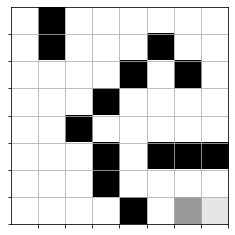

In [72]:
completion_check(model, qmaze)
show(qmaze)

This cell will test your model for one game. It will start the pirate at the top-left corner and run play_game. The agent should find a path from the starting position to the target (treasure). The treasure is located in the bottom-right corner.

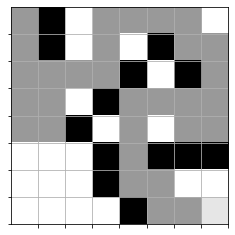

In [73]:
pirate_start = (0, 0)
play_game(model, qmaze, pirate_start)
show(qmaze)

## Save and Submit Your Work
After you have finished creating the code for your notebook, save your work. Make sure that your notebook contains your name in the filename (e.g. Doe_Jane_ProjectTwo.ipynb). This will help your instructor access and grade your work easily. Download a copy of your IPYNB file and submit it to Brightspace. Refer to the Jupyter Notebook in Apporto Tutorial if you need help with these tasks.